In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# ANALYSIS OF EV index REGRESSION COEFFICIENTS

After the estimation of the EV index using covariates I choose for each station the best covariate and its best level. "best" means that it lead to the highest estimate of the EV index within the interval from -0.5 to 0.5. Then, since the maximization of the likelihood provide the regression coefficents estimates and not directly the EV estimate I store the data to analyze them.
Firstly, I would like to see which values do they take and if their interpretation is alligned with theory. Secondly, I would like to check if the relation between rainfall and the coovariate is correctly reflected in the coefficient estimate.  Moreover, I would like to see whether they have an interesting spatial distribution.


In [ ]:
from google.colab import files
up = files.upload()
import io
coov  = pd.read_csv(io.BytesIO(up['coovariate_choice.csv']))

In [ ]:
from google.colab import files
up = files.upload()
import io
coef  = pd.read_csv(io.BytesIO(up['coef_choosen160.csv']))

### ANALYSIS OF THE COEFFICIENTS OF THE COOVARIATES

In [ ]:
coef[coef[1] == 'temp'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'umid'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'rad'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'vento'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'autunno_est'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'autunno_inv'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'autunno_prim'].sort_values(by=2, ascending=True)

In [ ]:
coef[coef[1] == 'autunno'].sort_values(by=2, ascending=True)

**Relation between Covariates and Extreme Rainfall in the raw data compared to the regression slope coefficient**

The Rainfall is considered as extreme when it is over 4.39 mm per month. However, in some sites it may be not the case. Therefore these plots are just to get an overall idea.

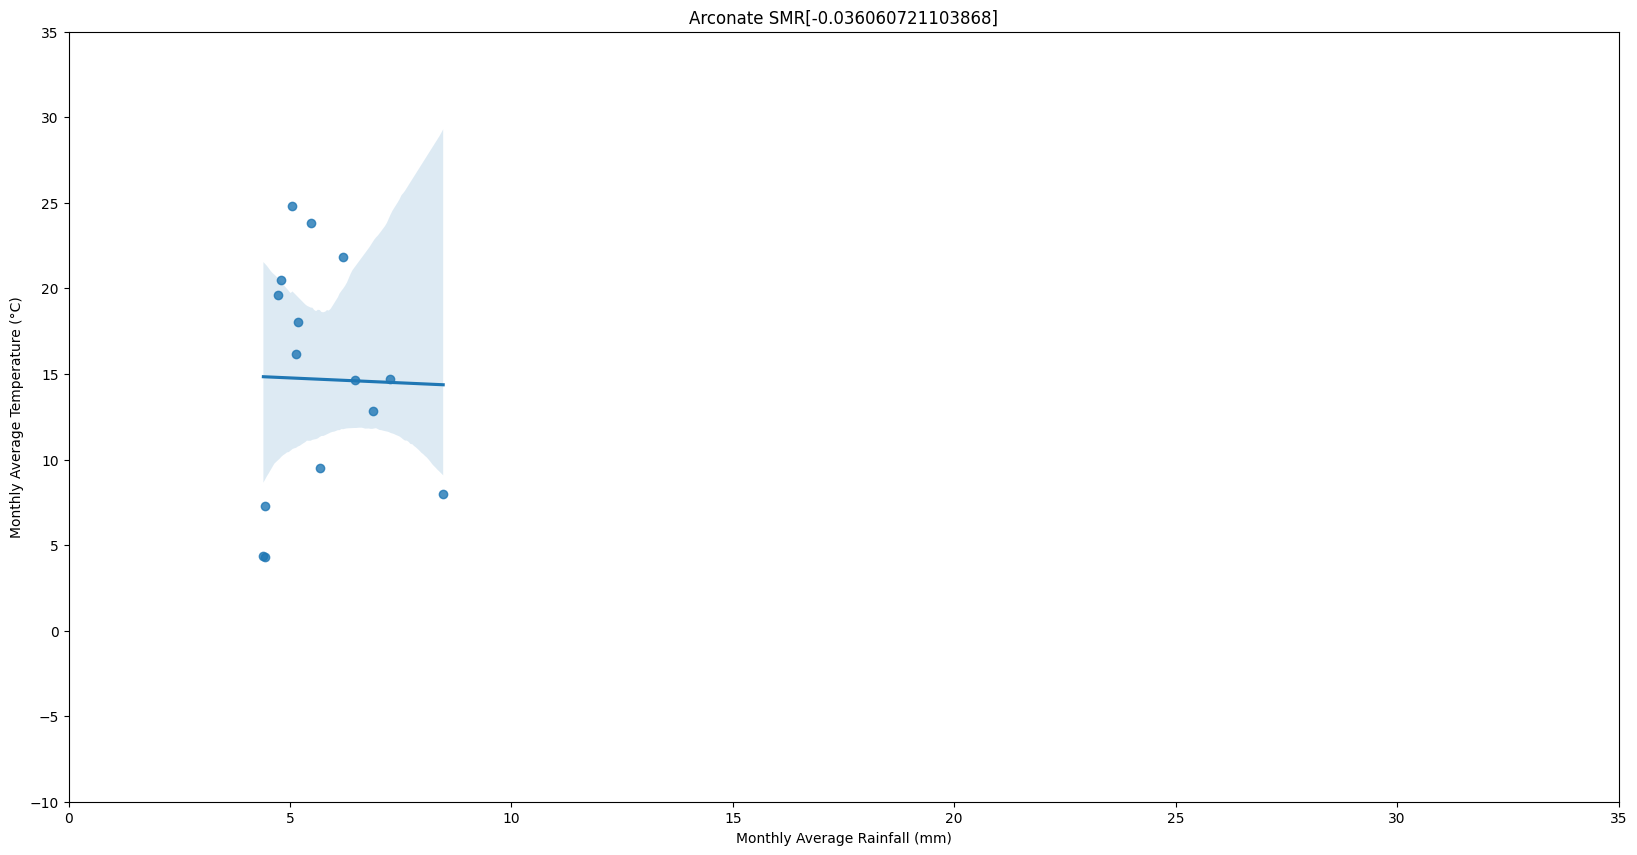

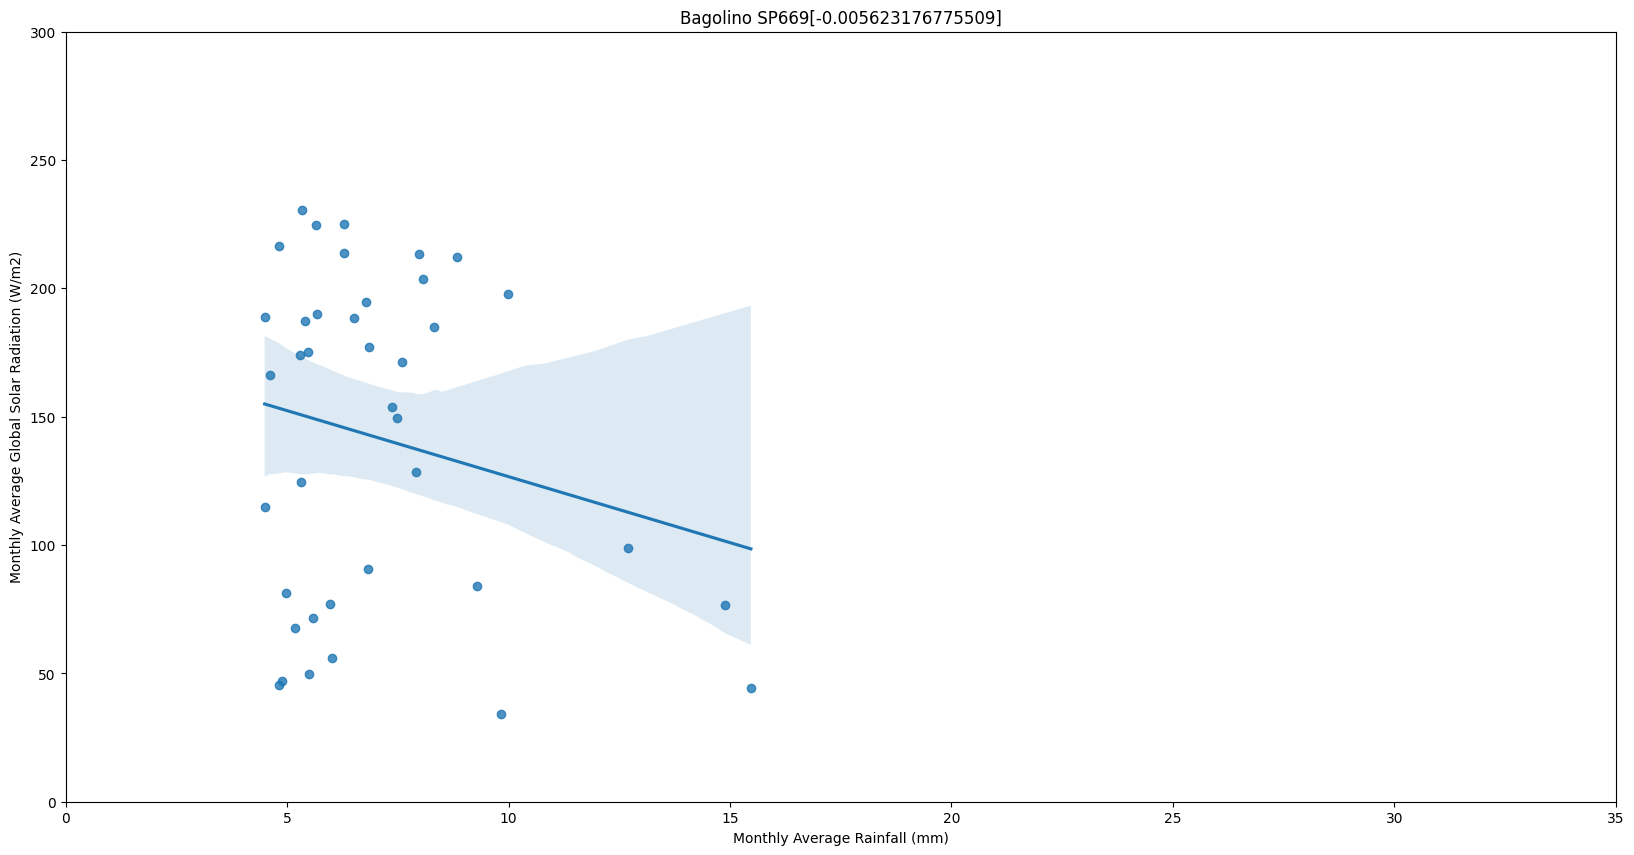

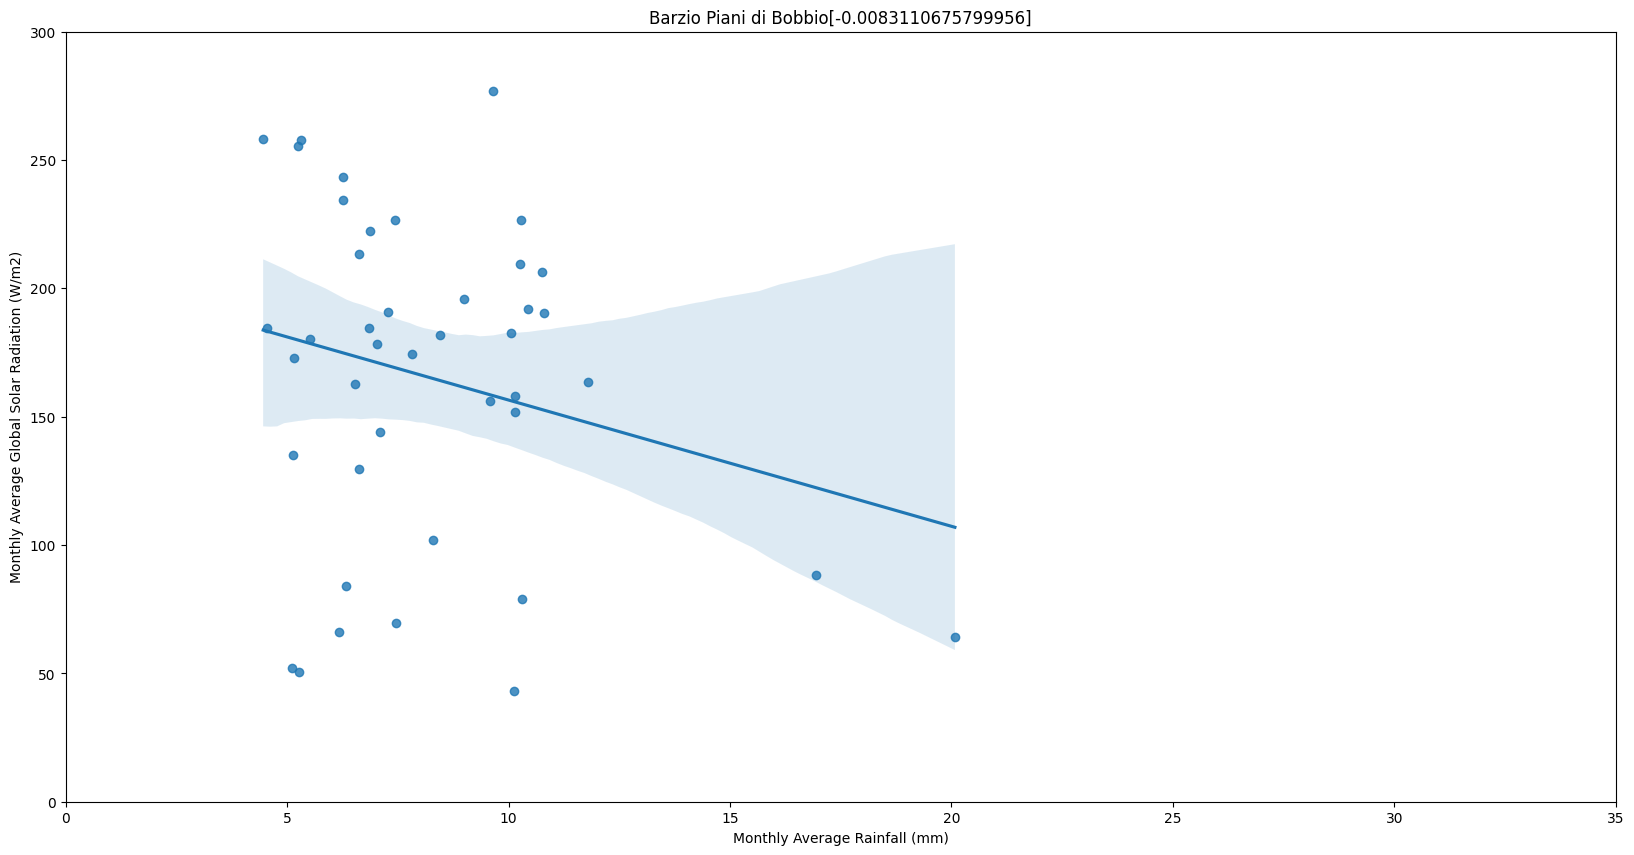

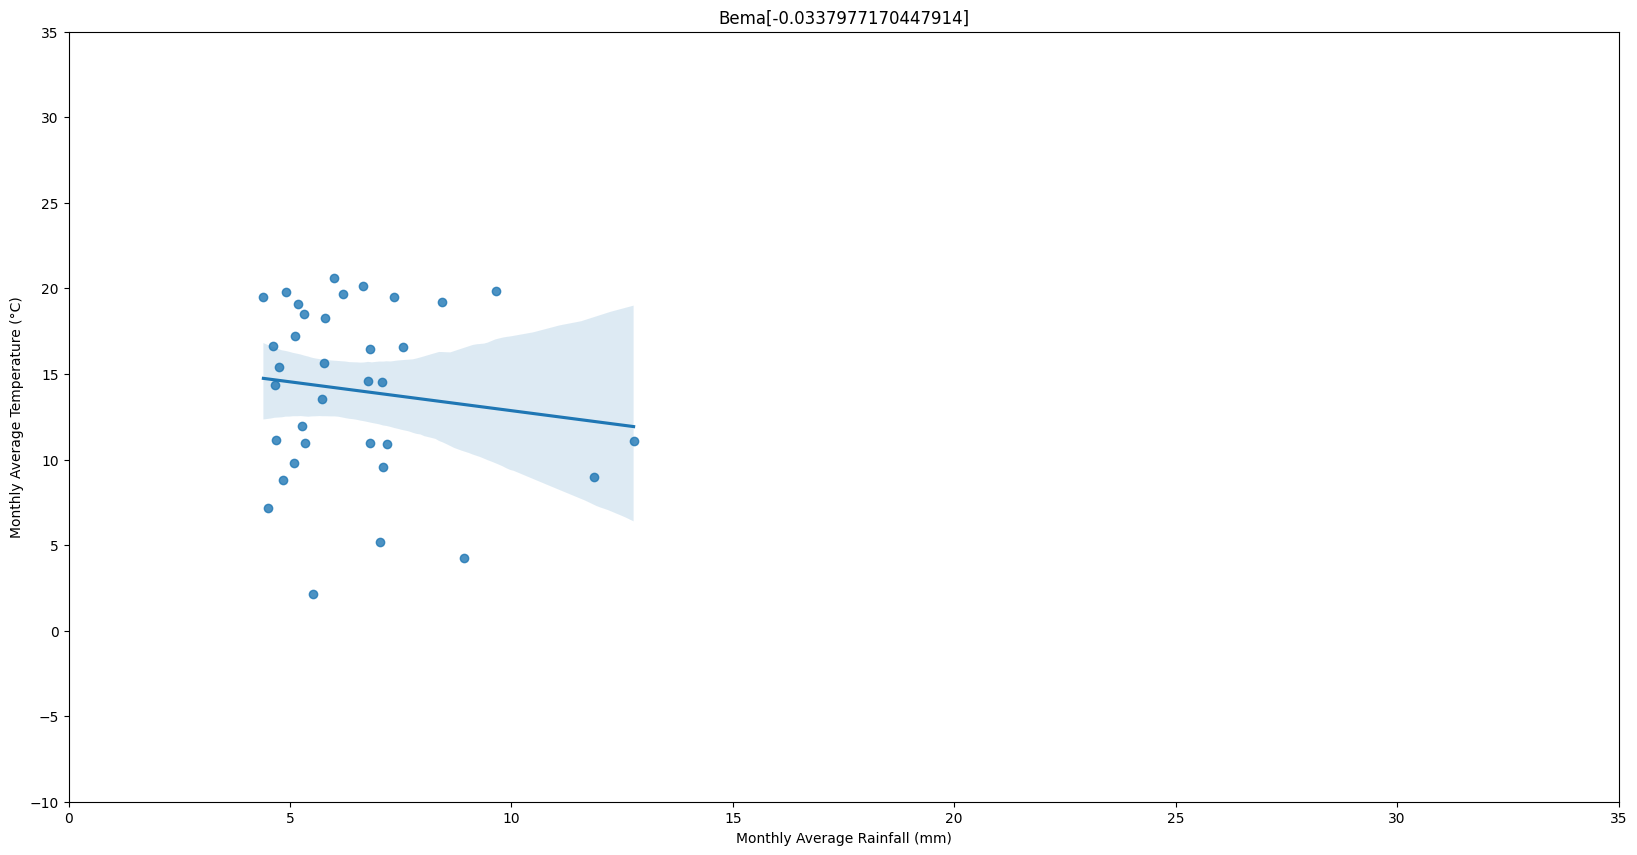

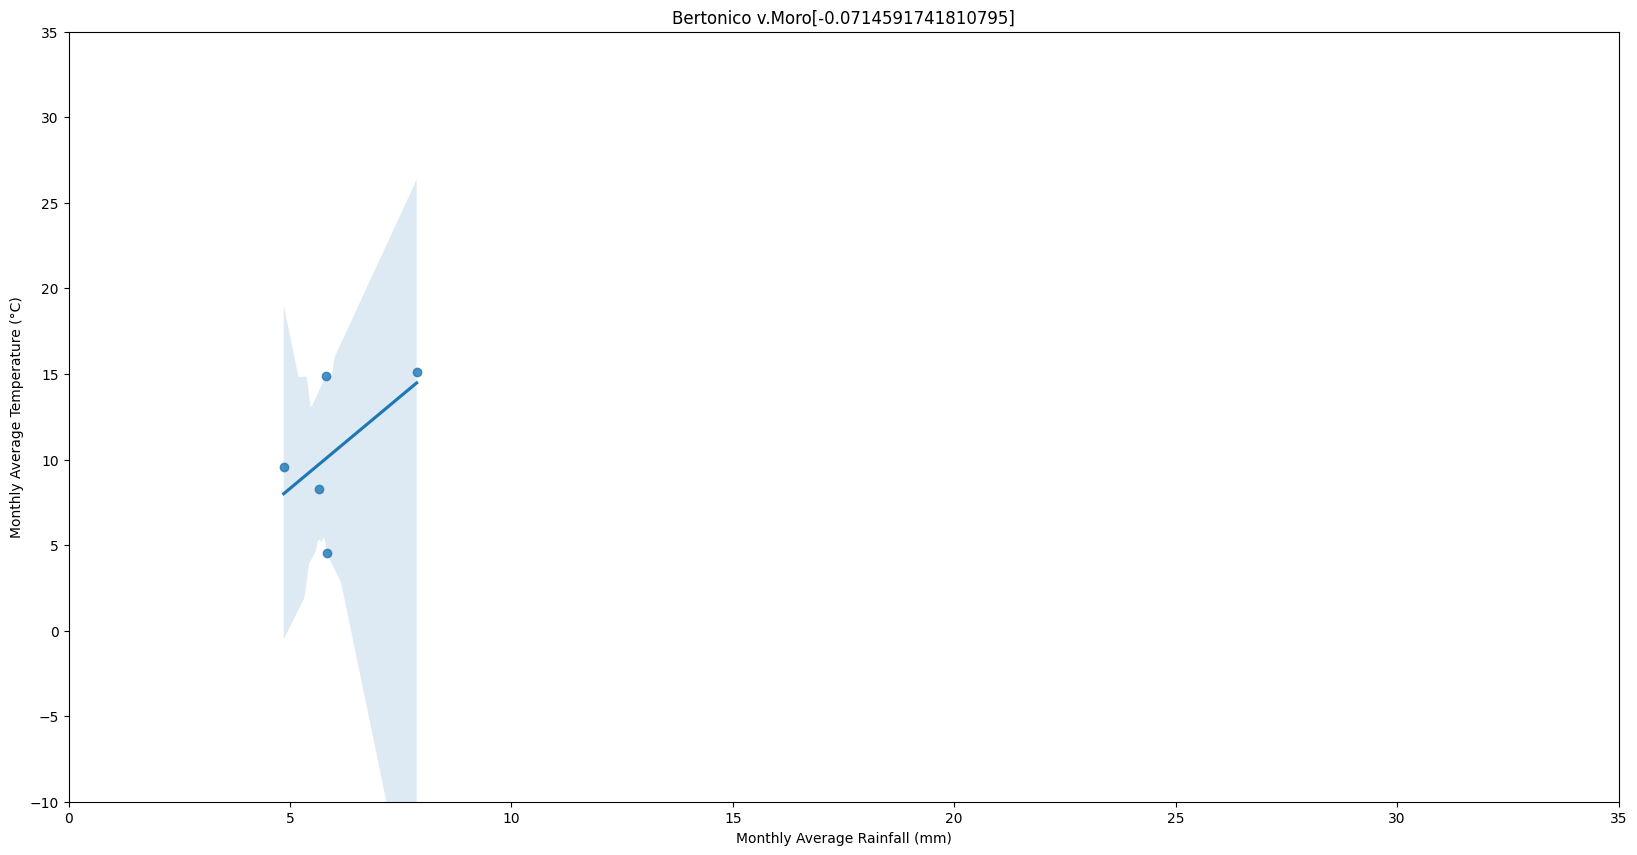

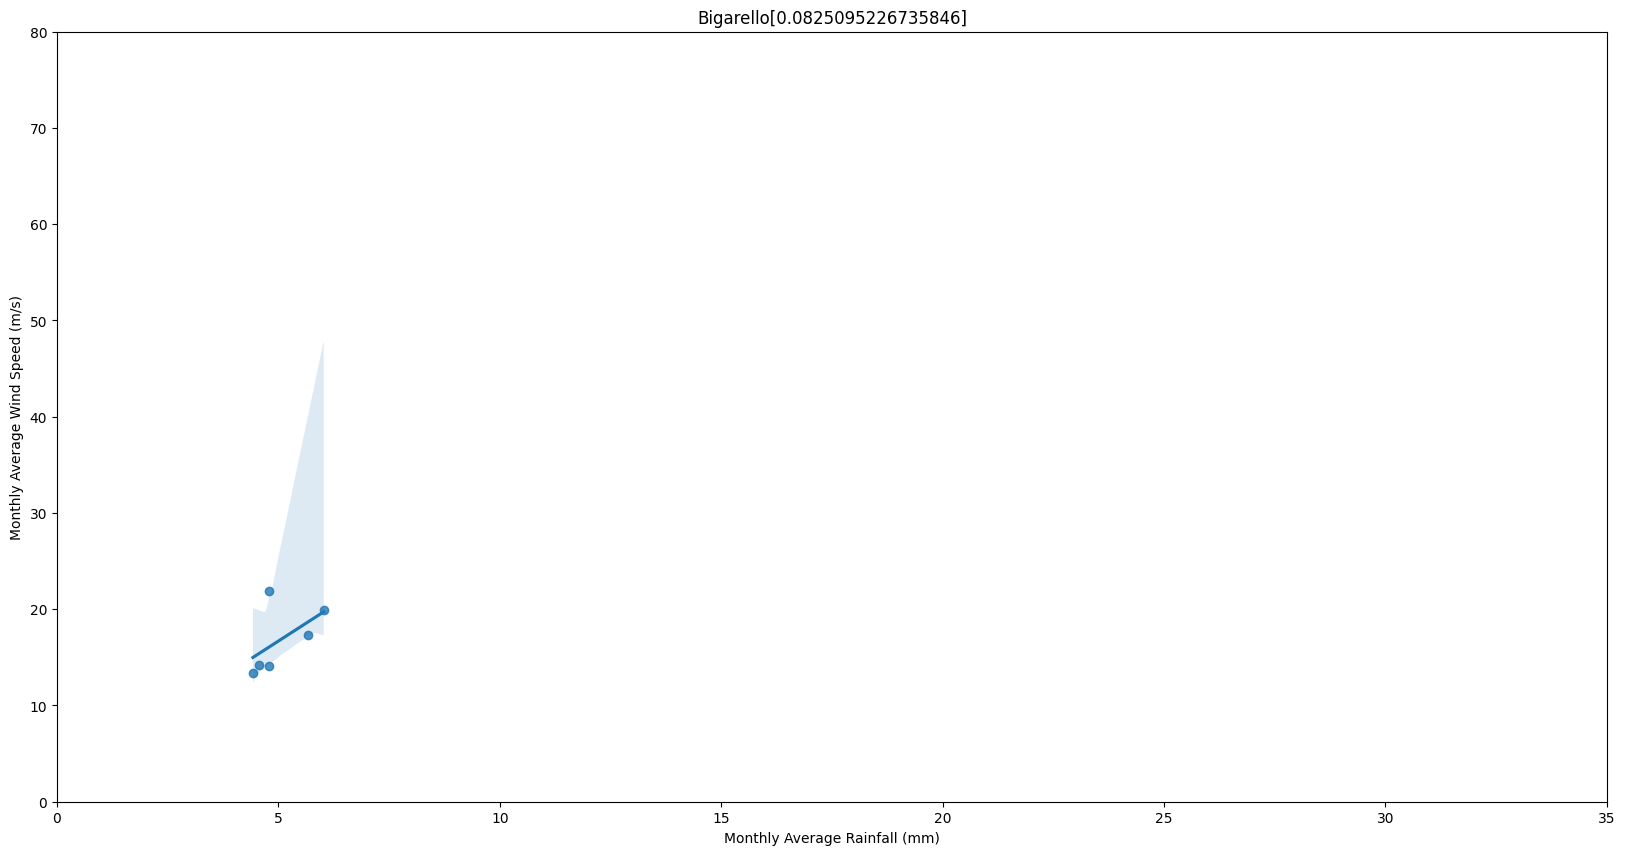

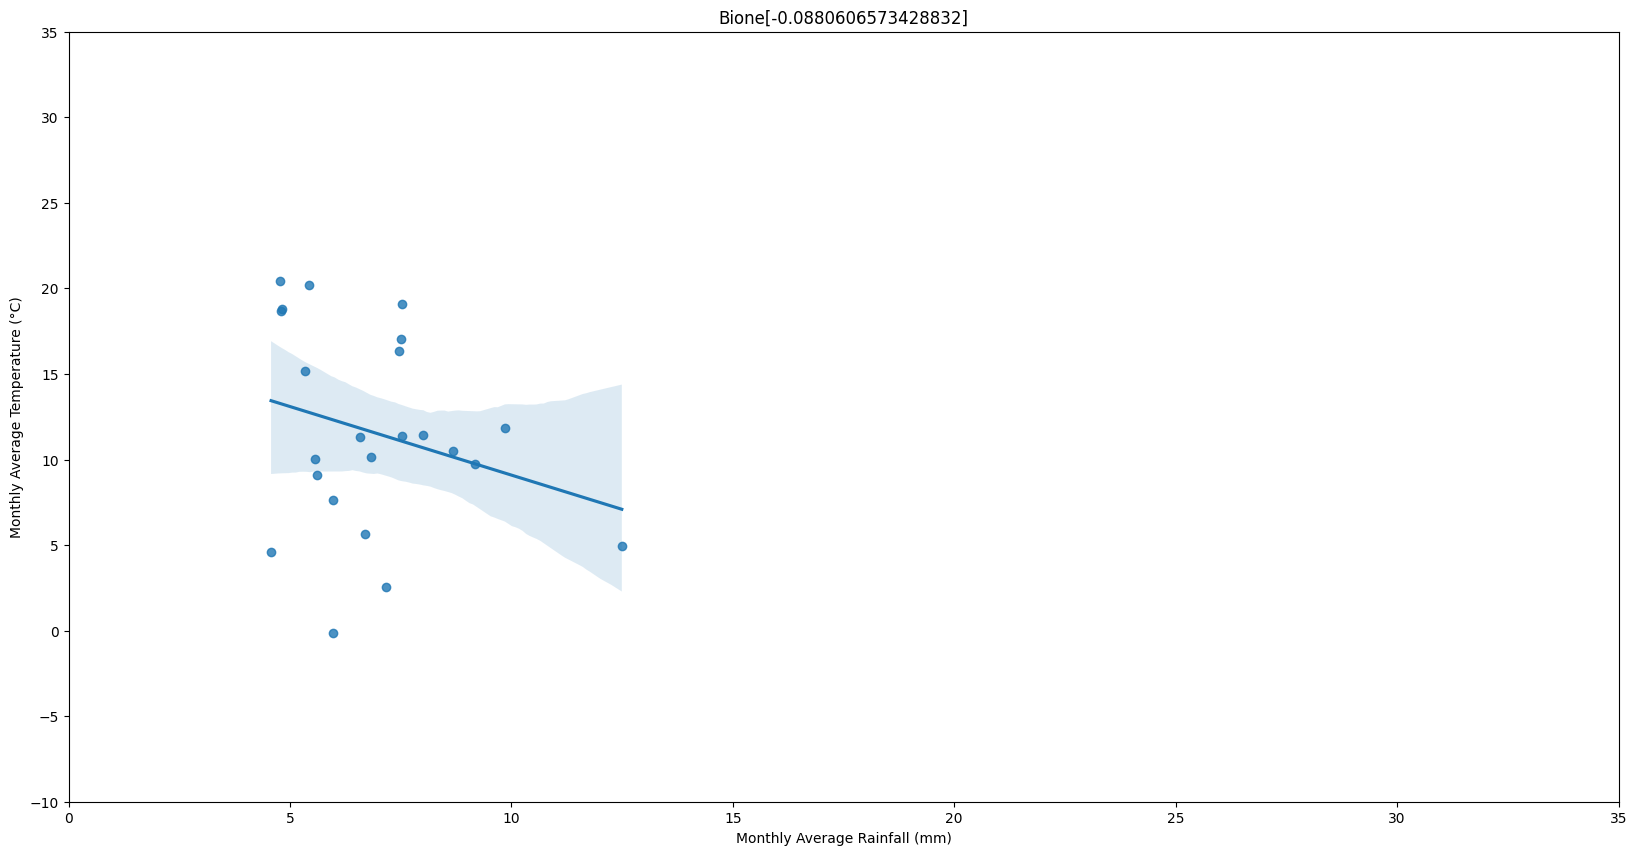

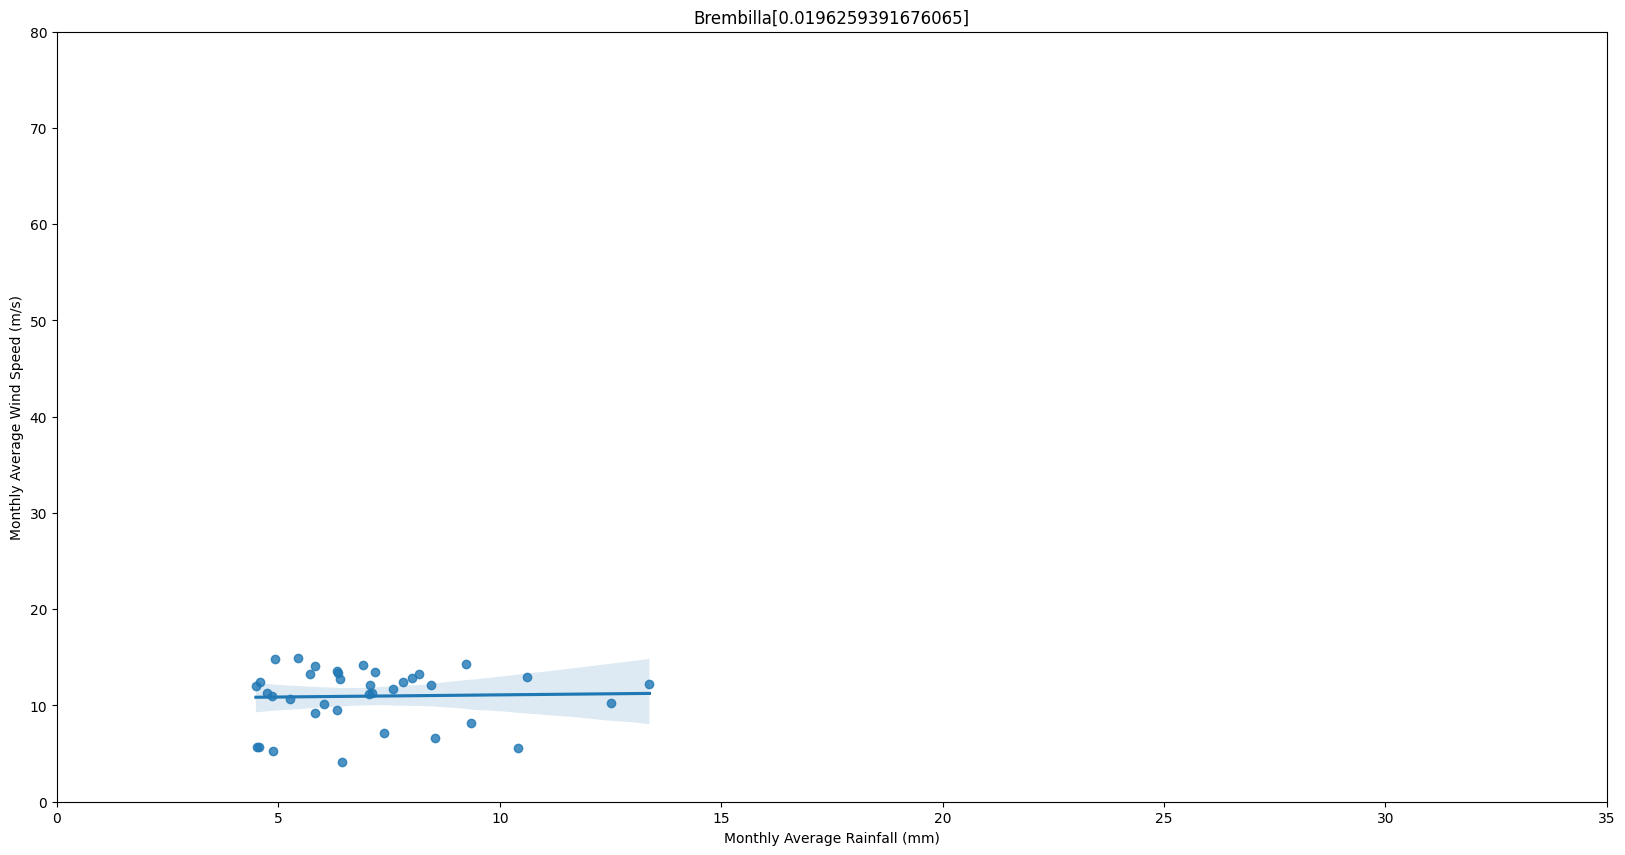

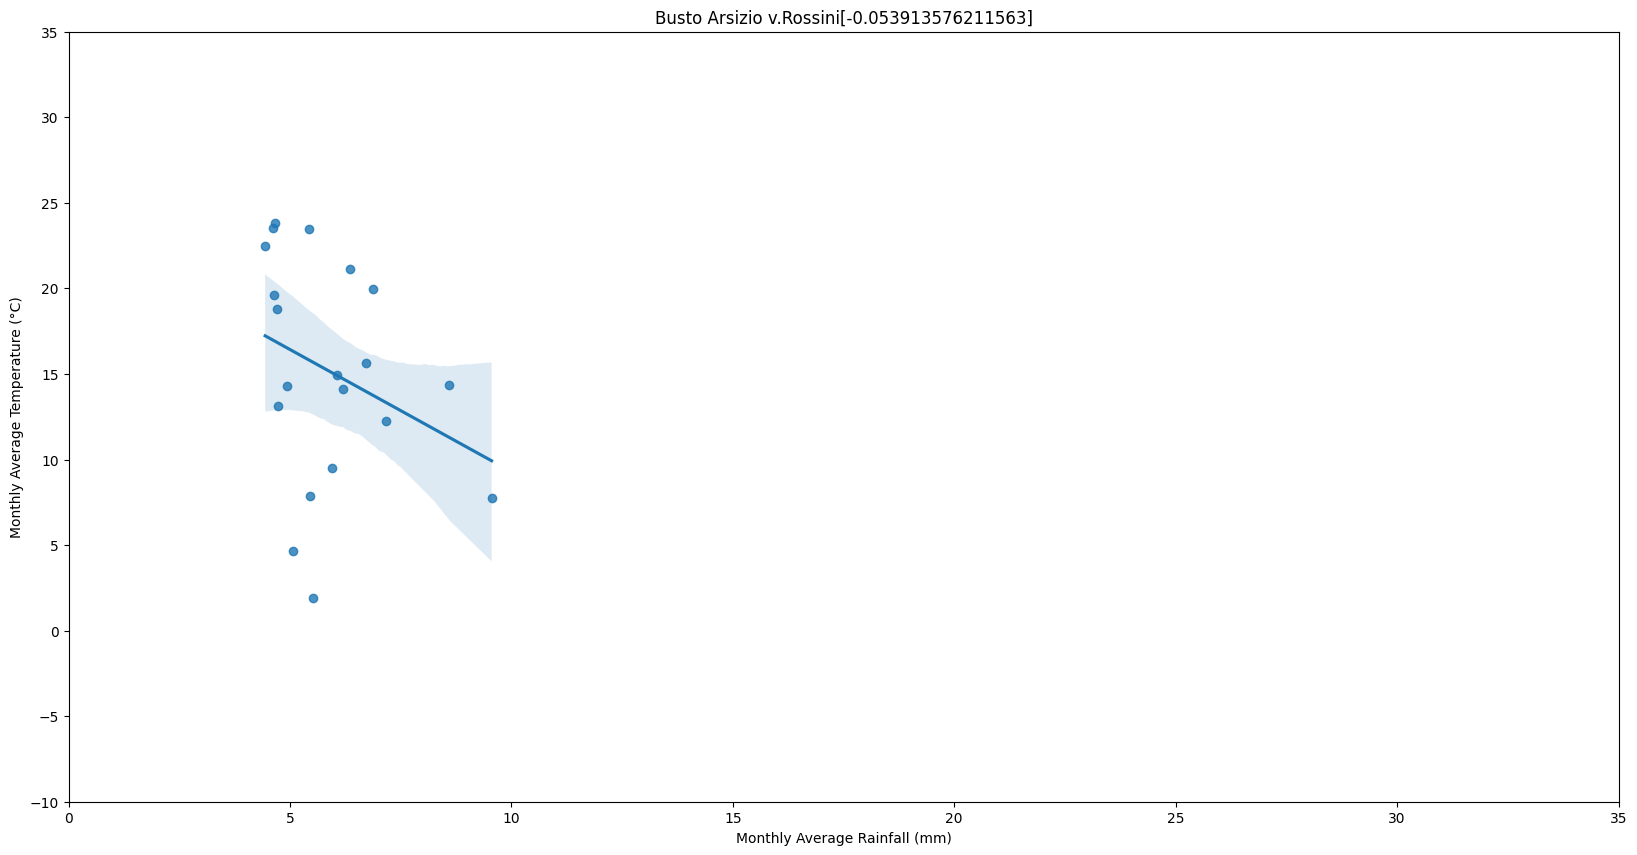

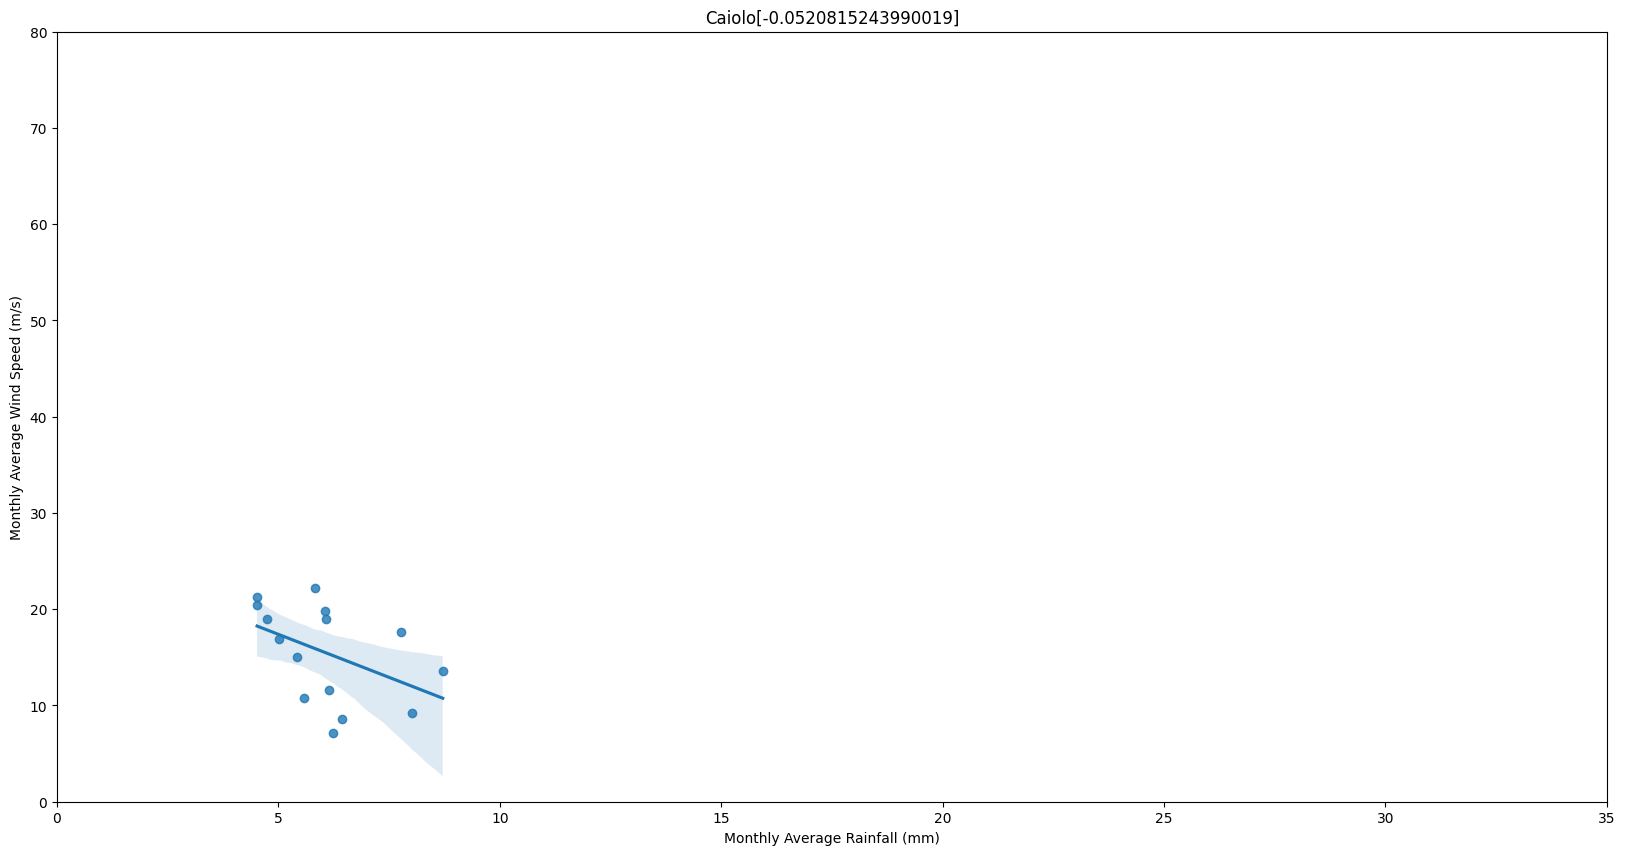

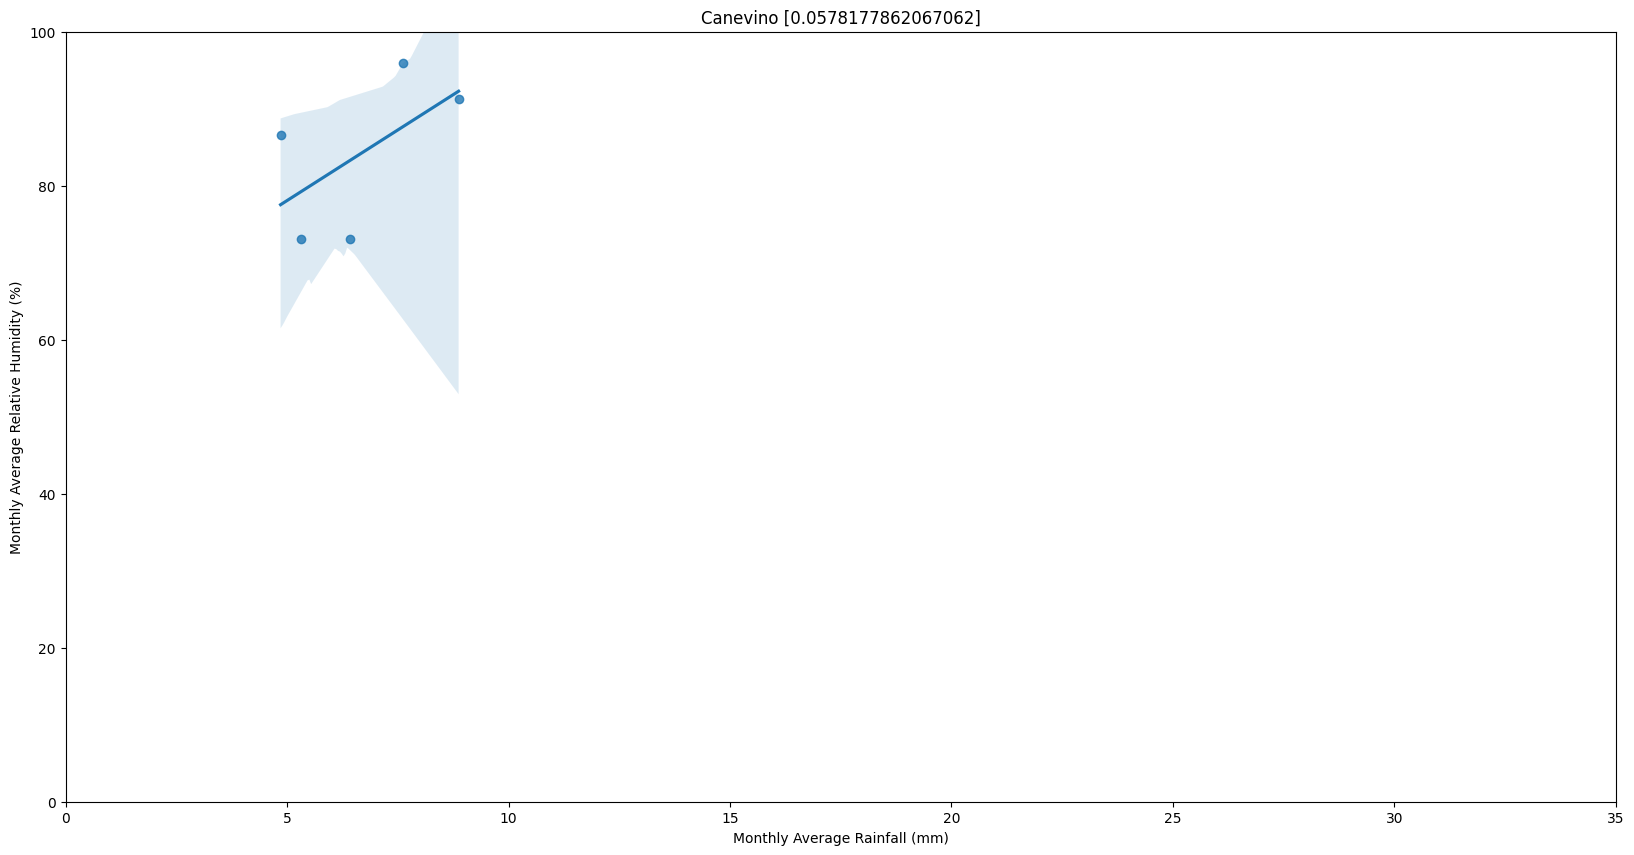

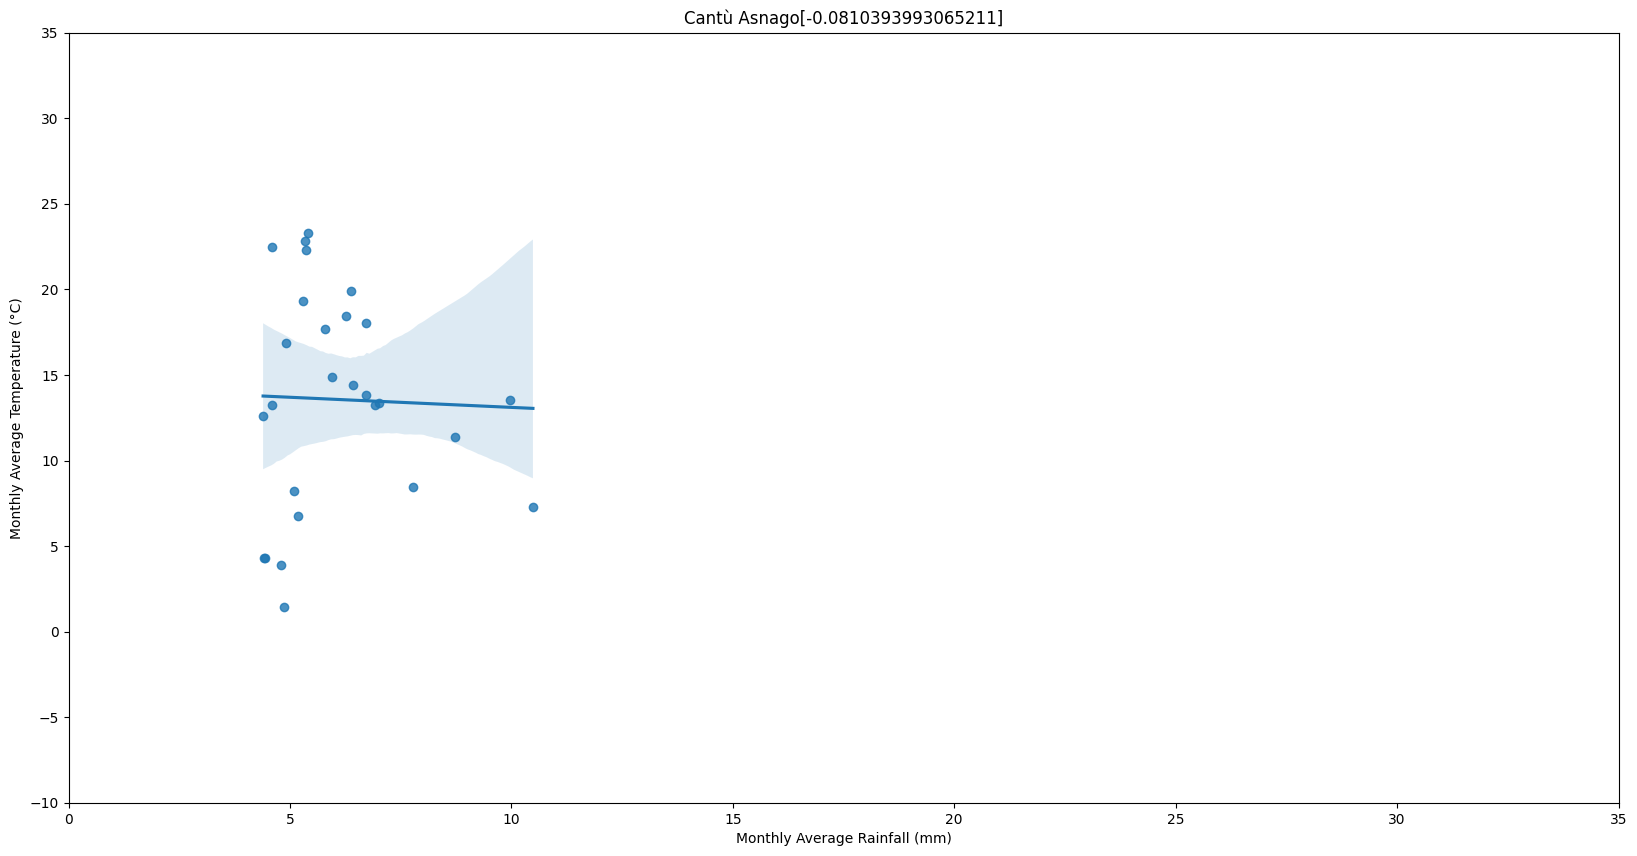

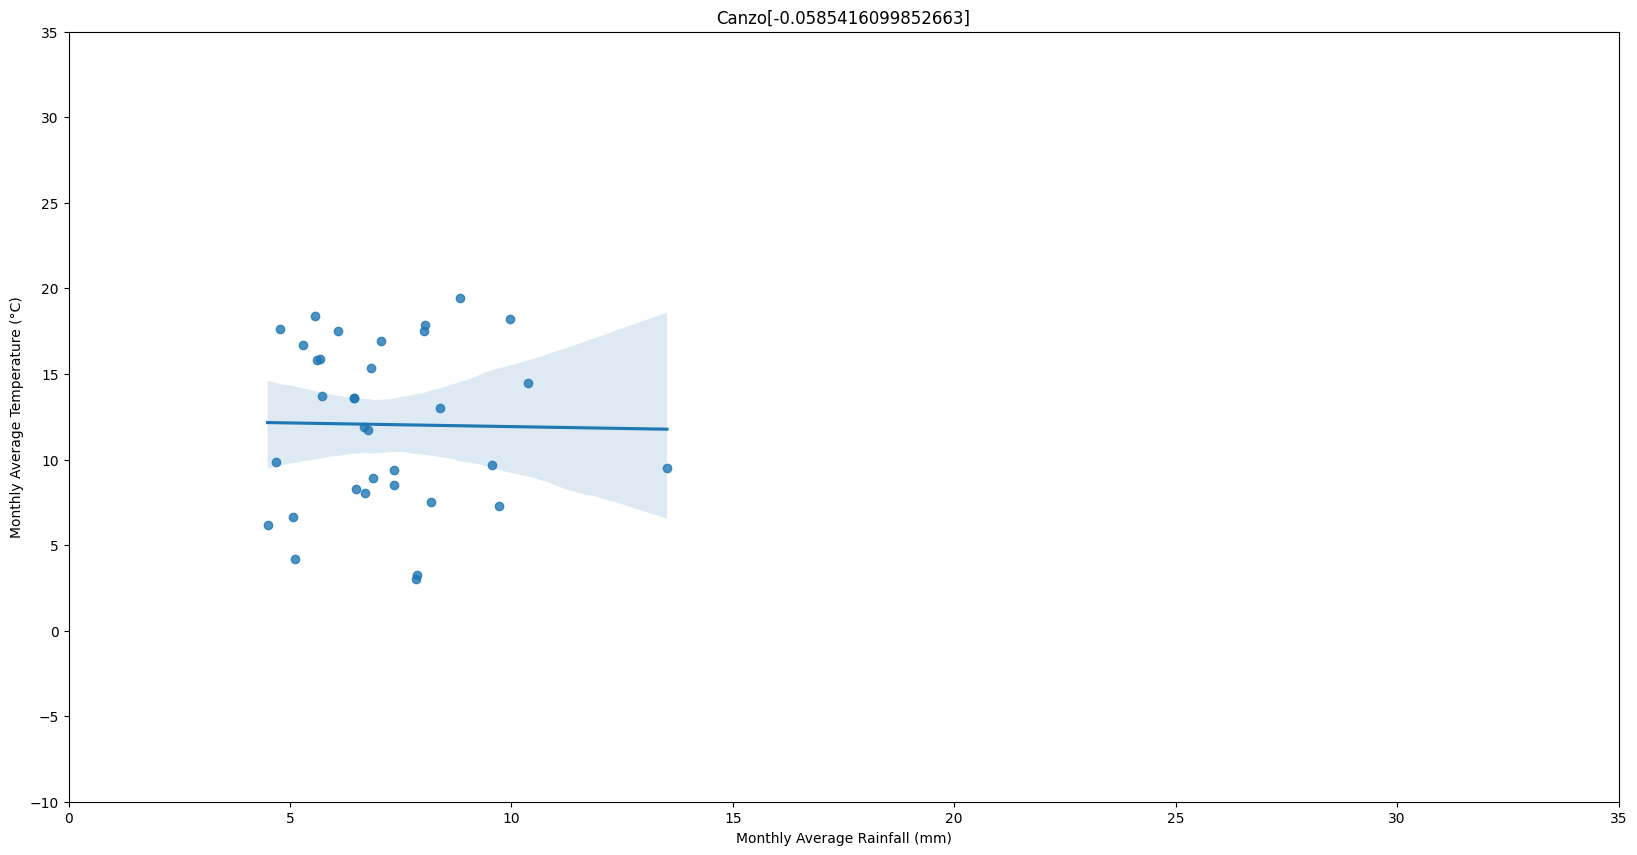

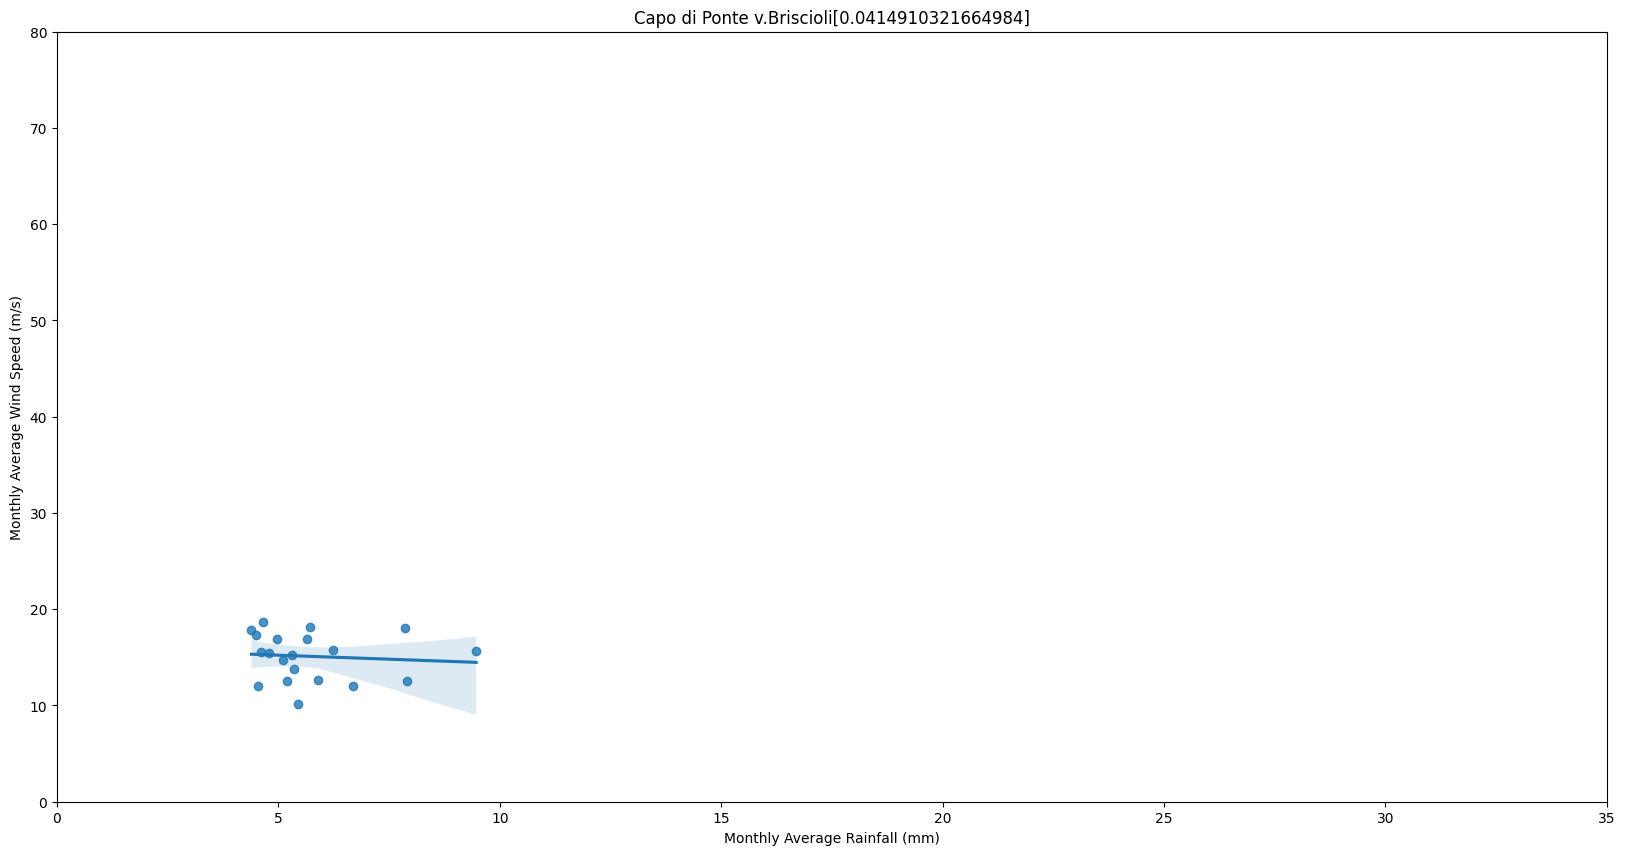

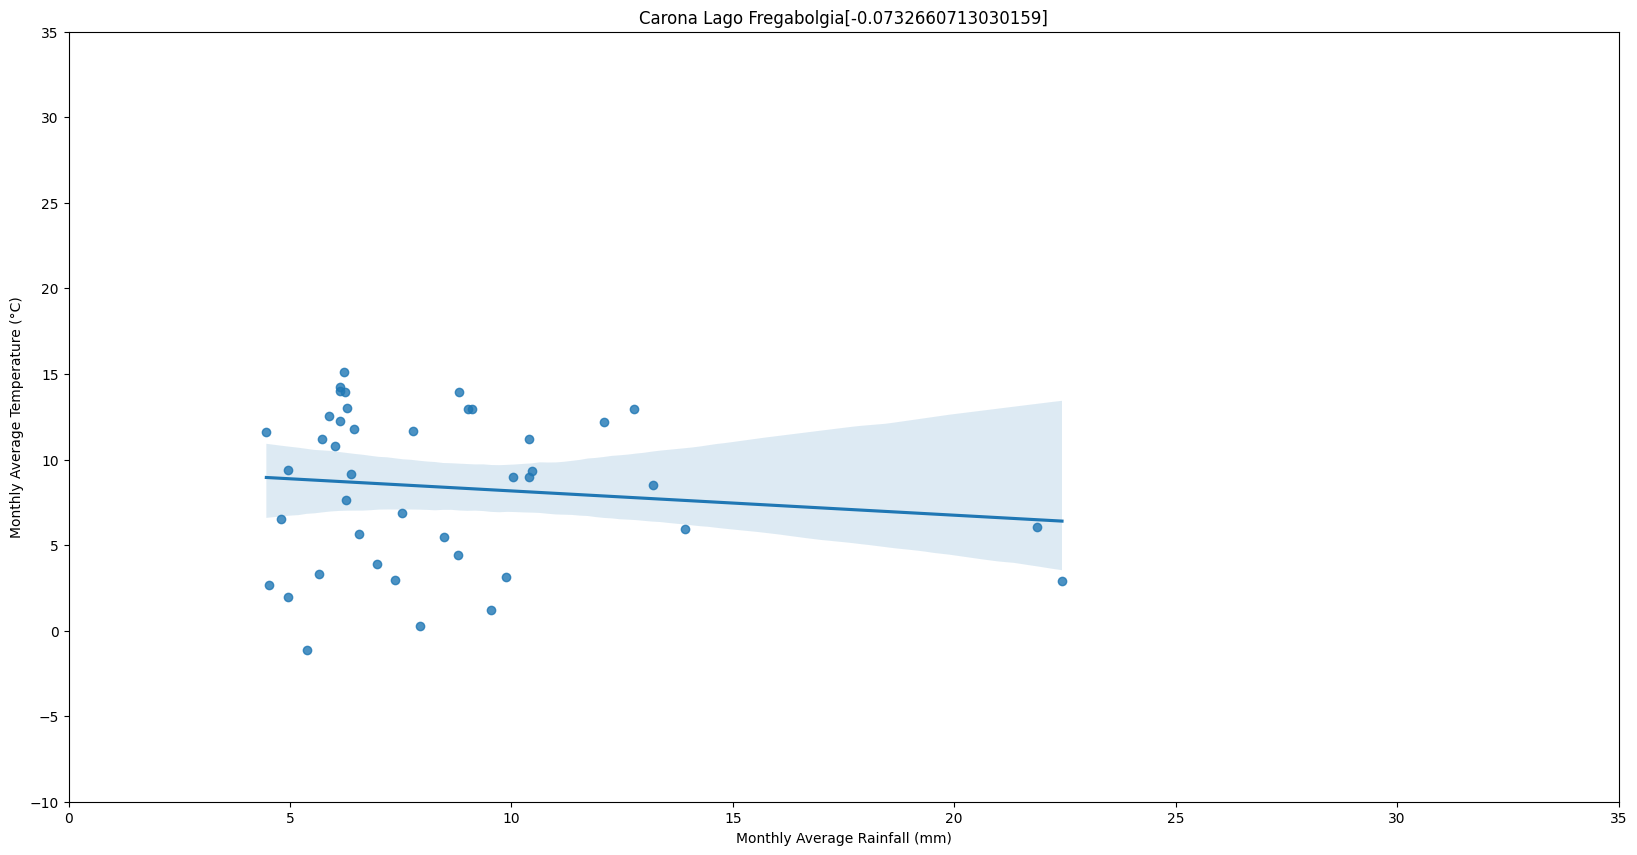

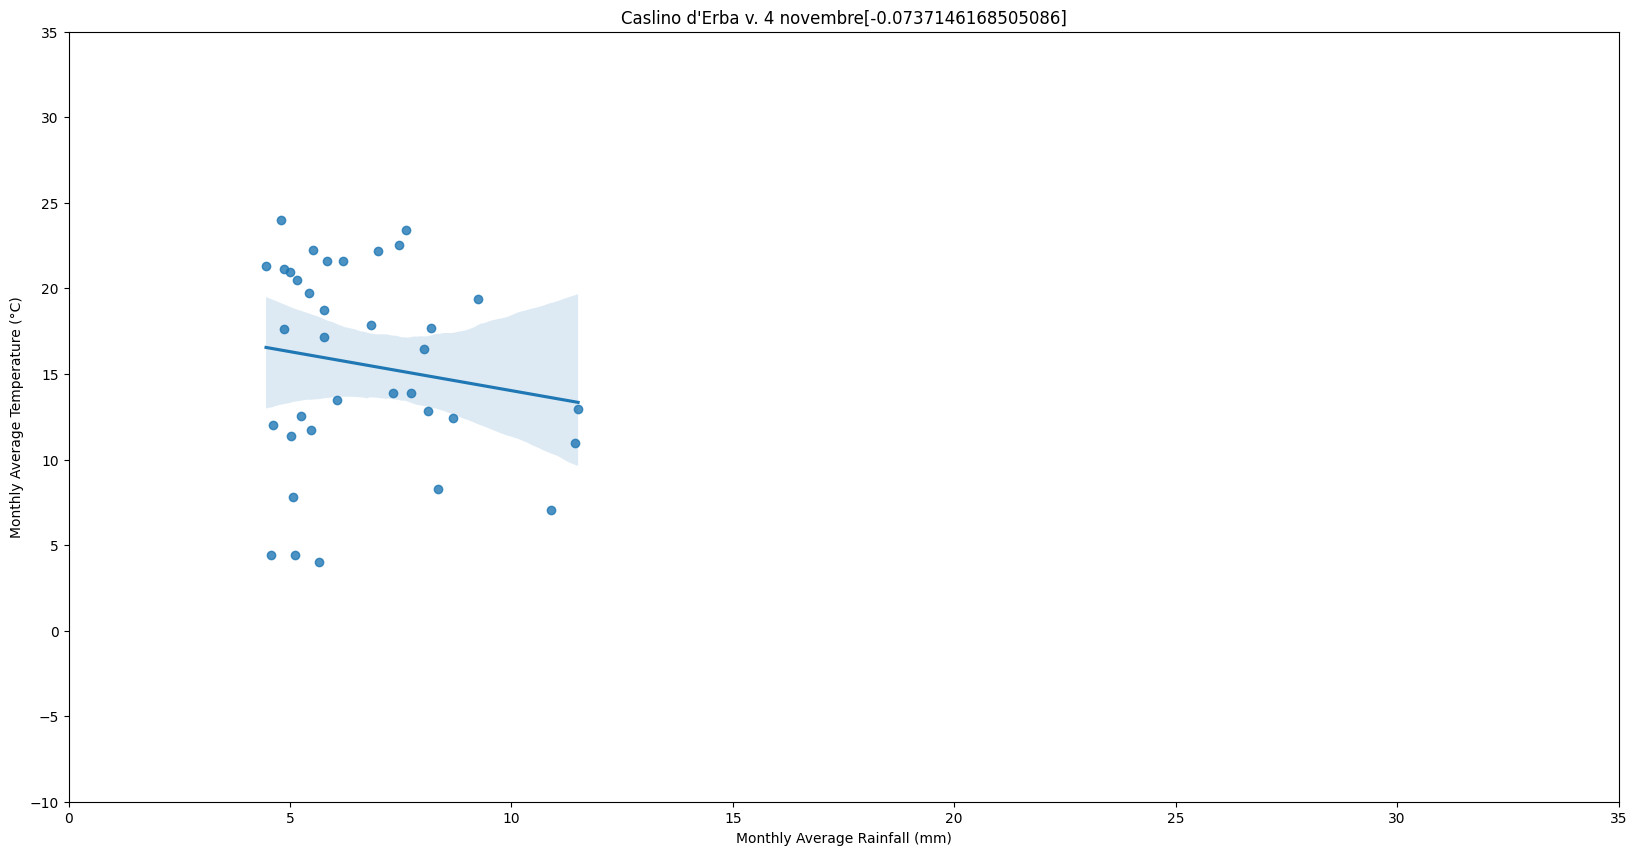

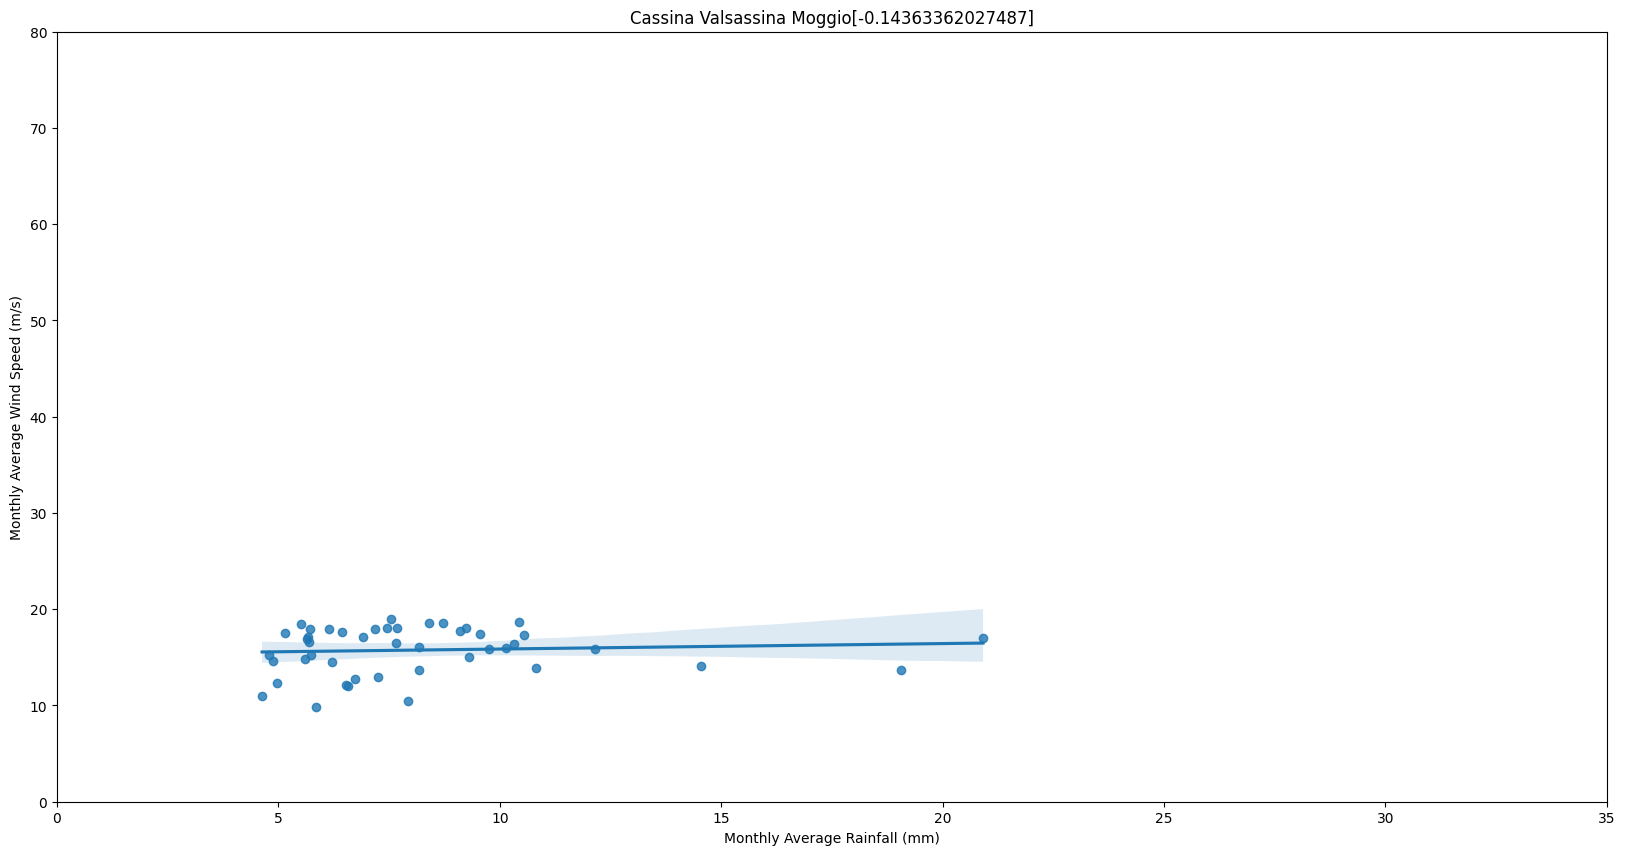

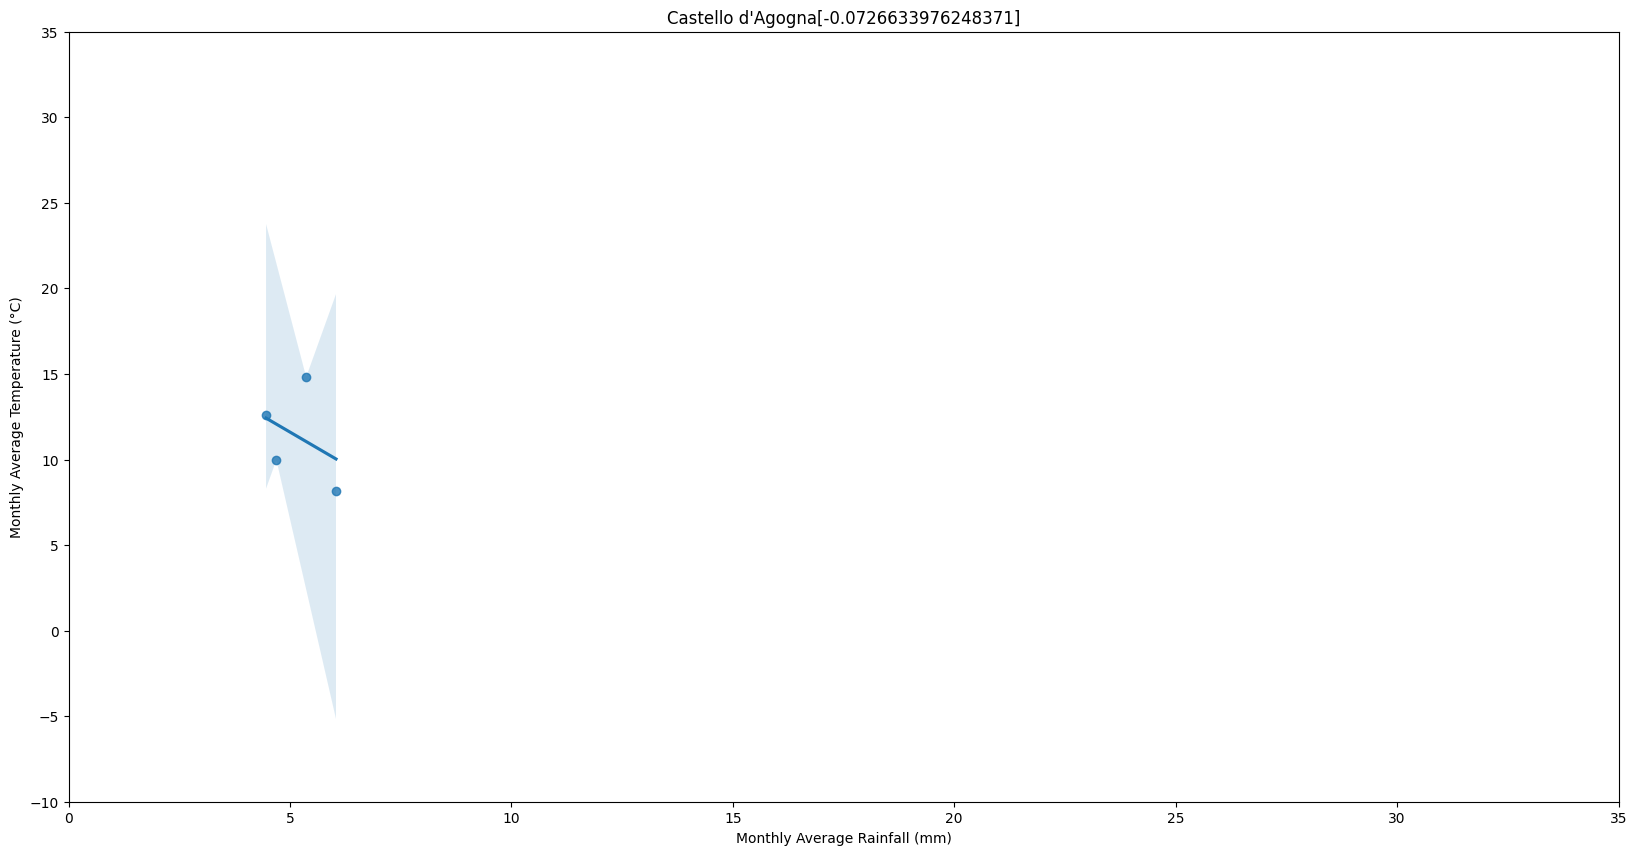

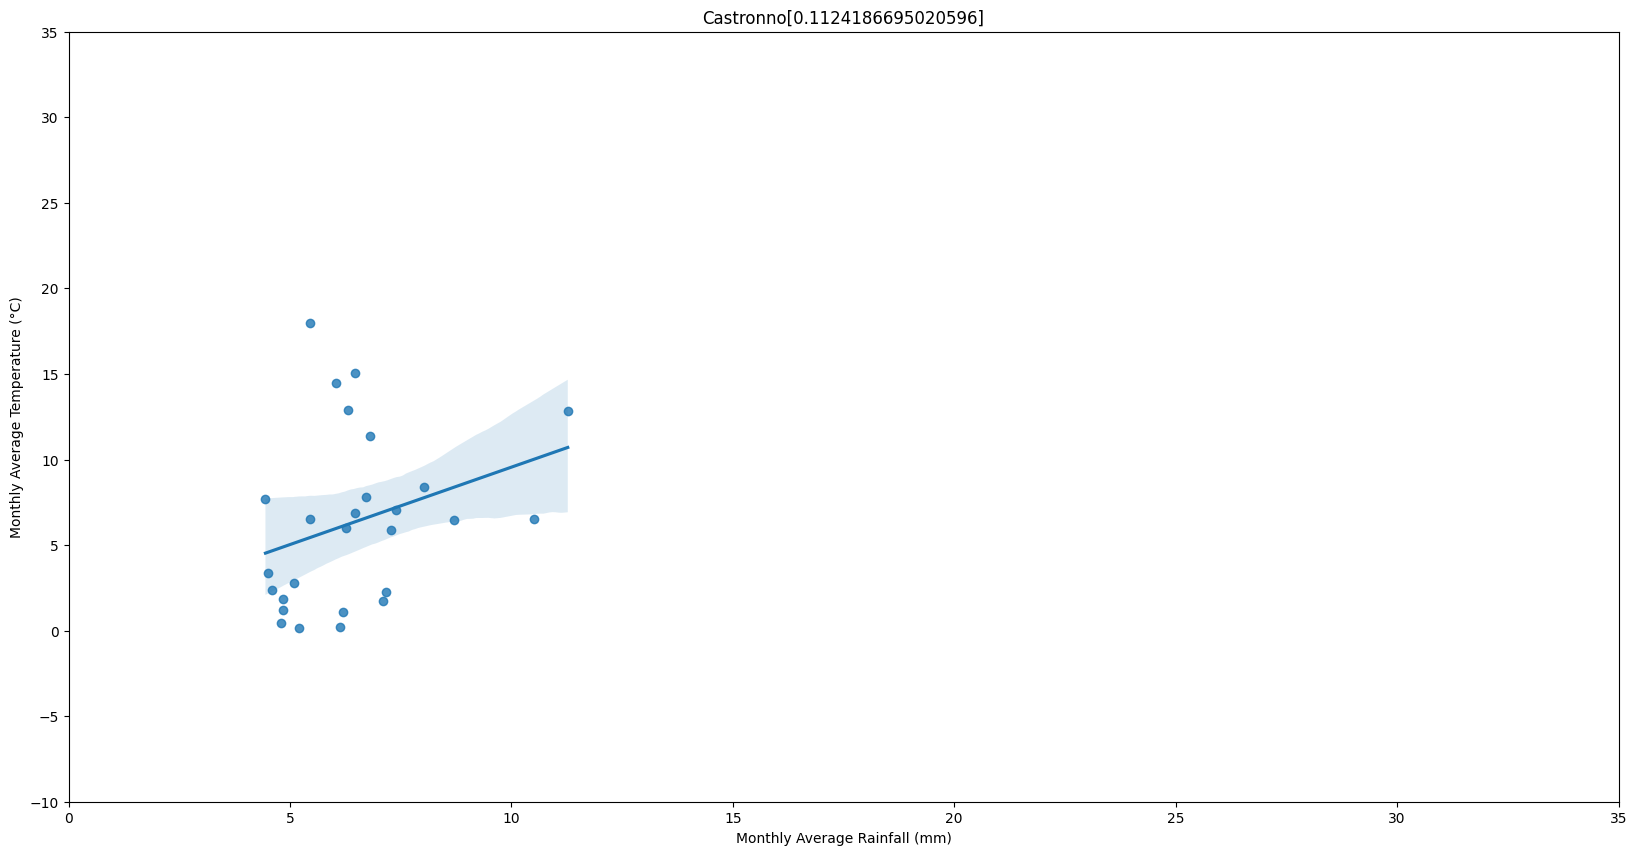

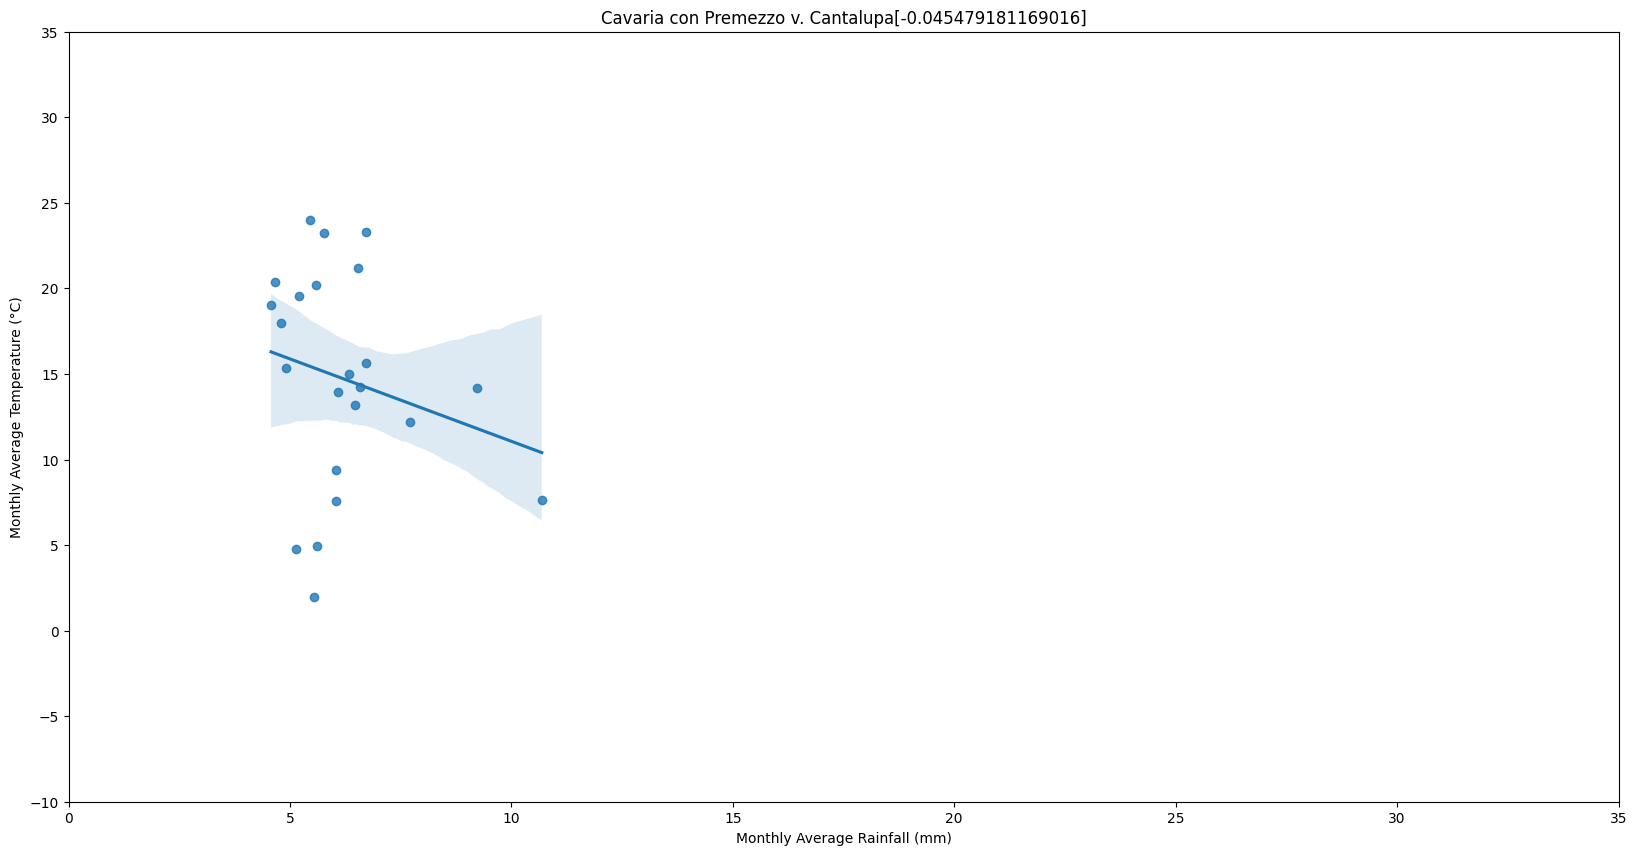

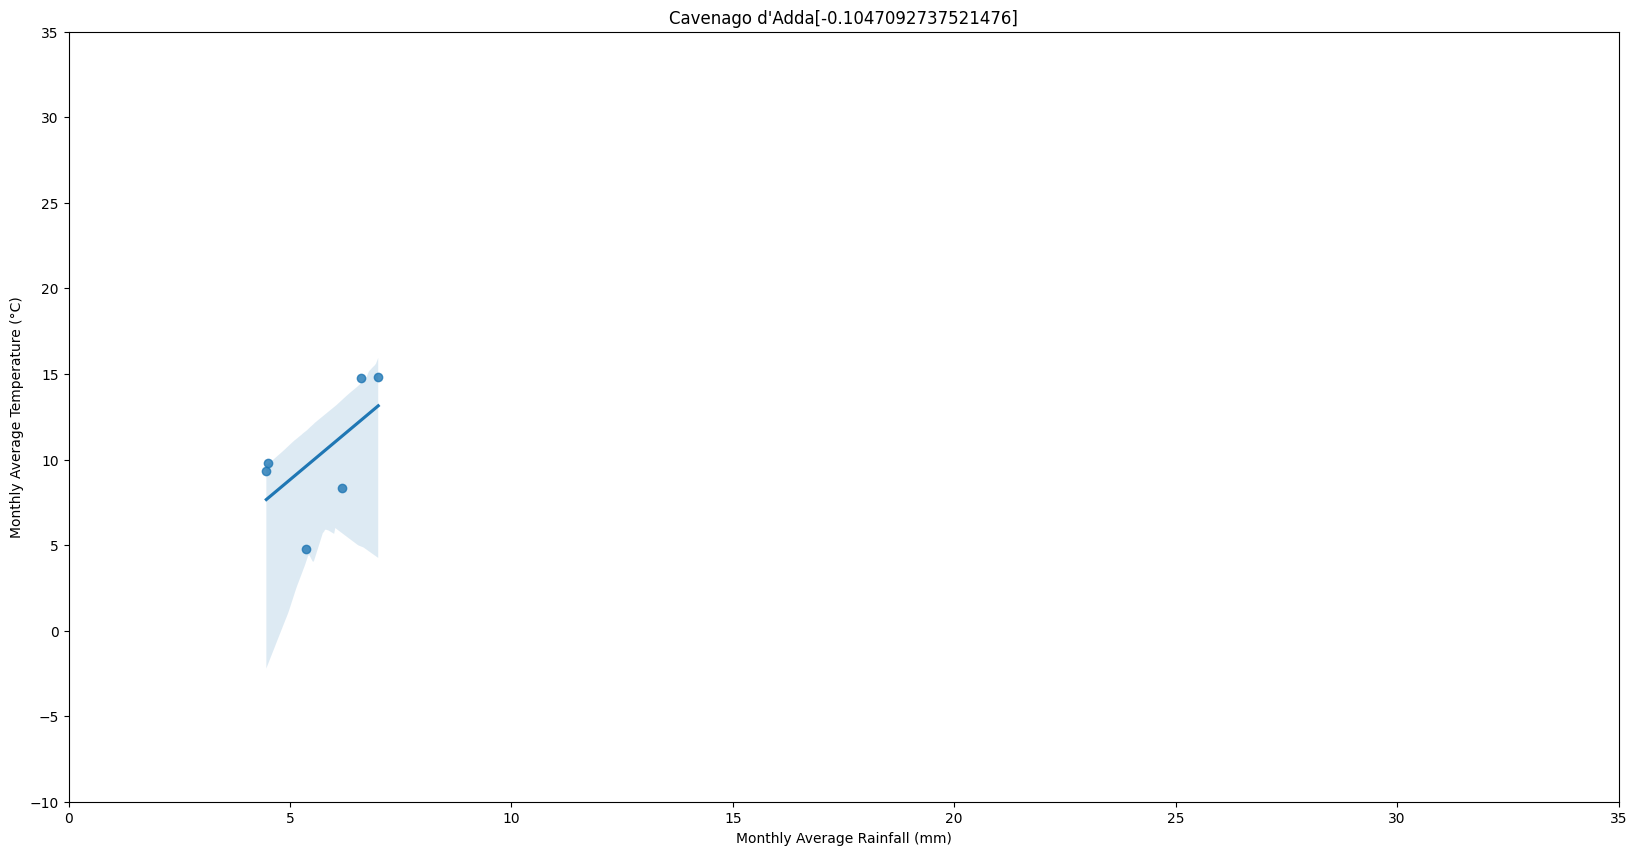

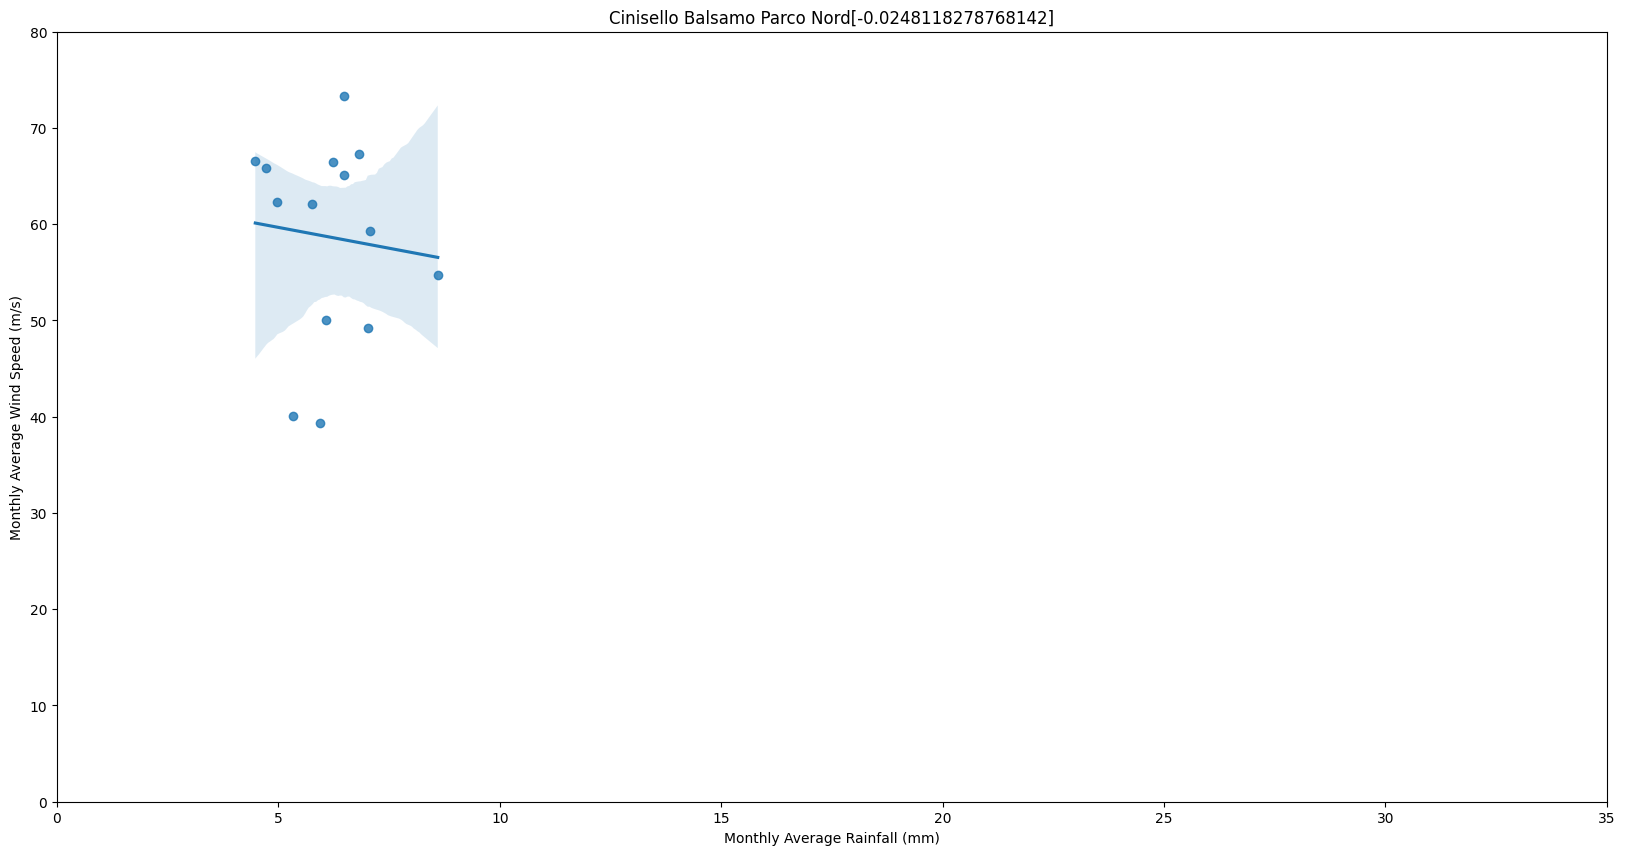

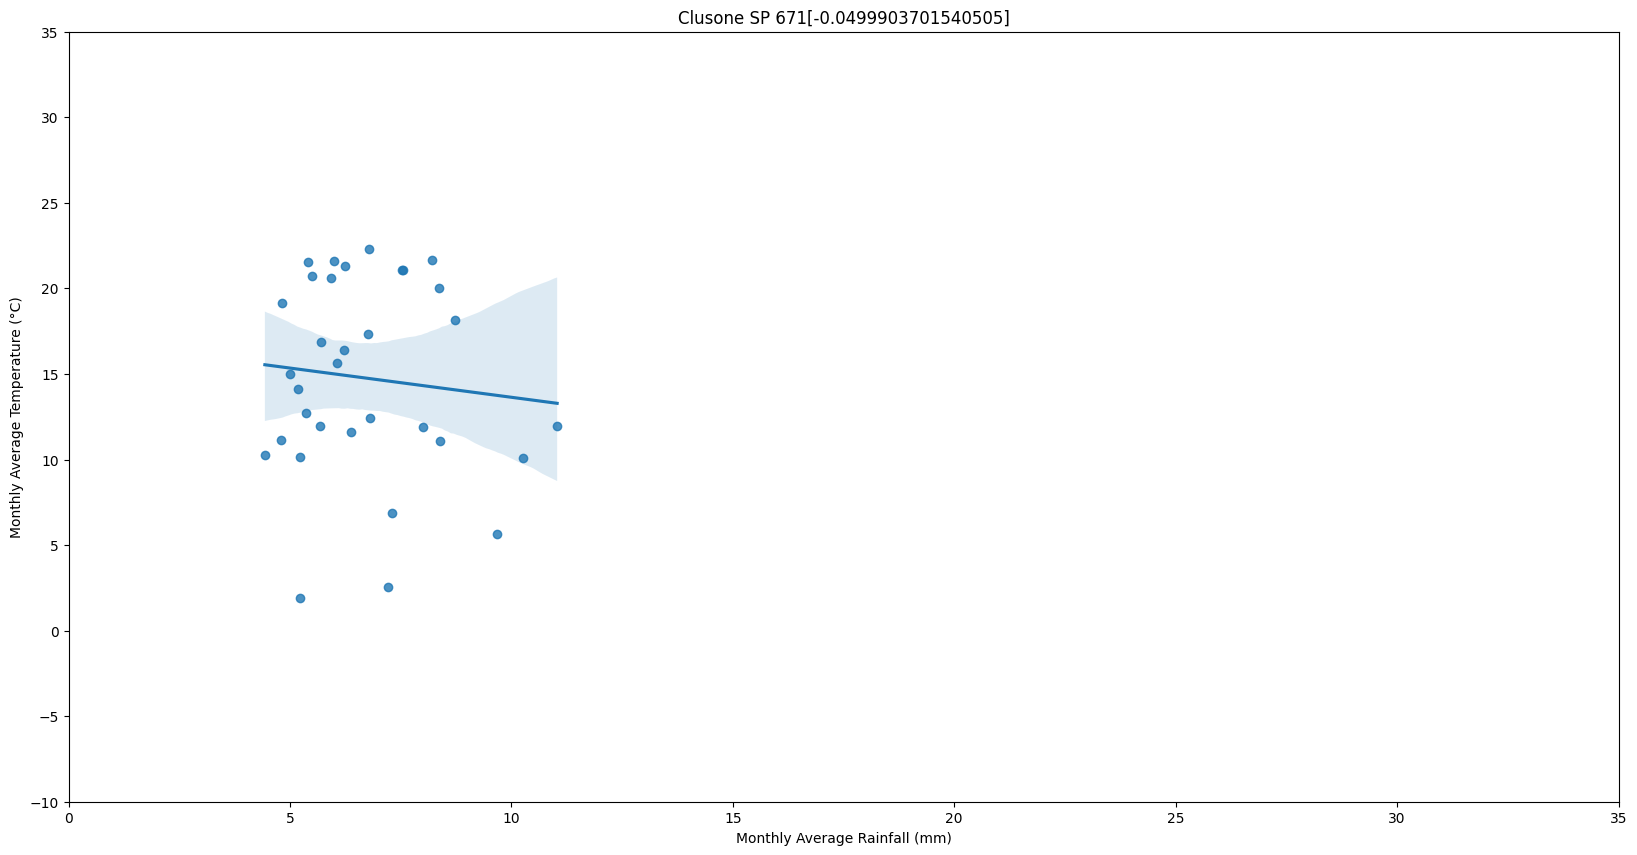

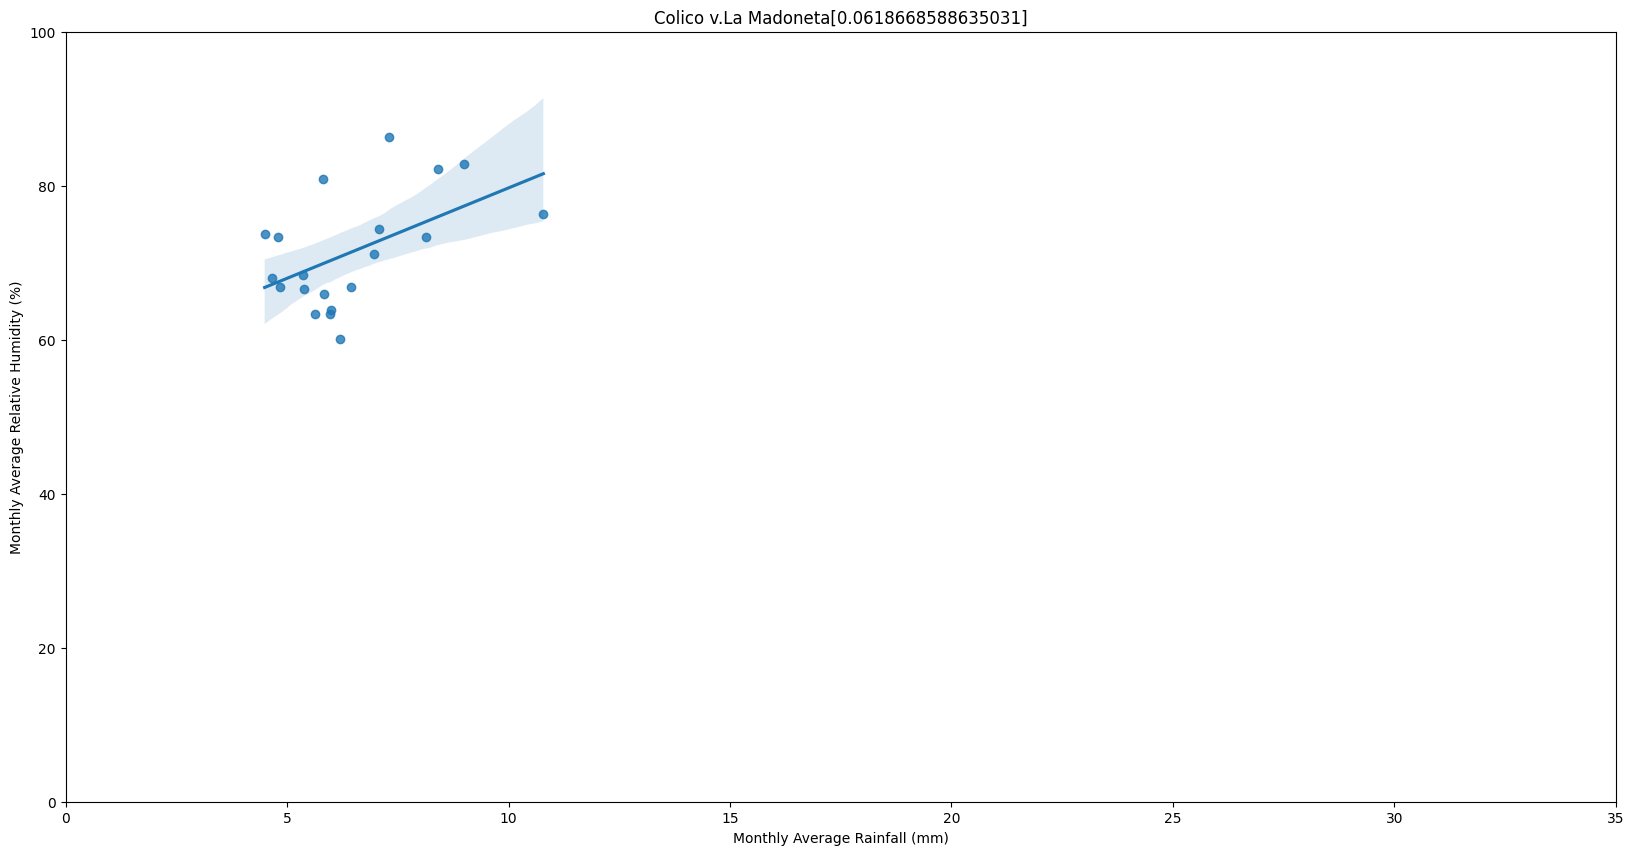

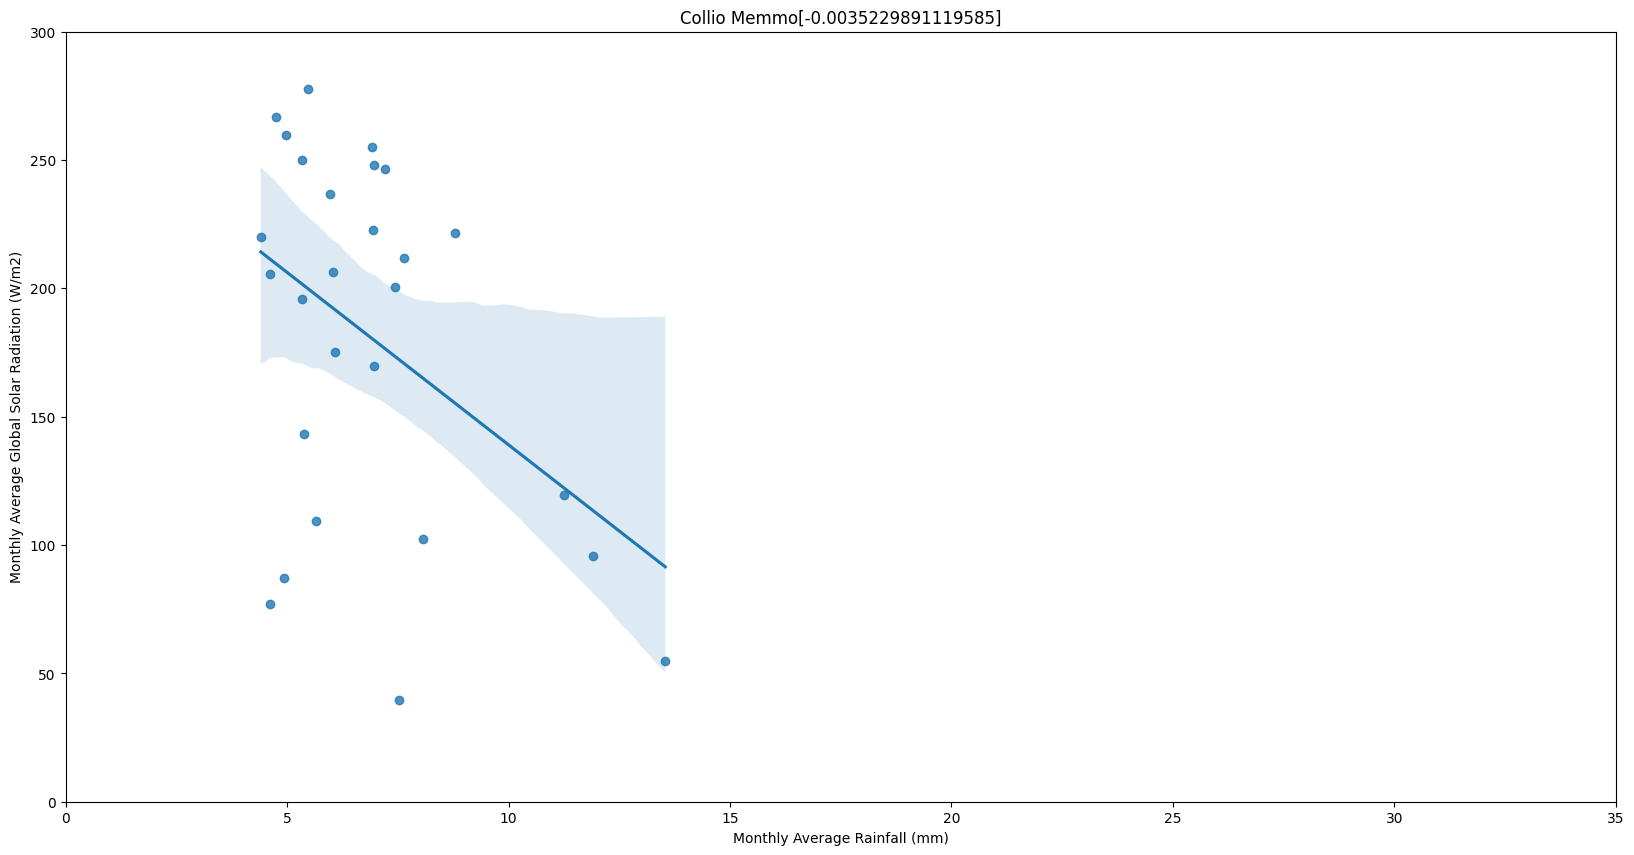

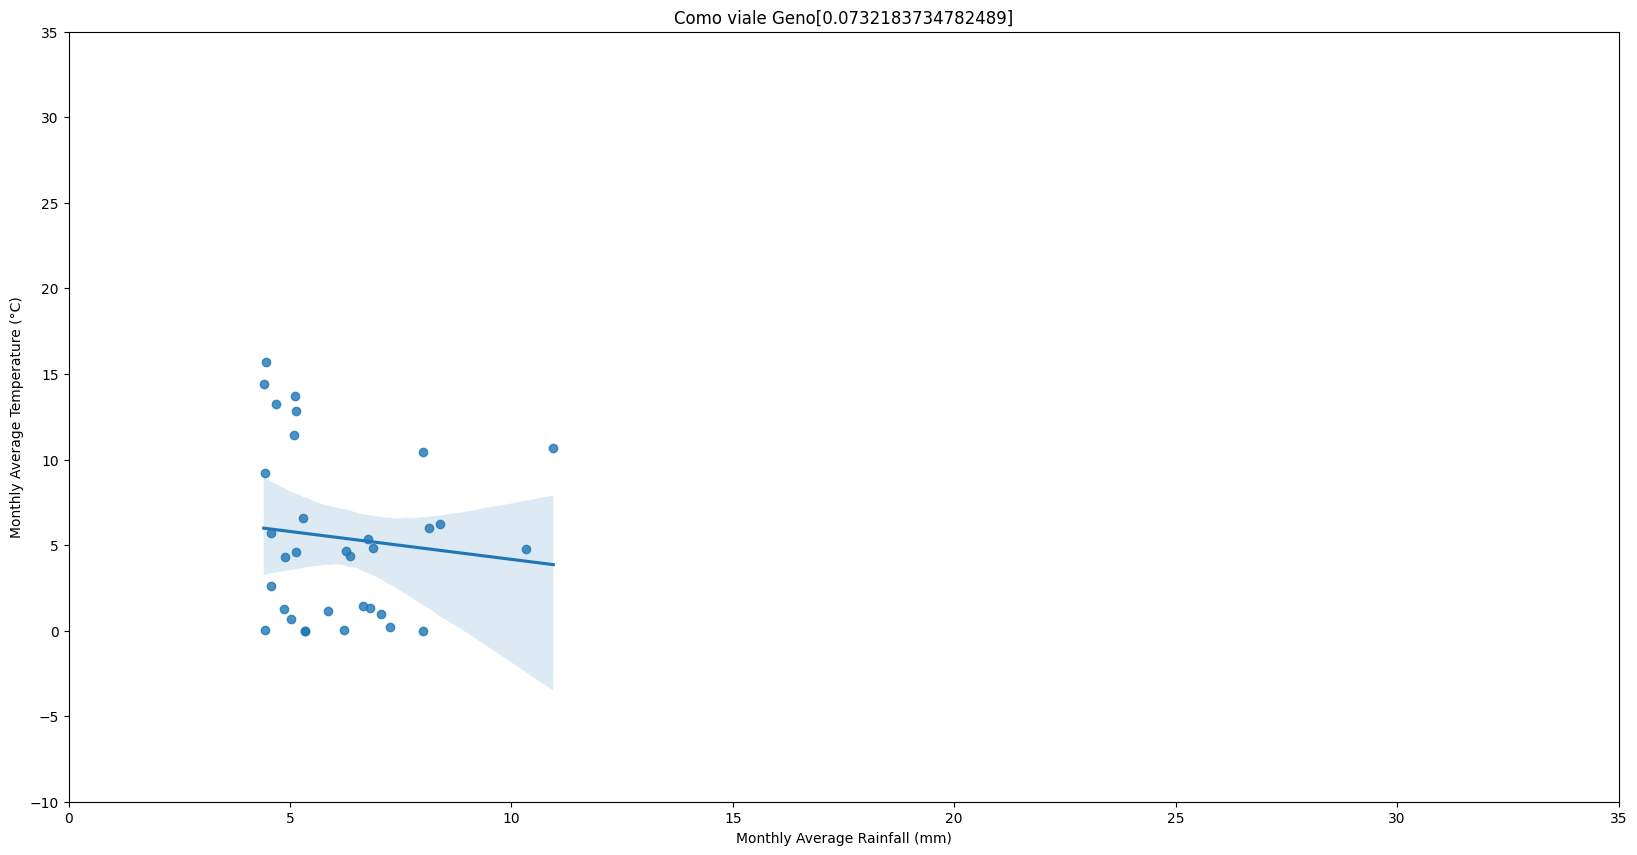

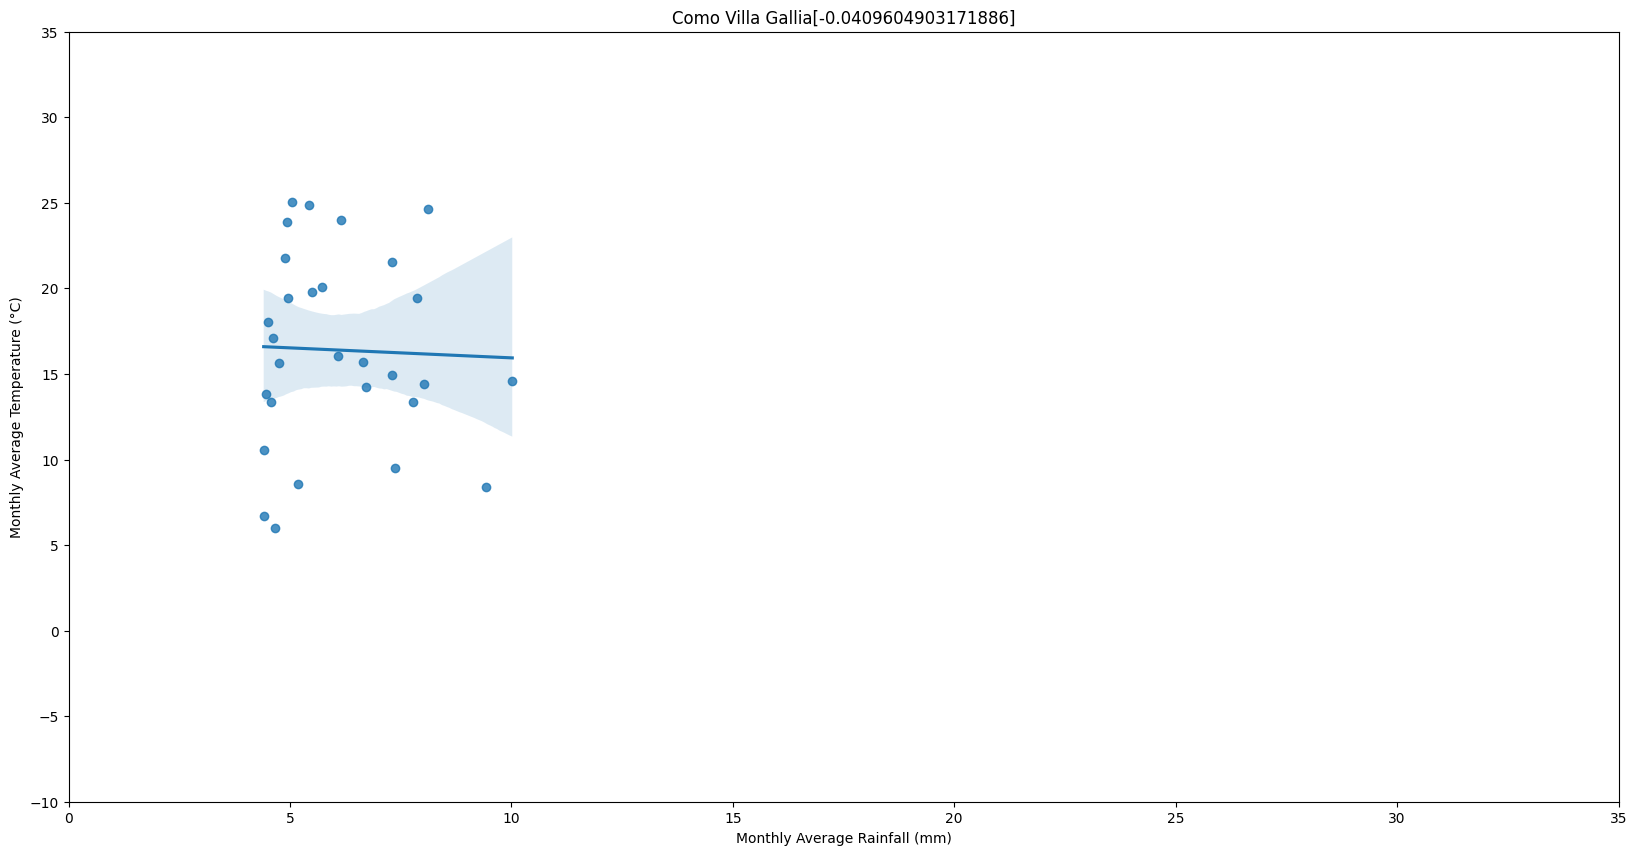

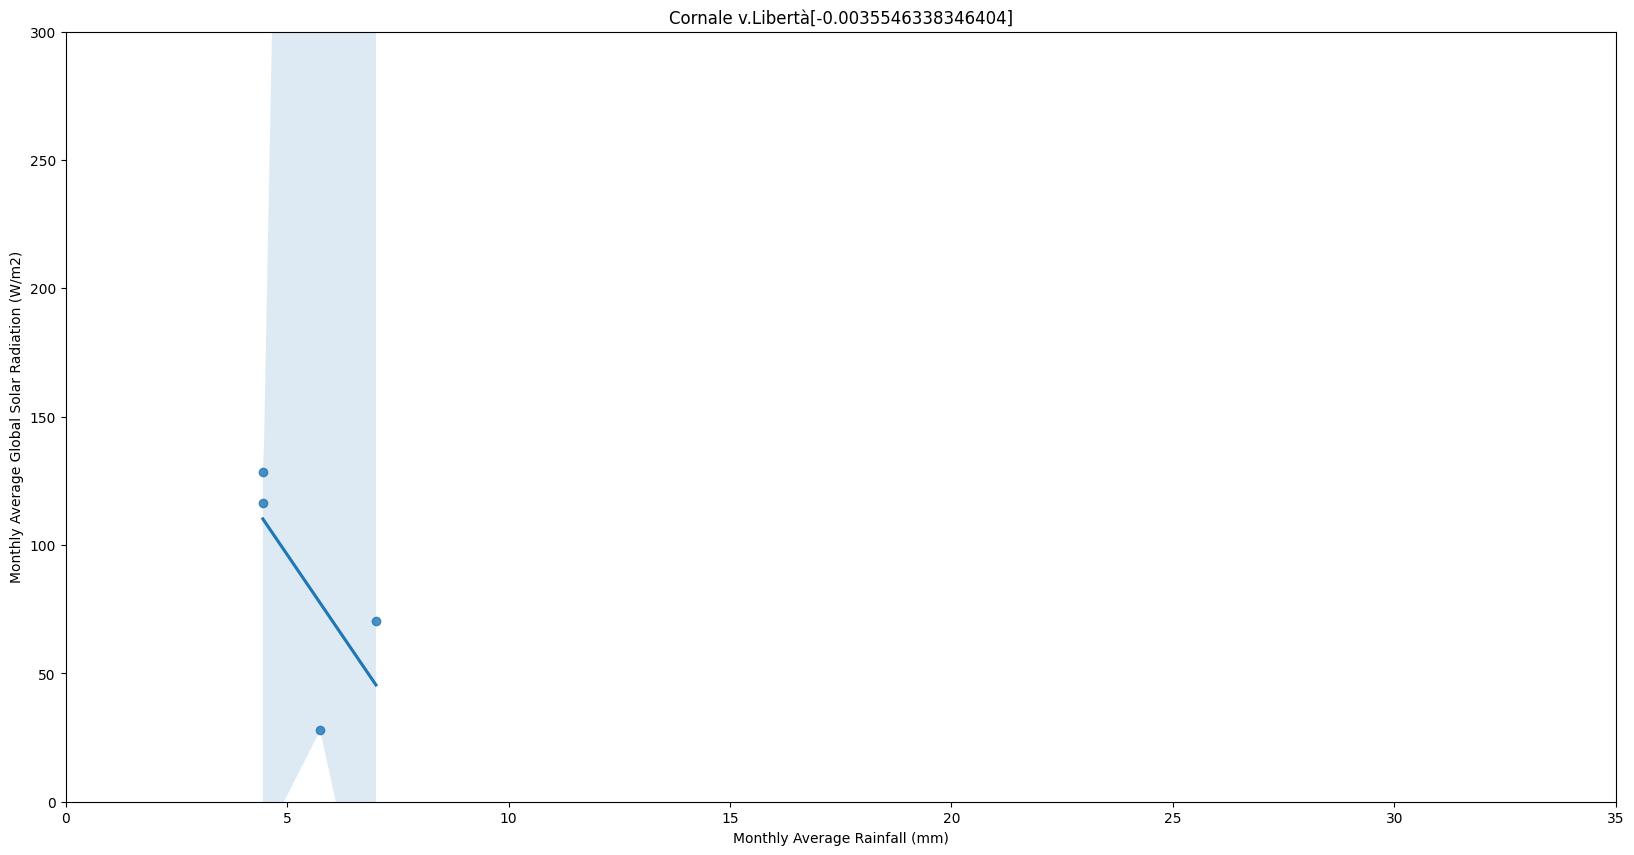

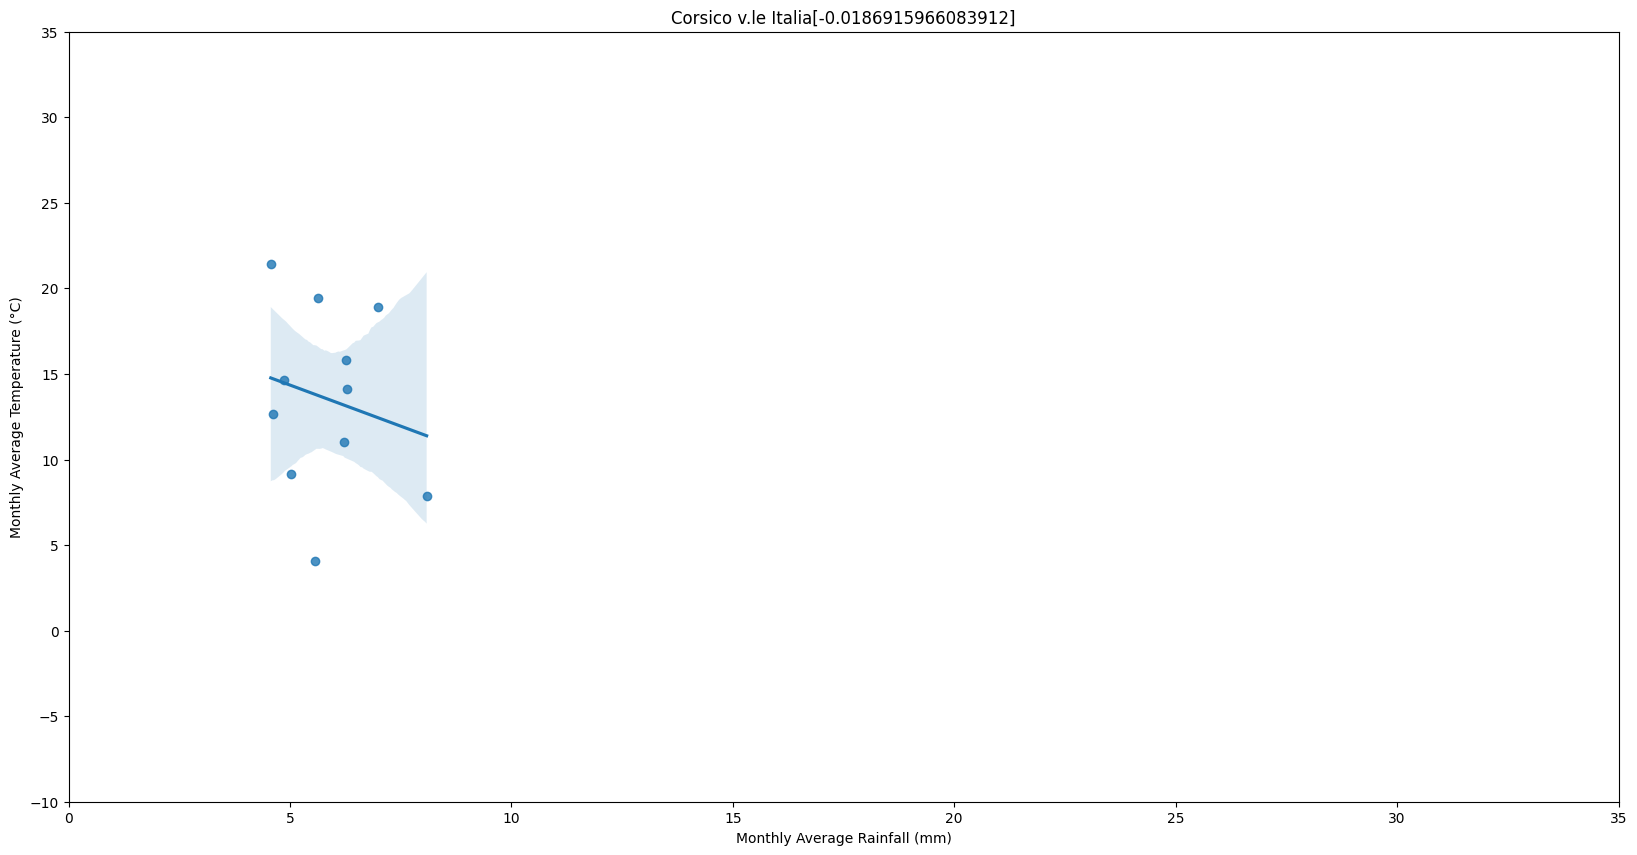

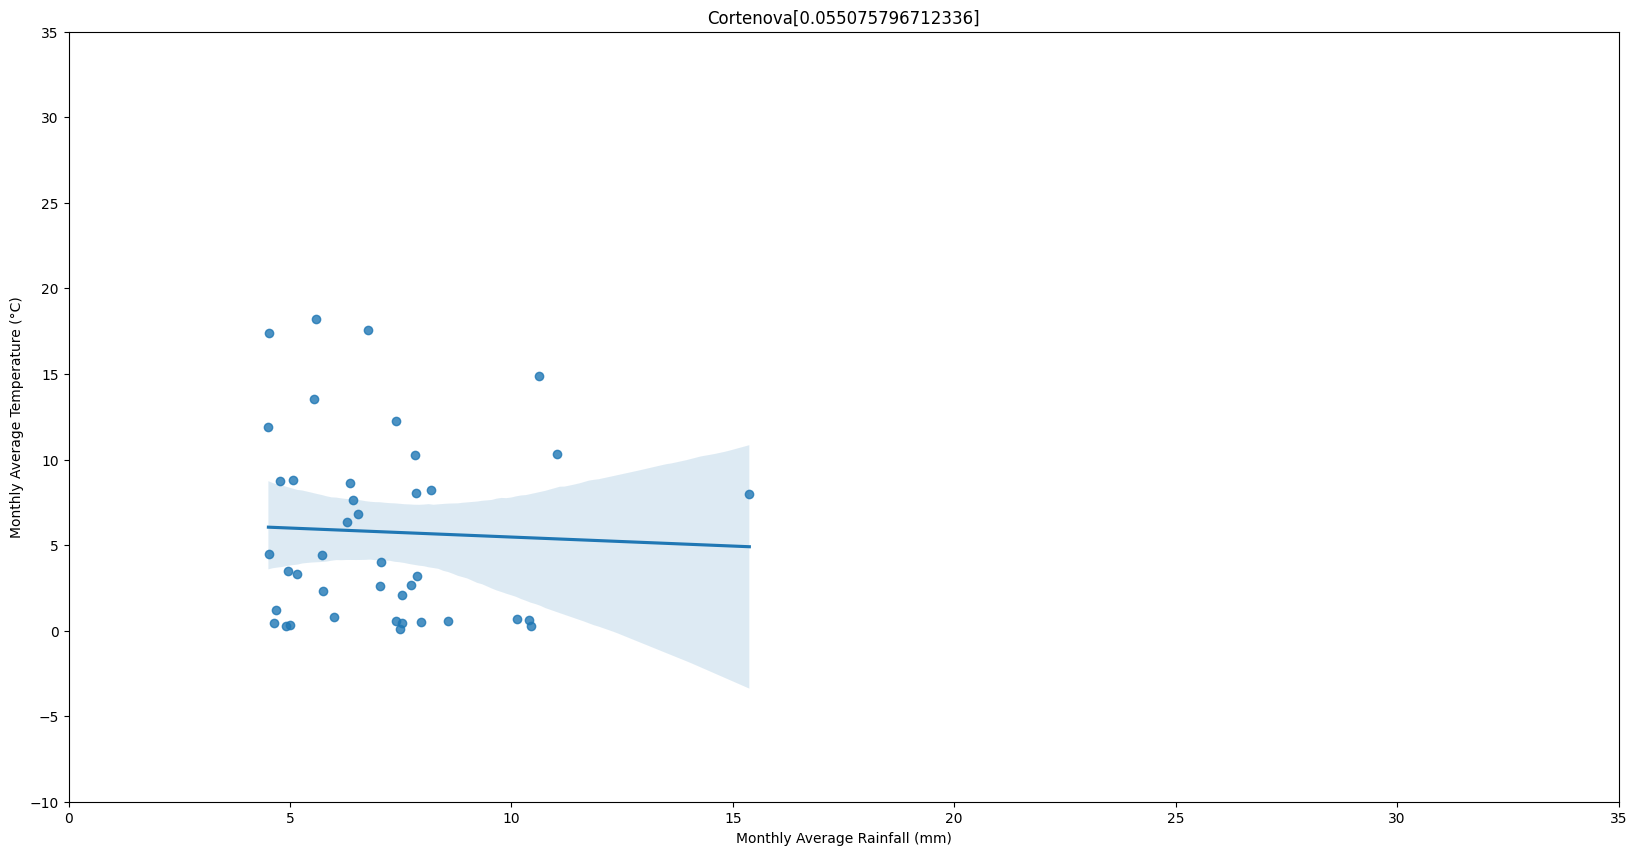

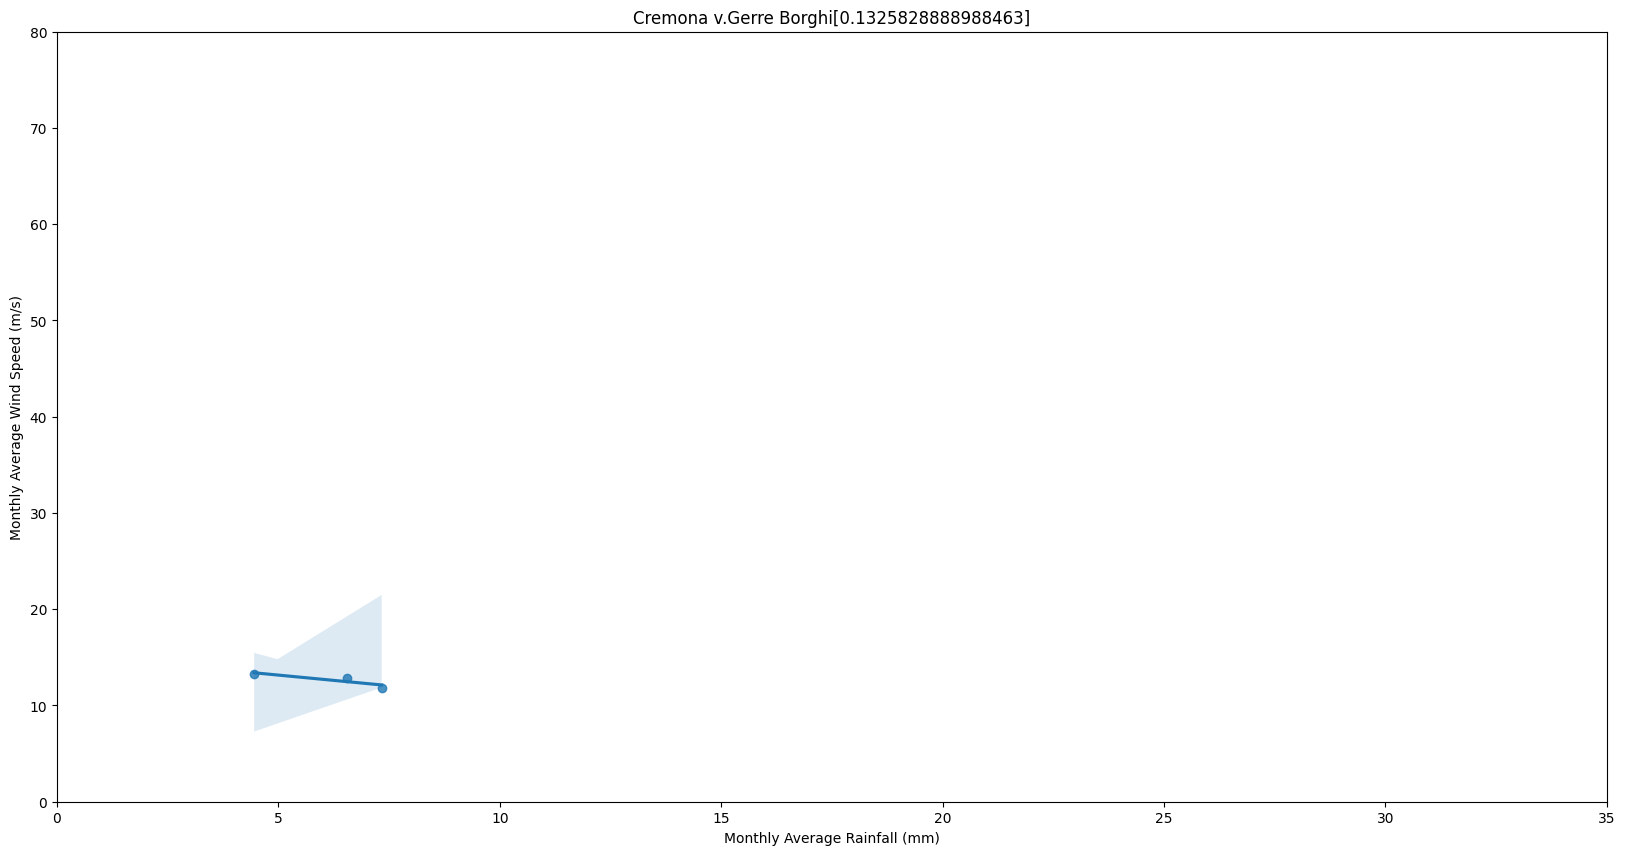

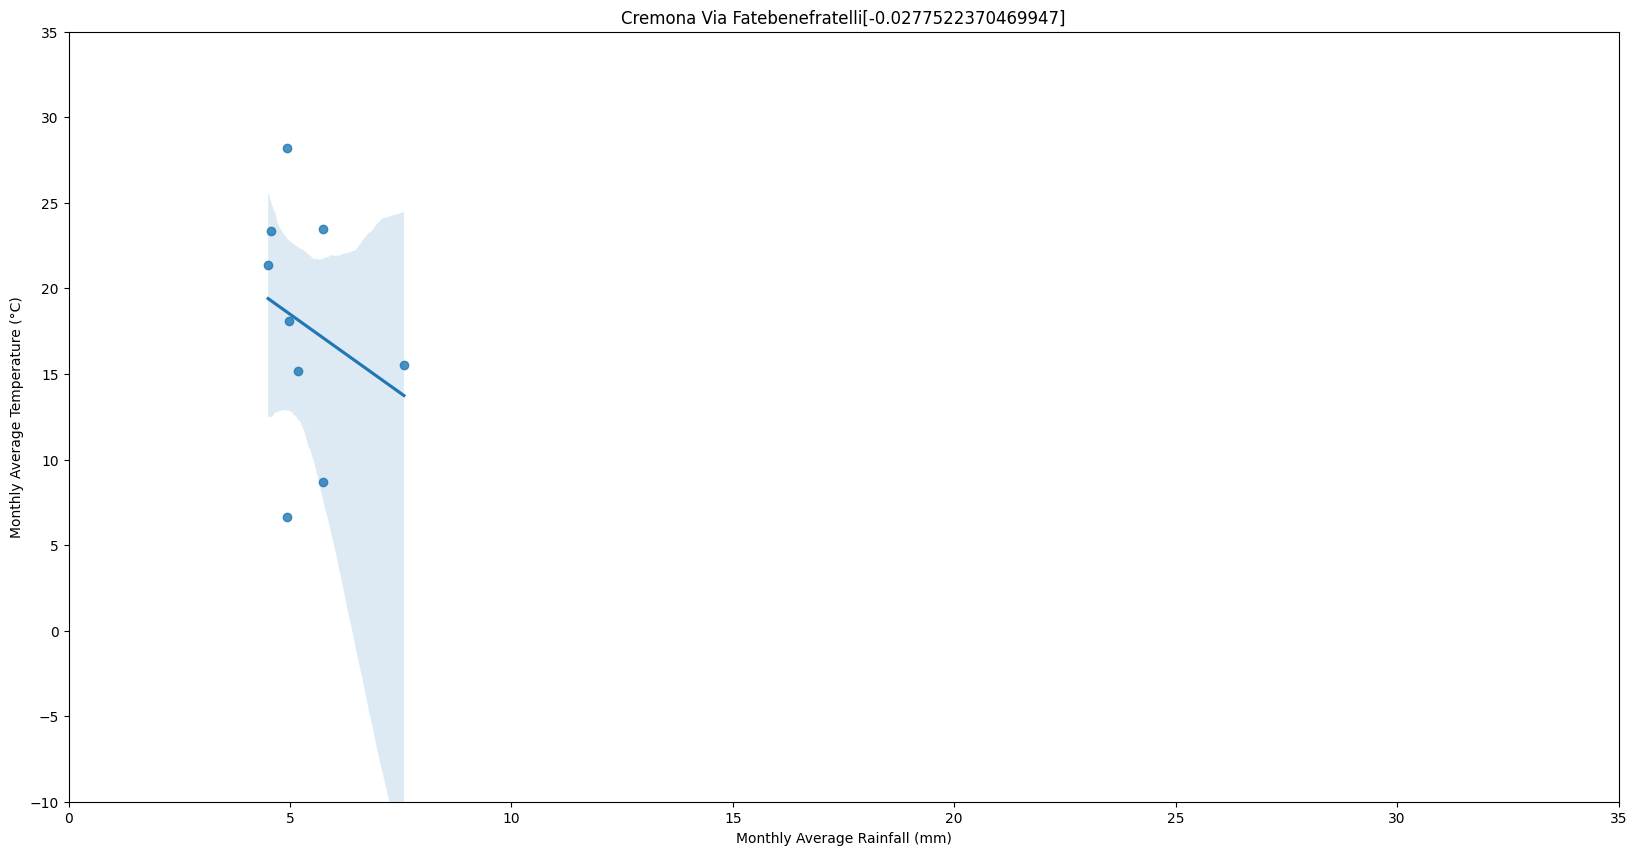

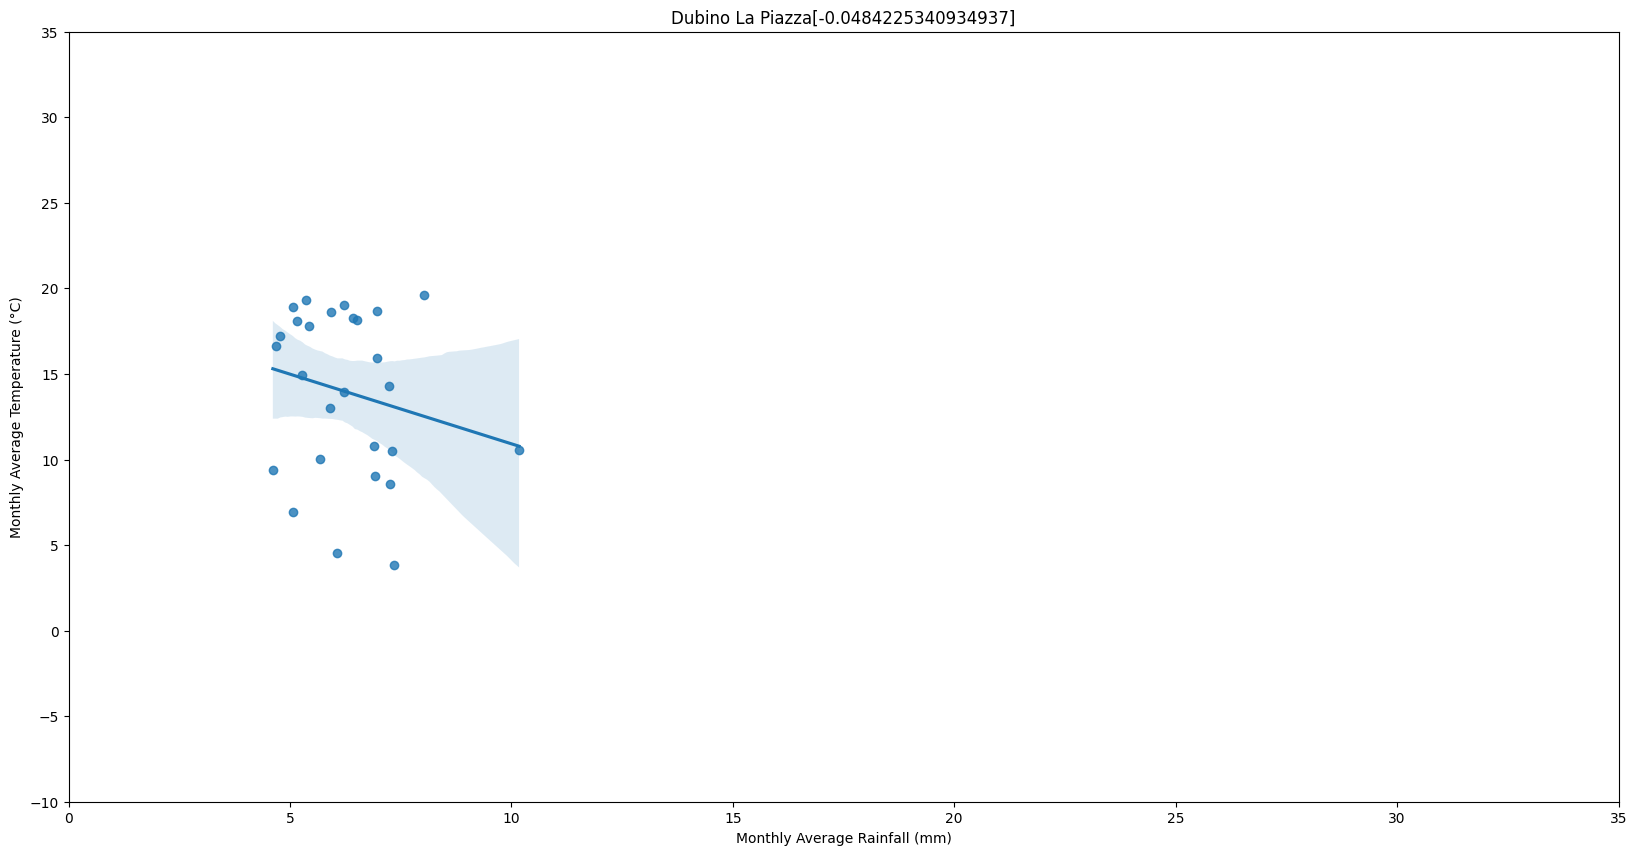

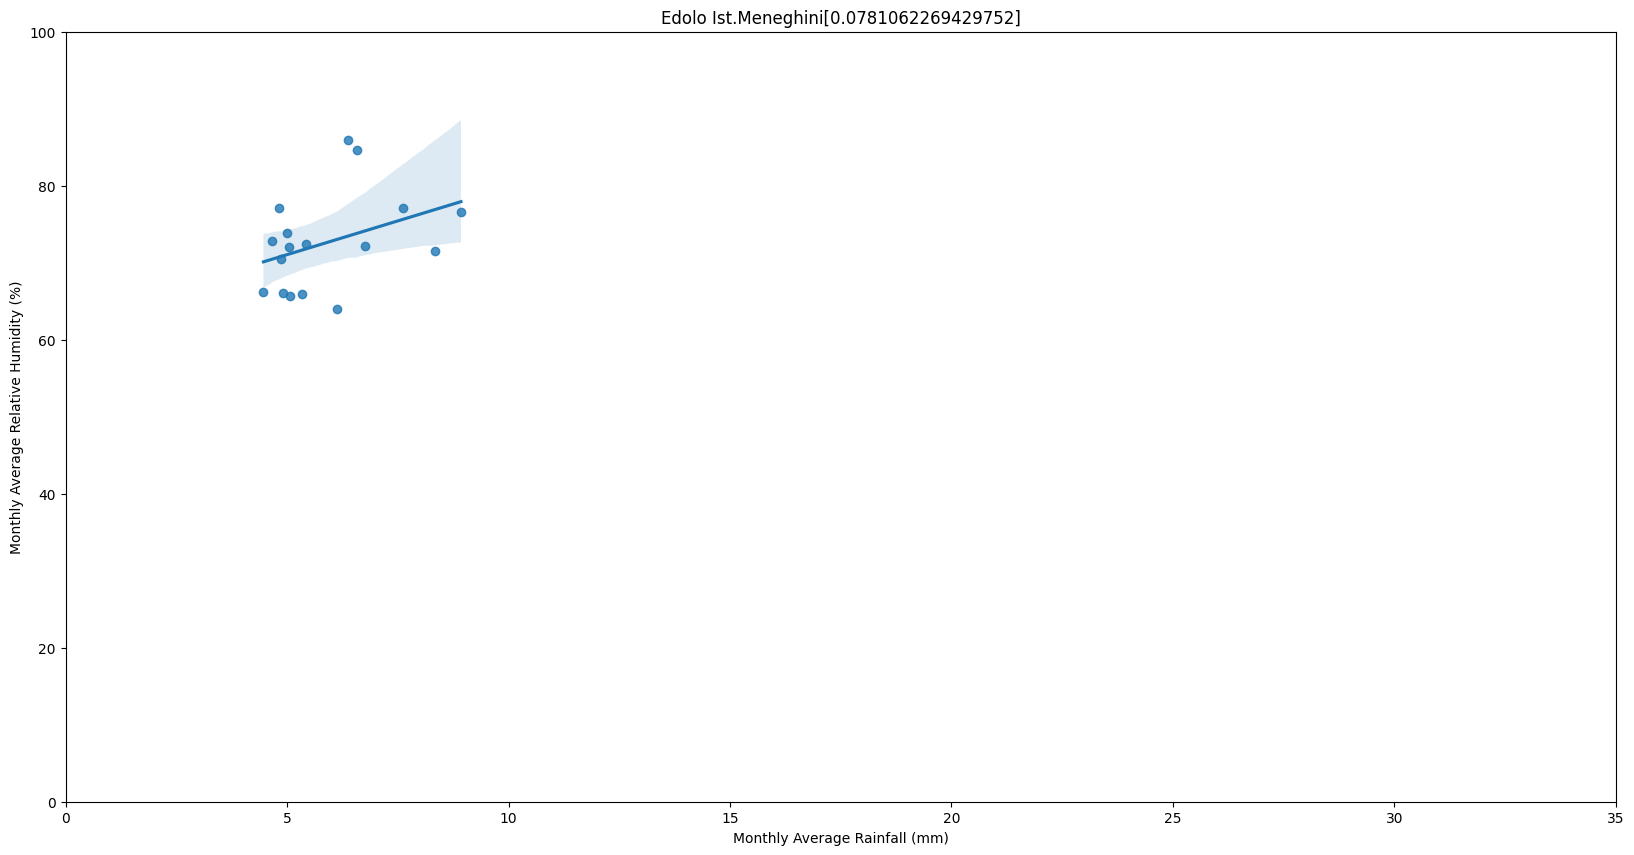

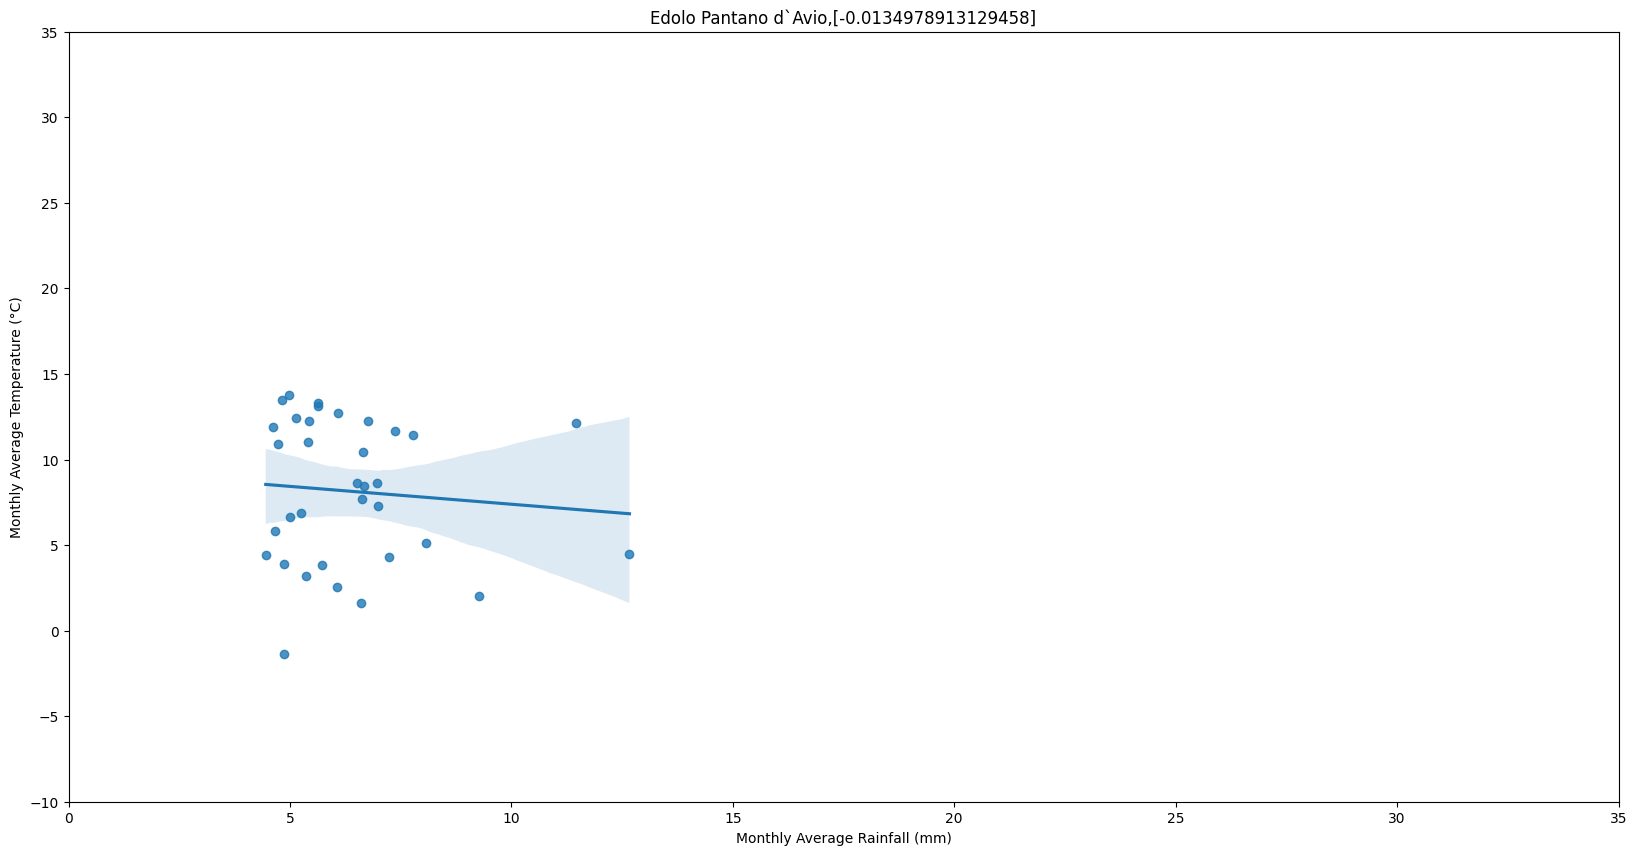

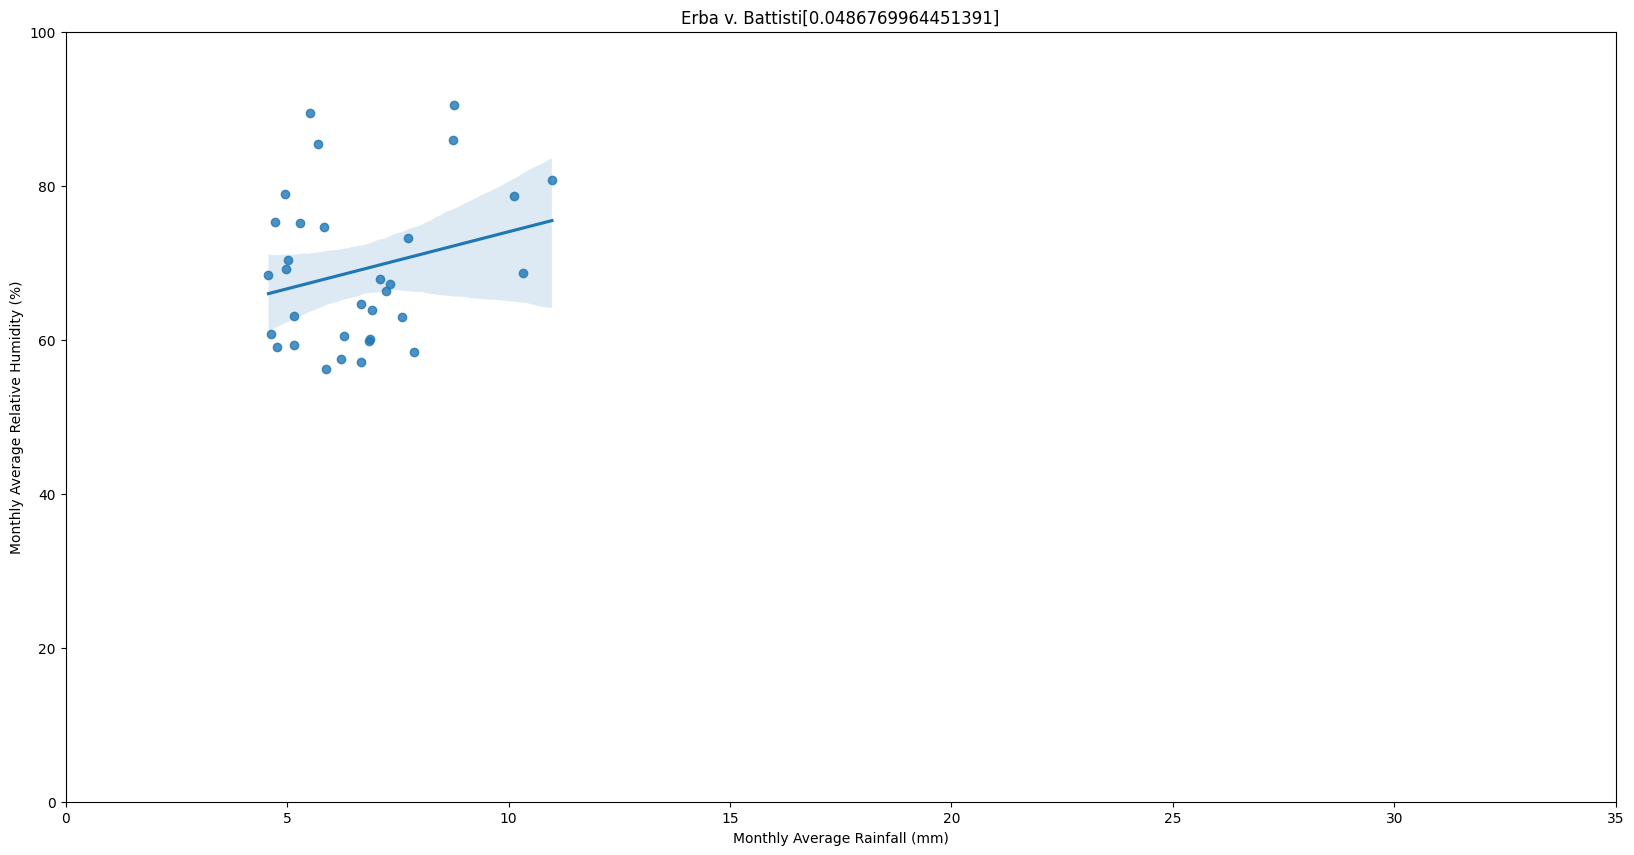

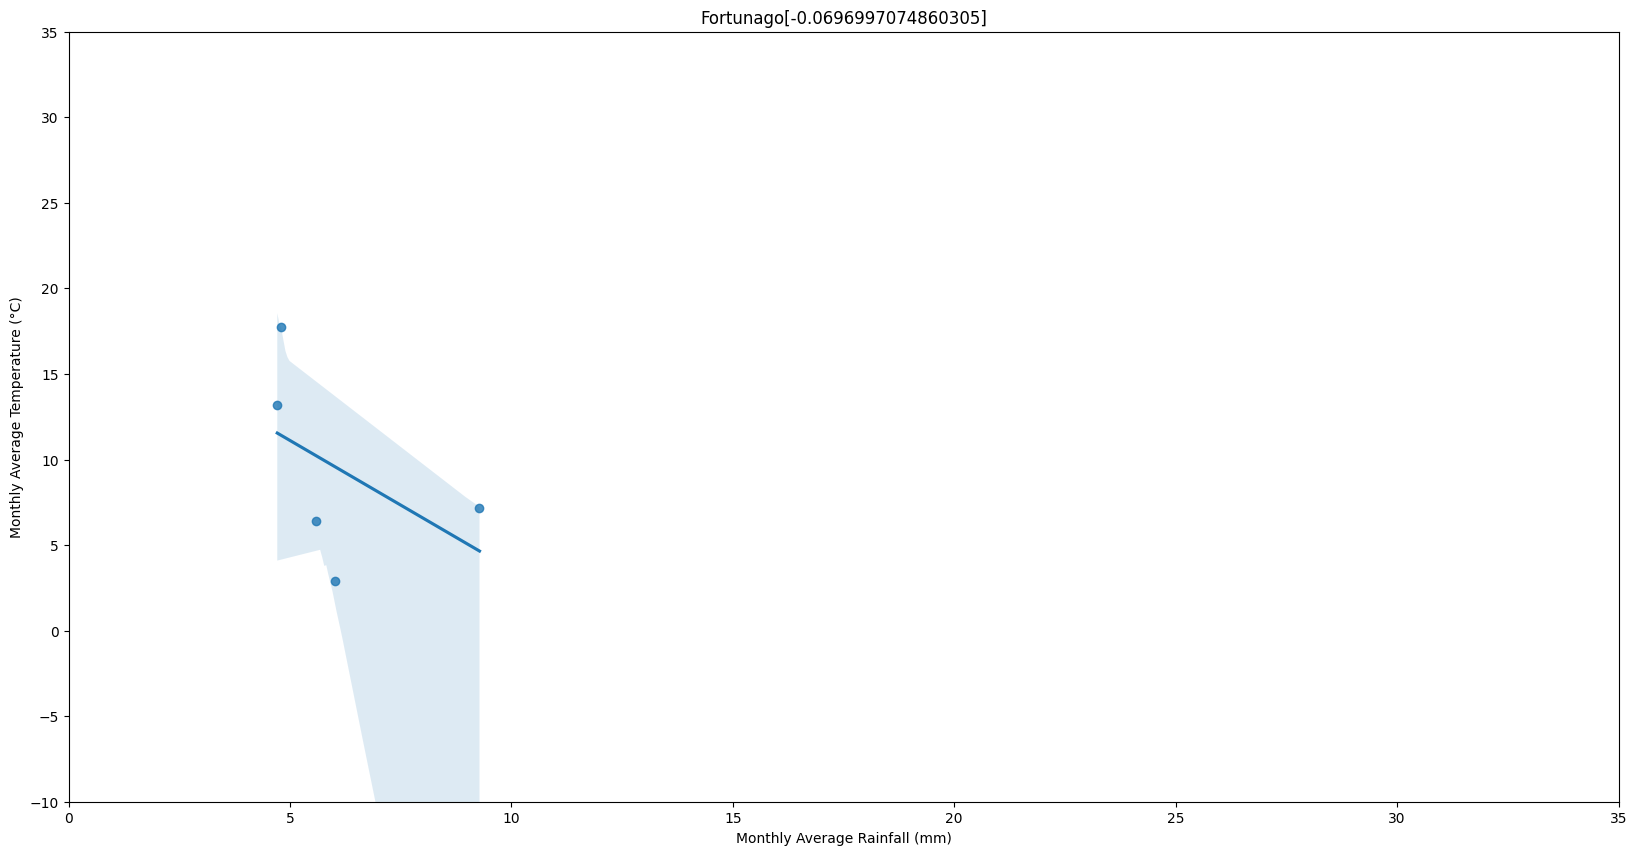

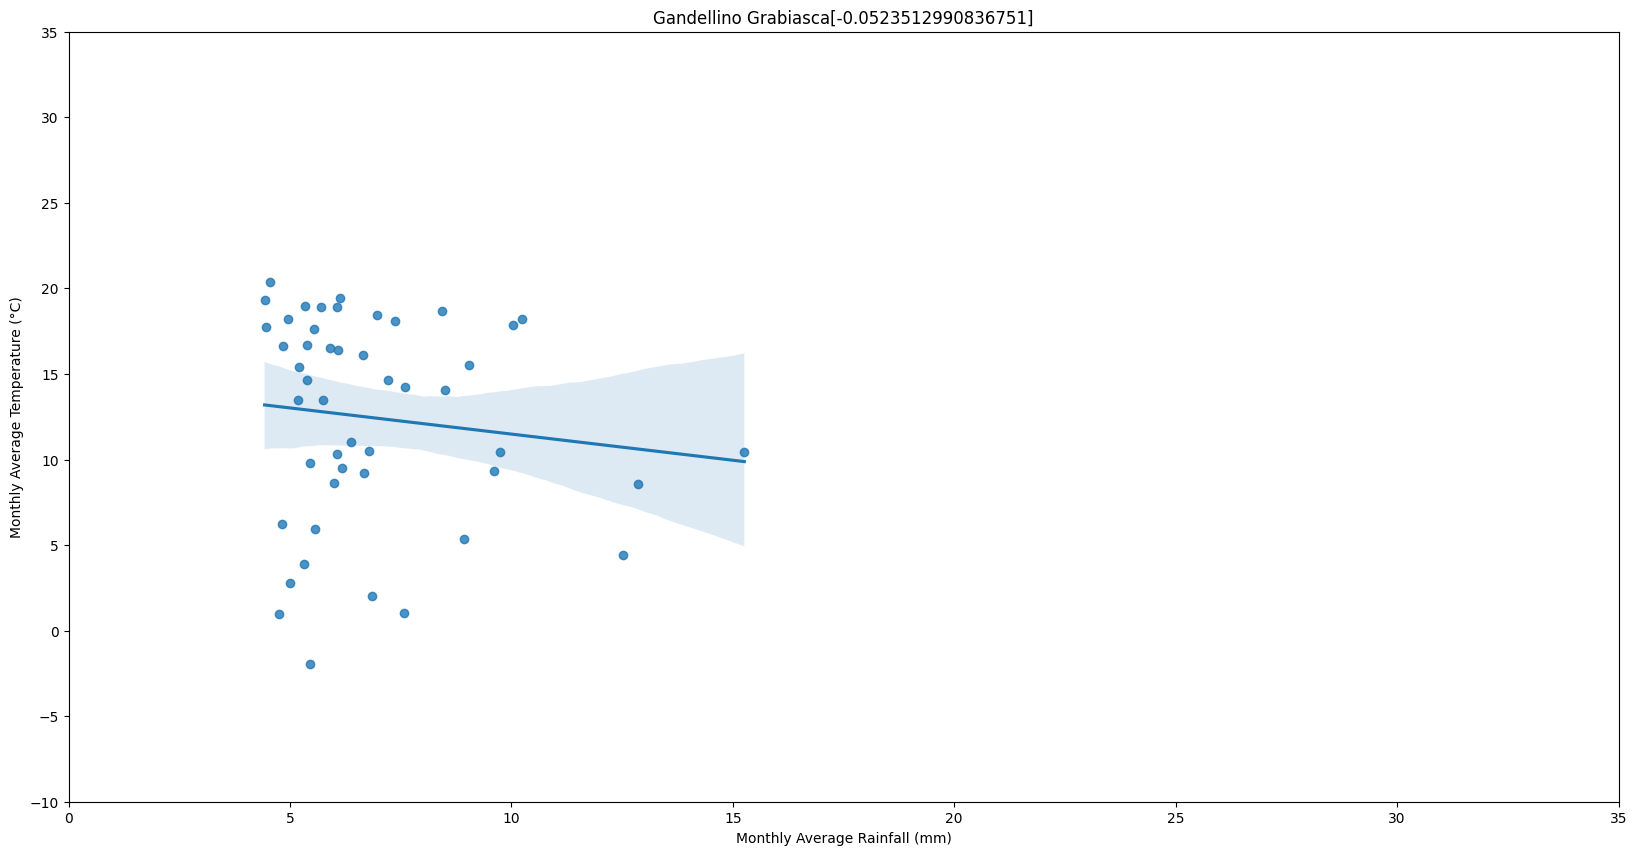

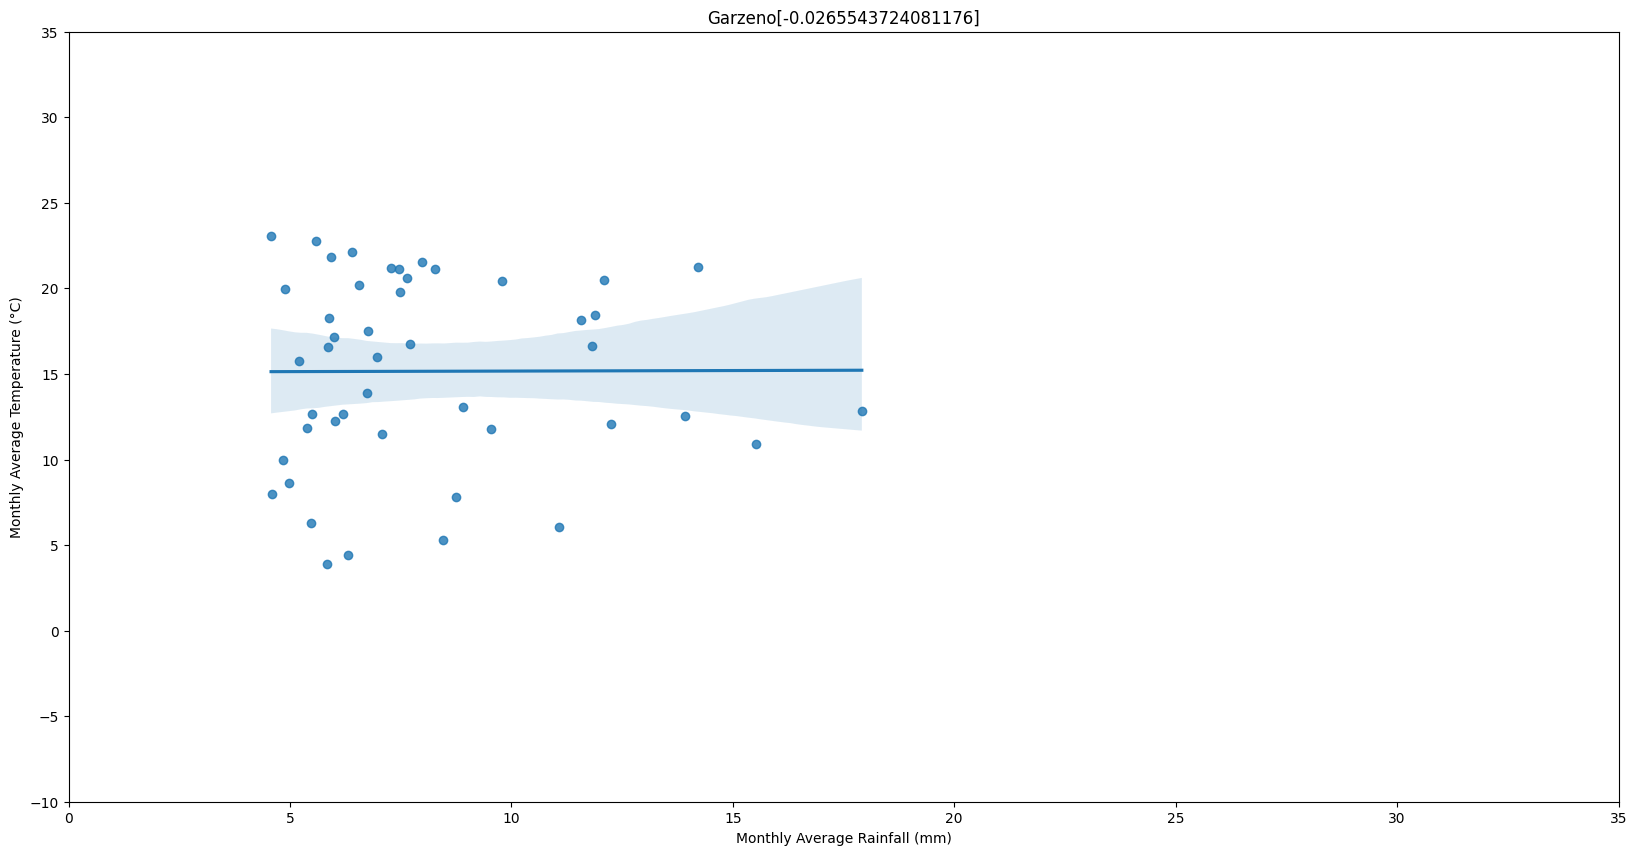

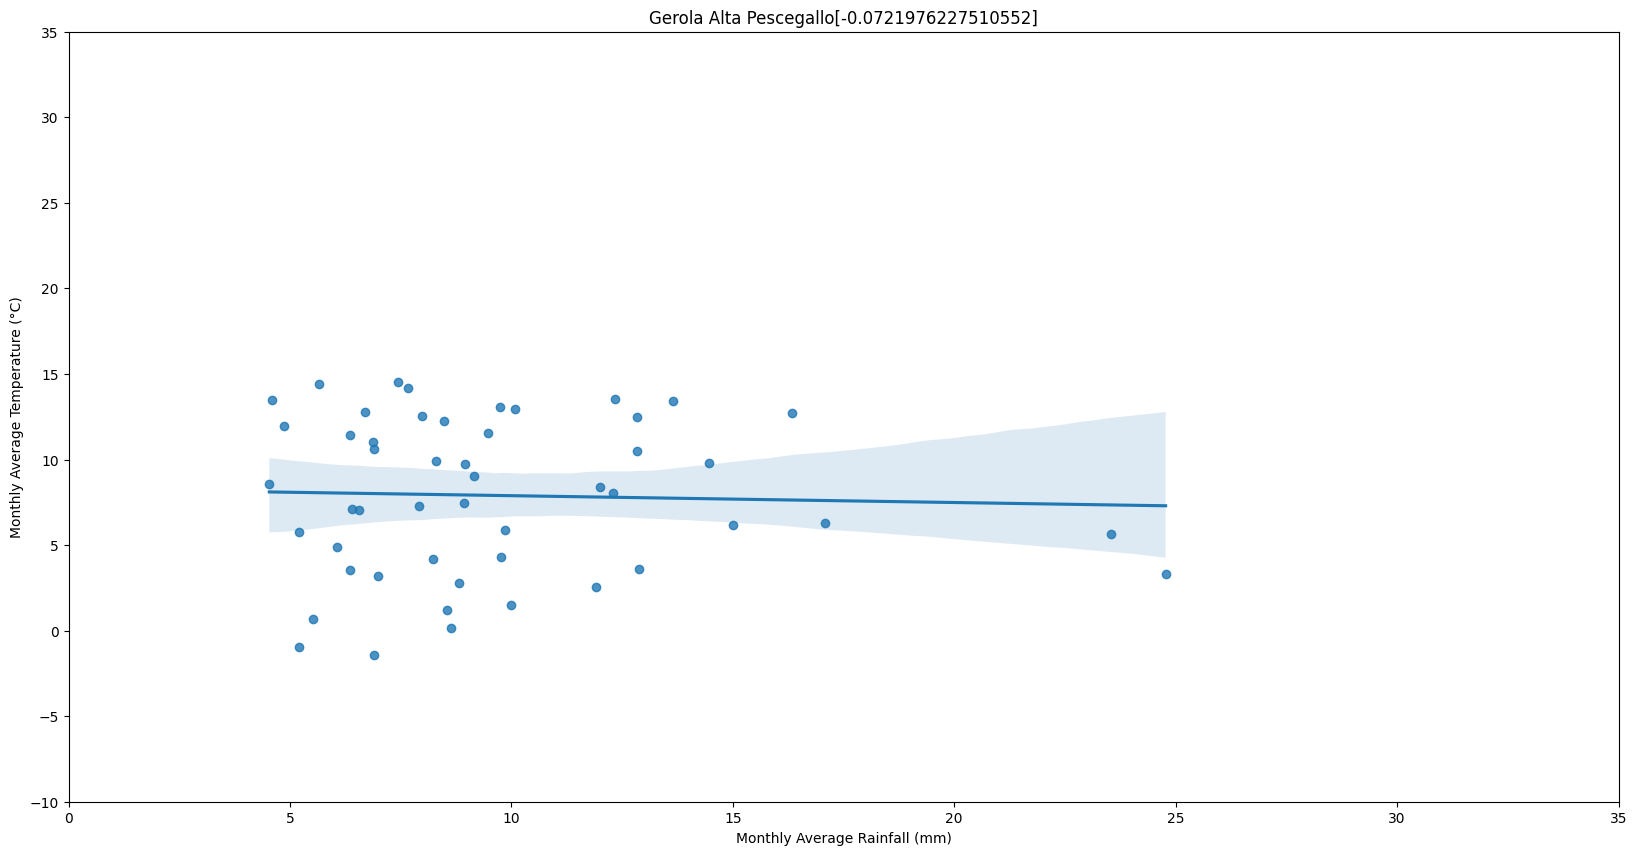

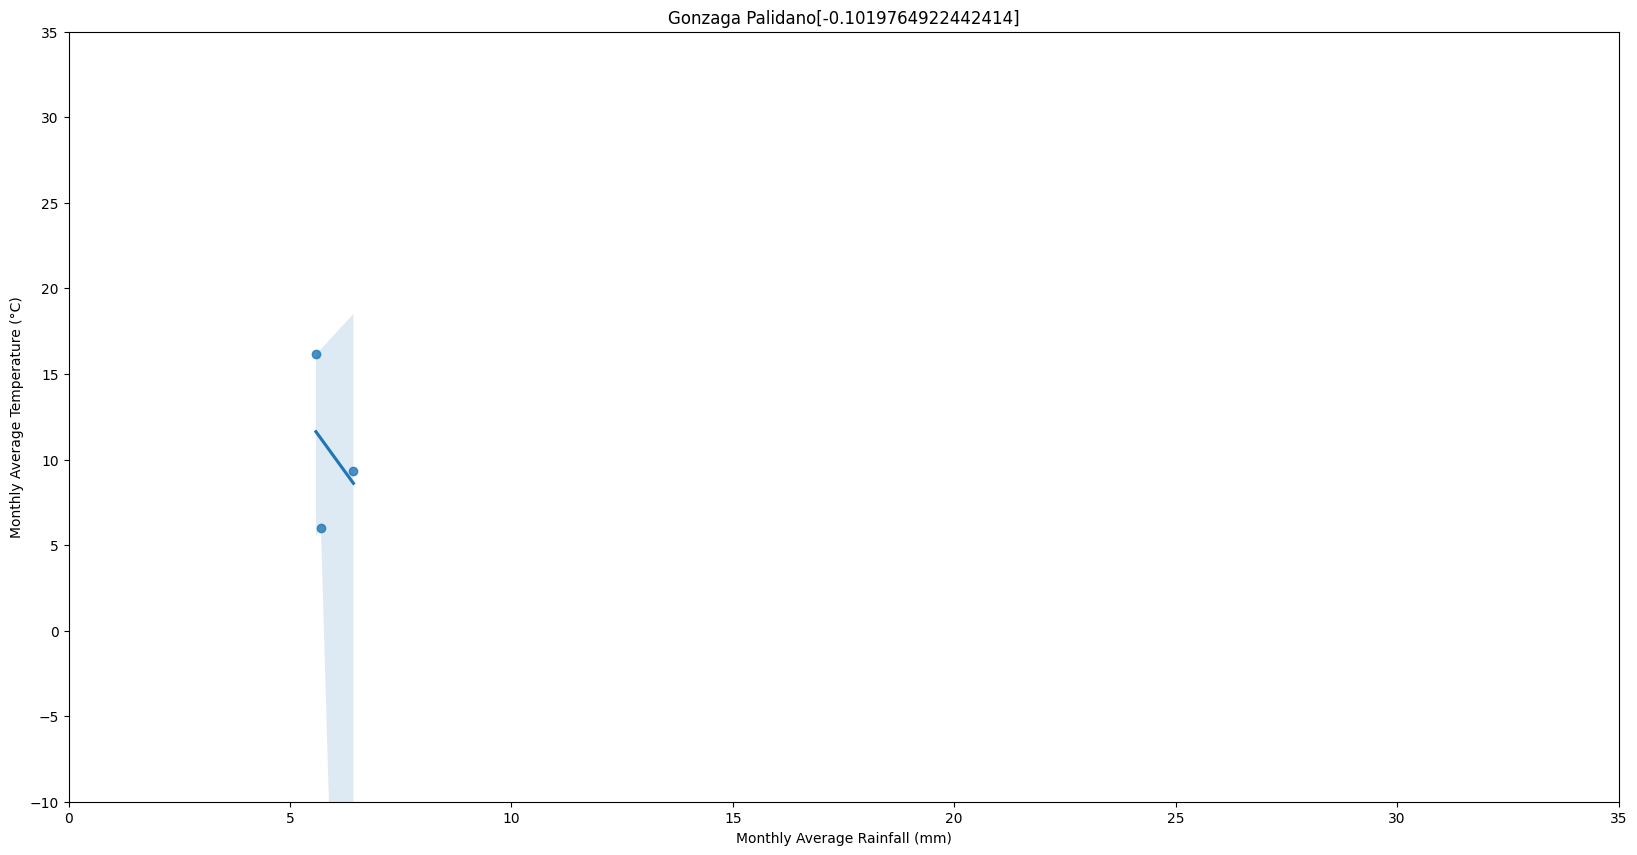

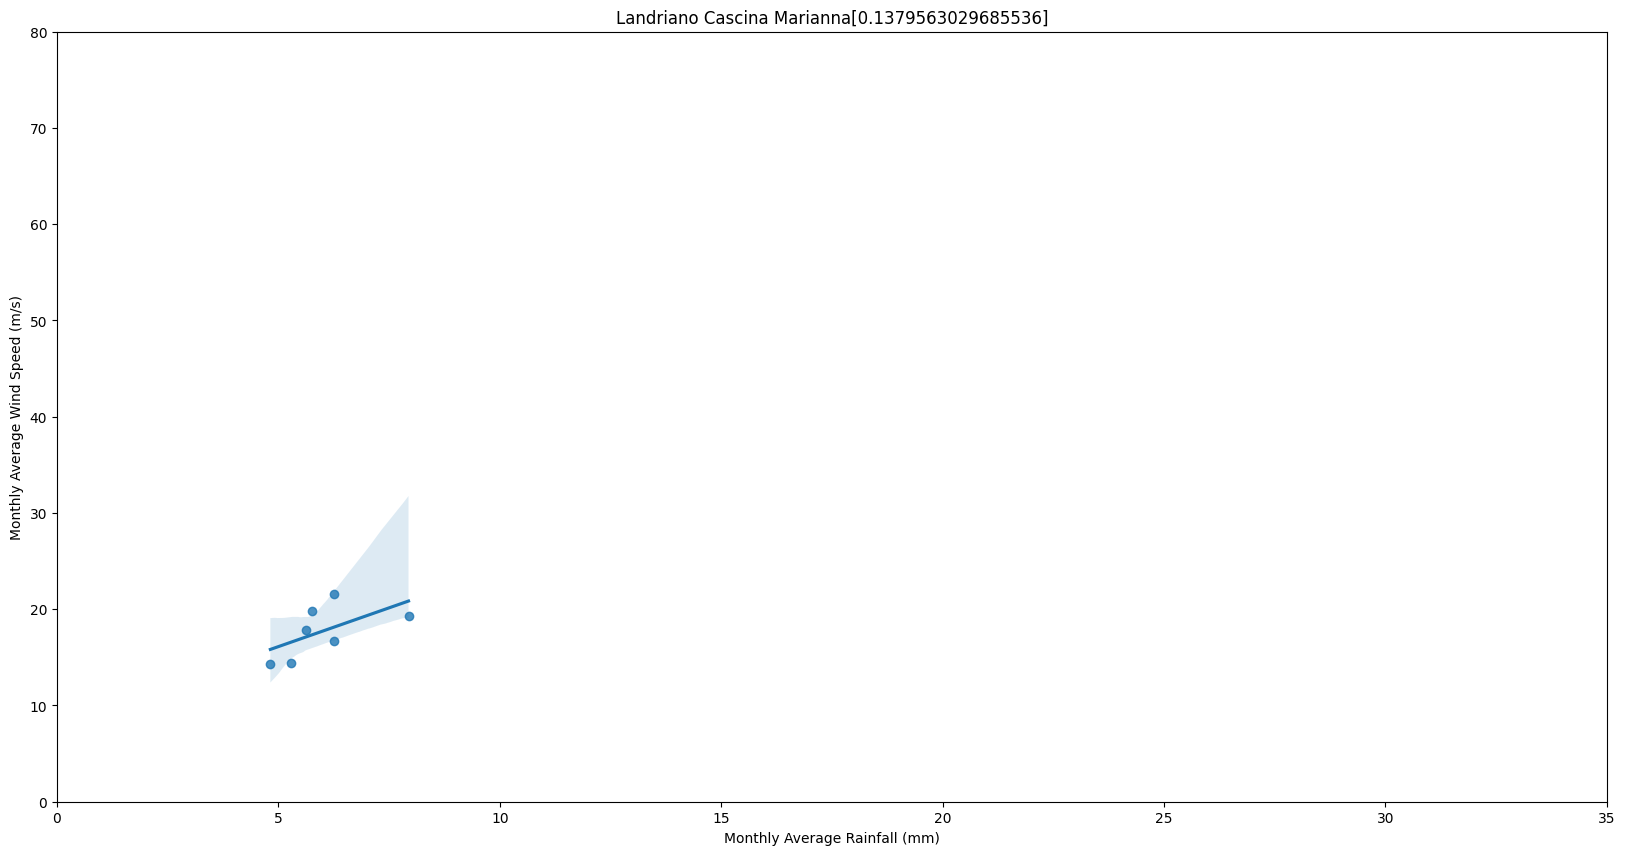

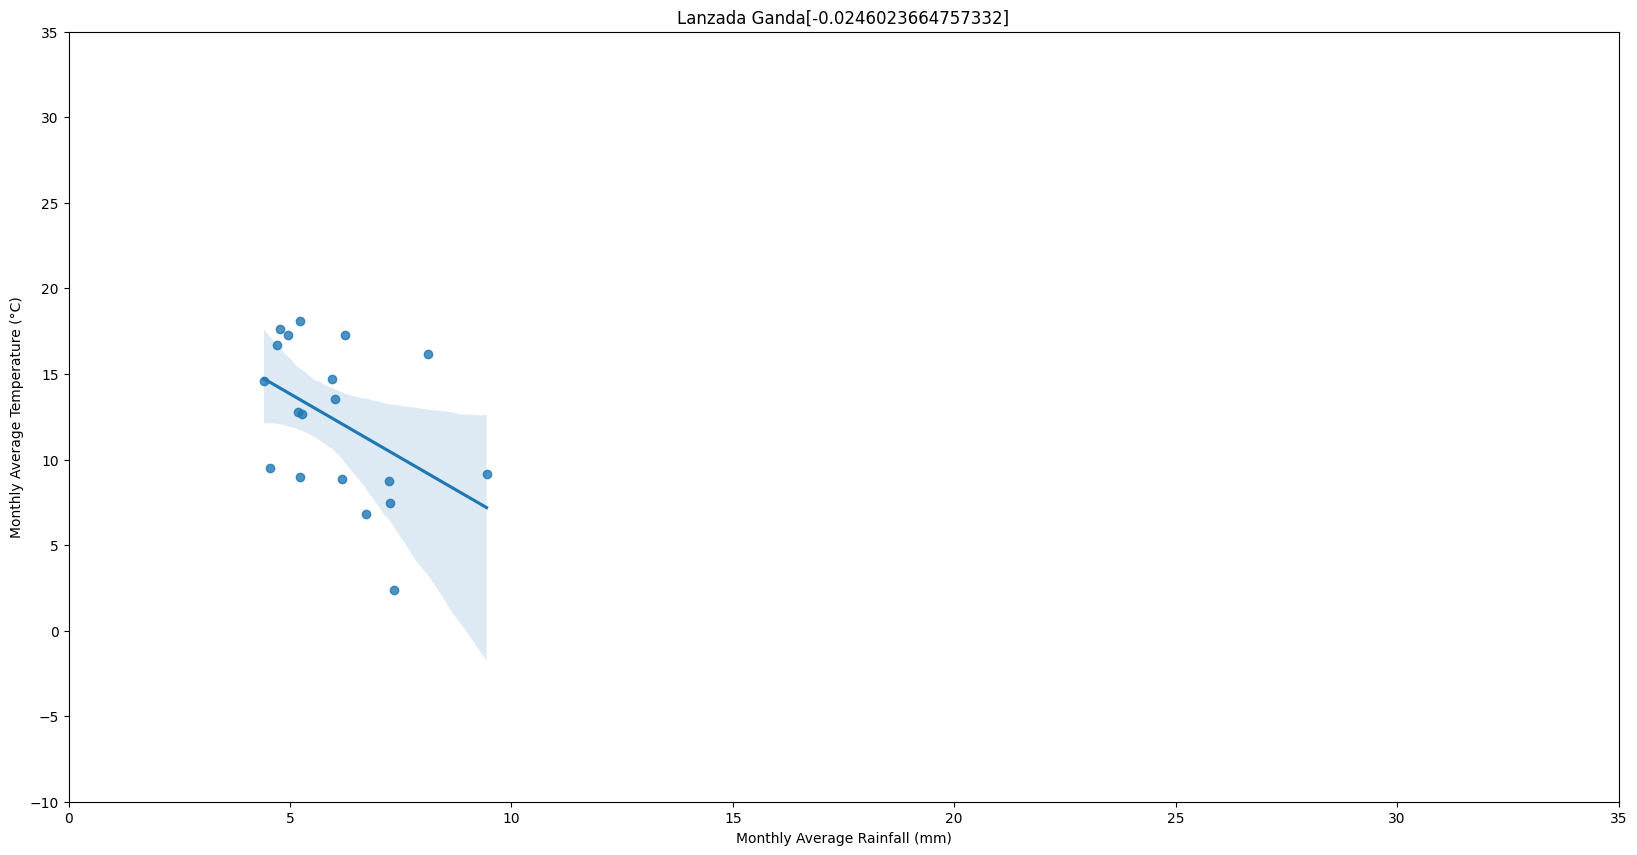

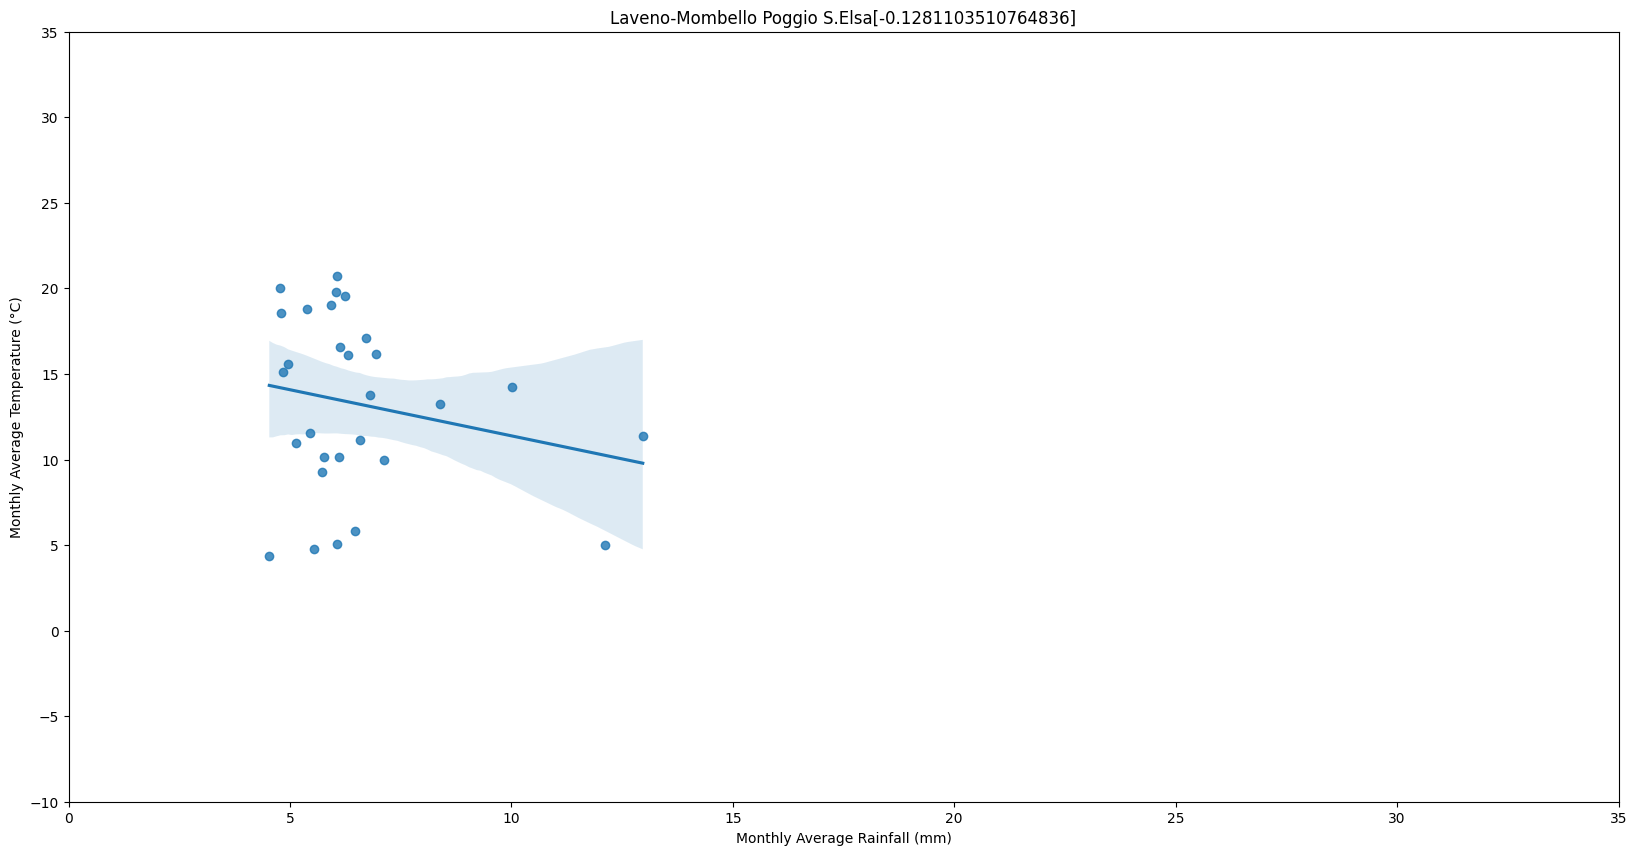

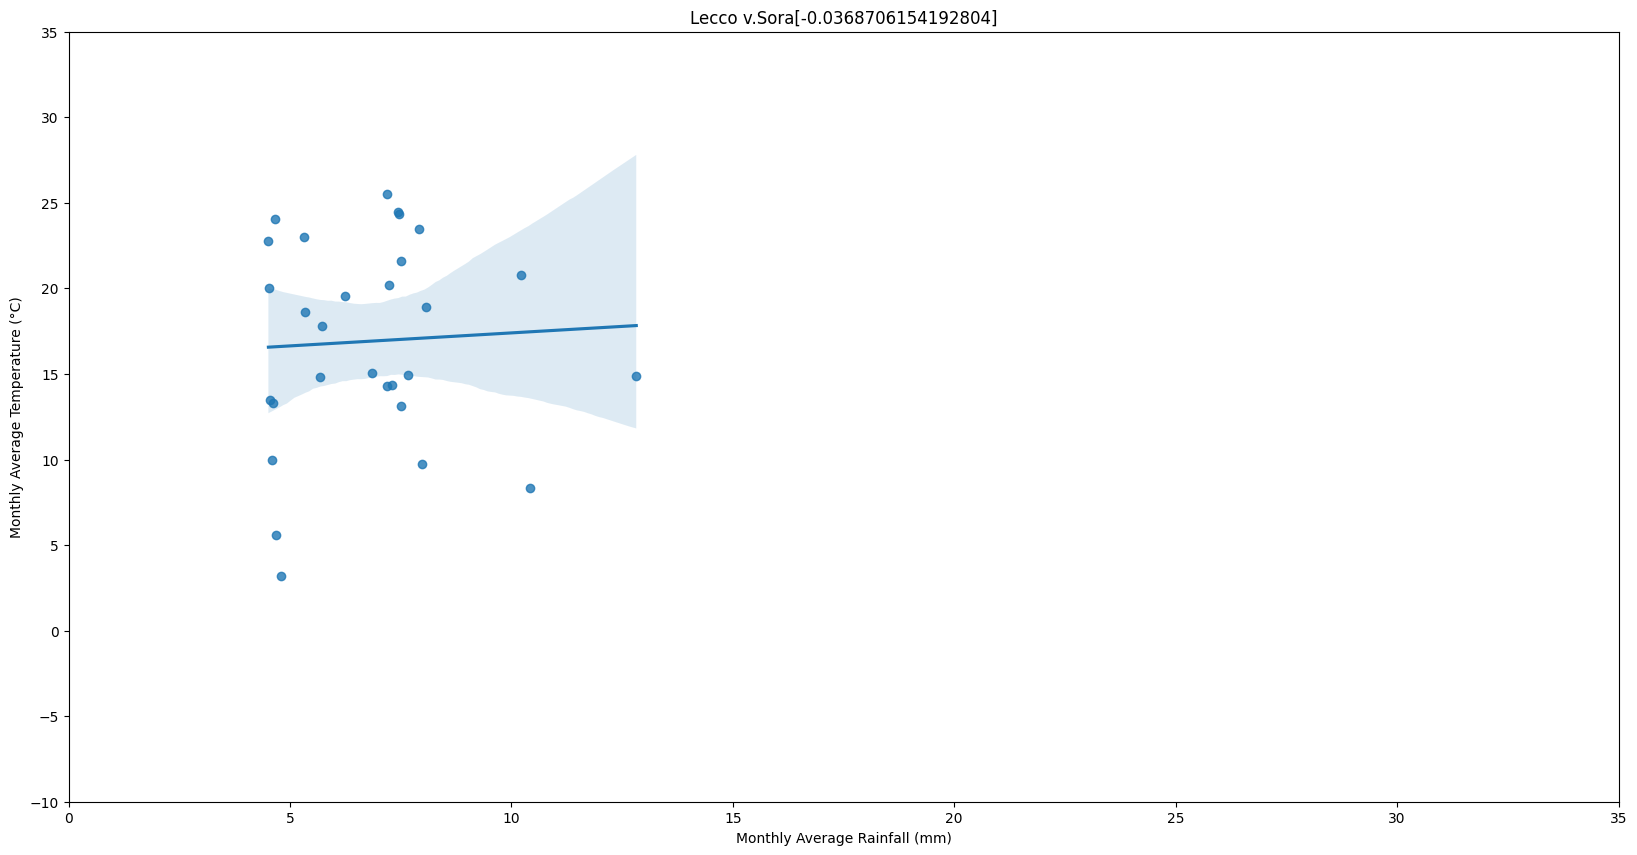

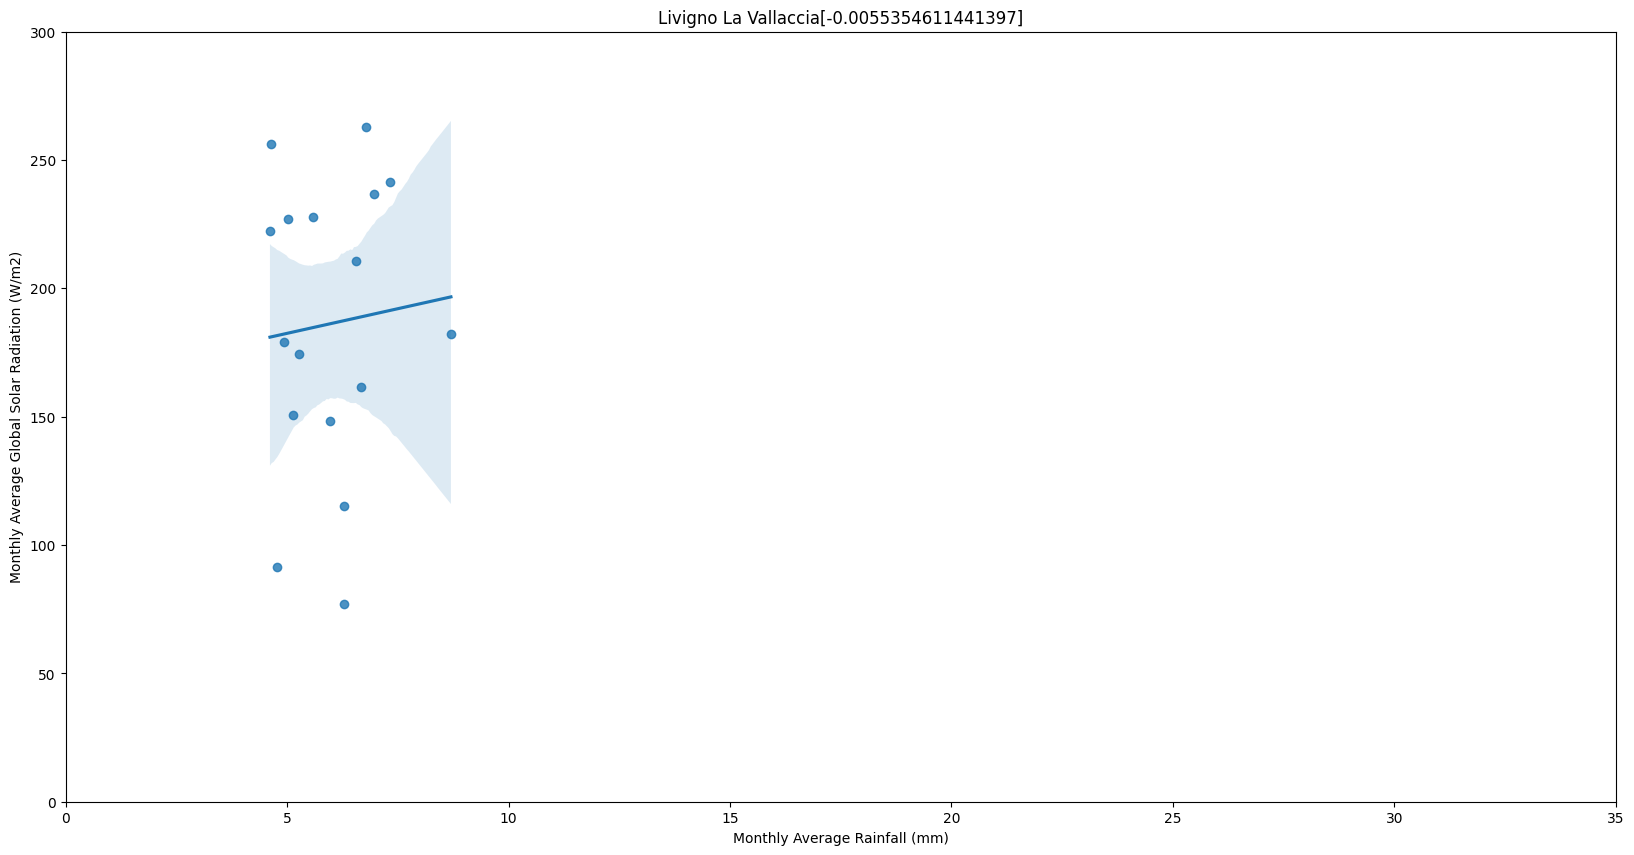

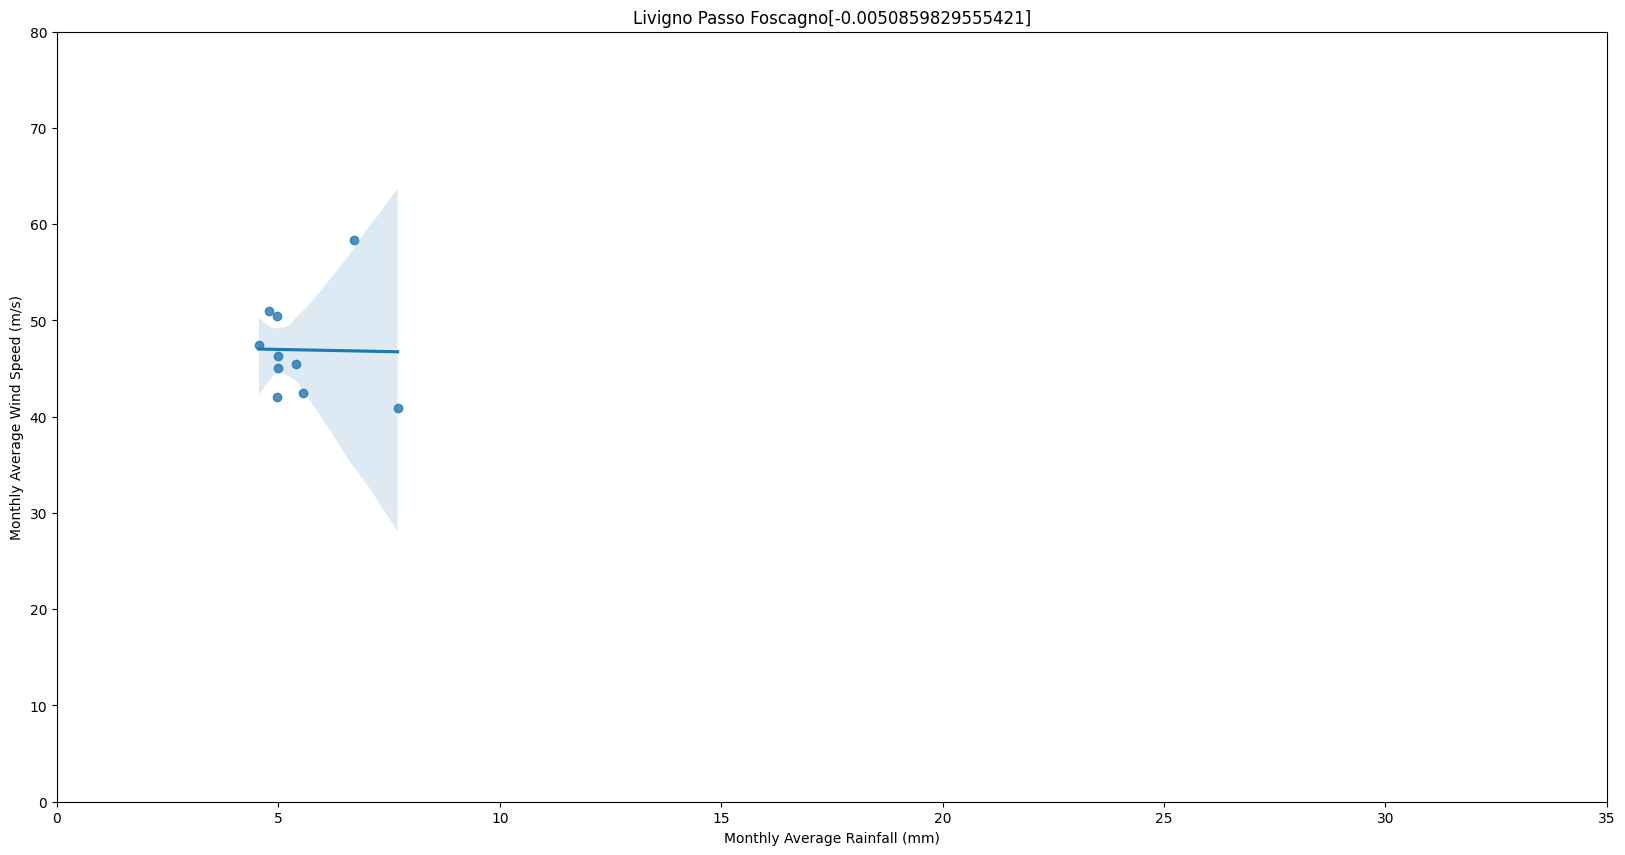

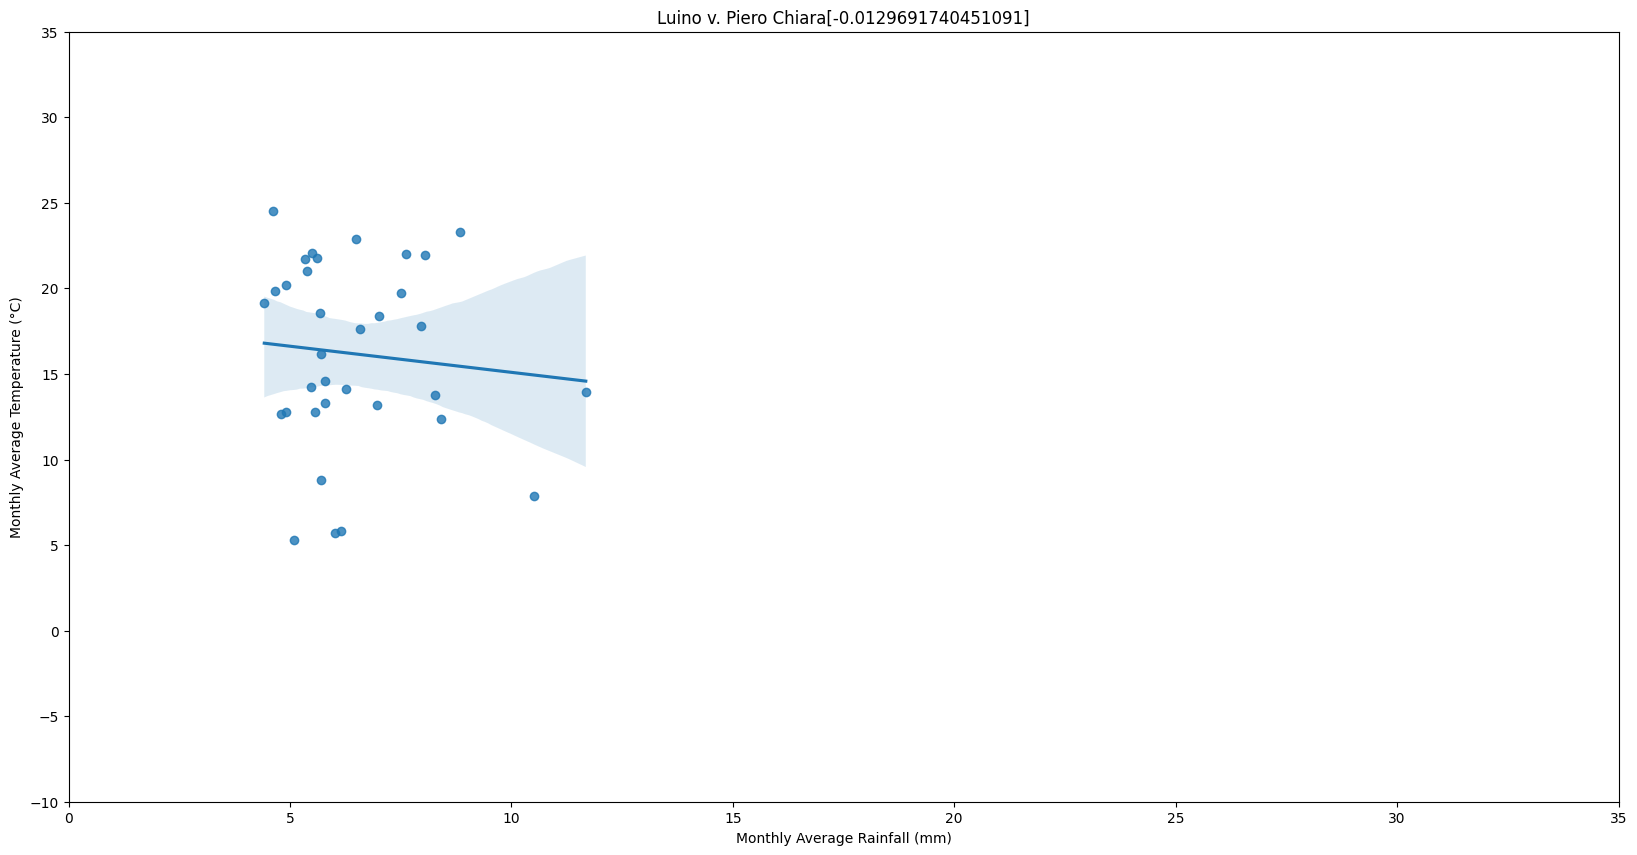

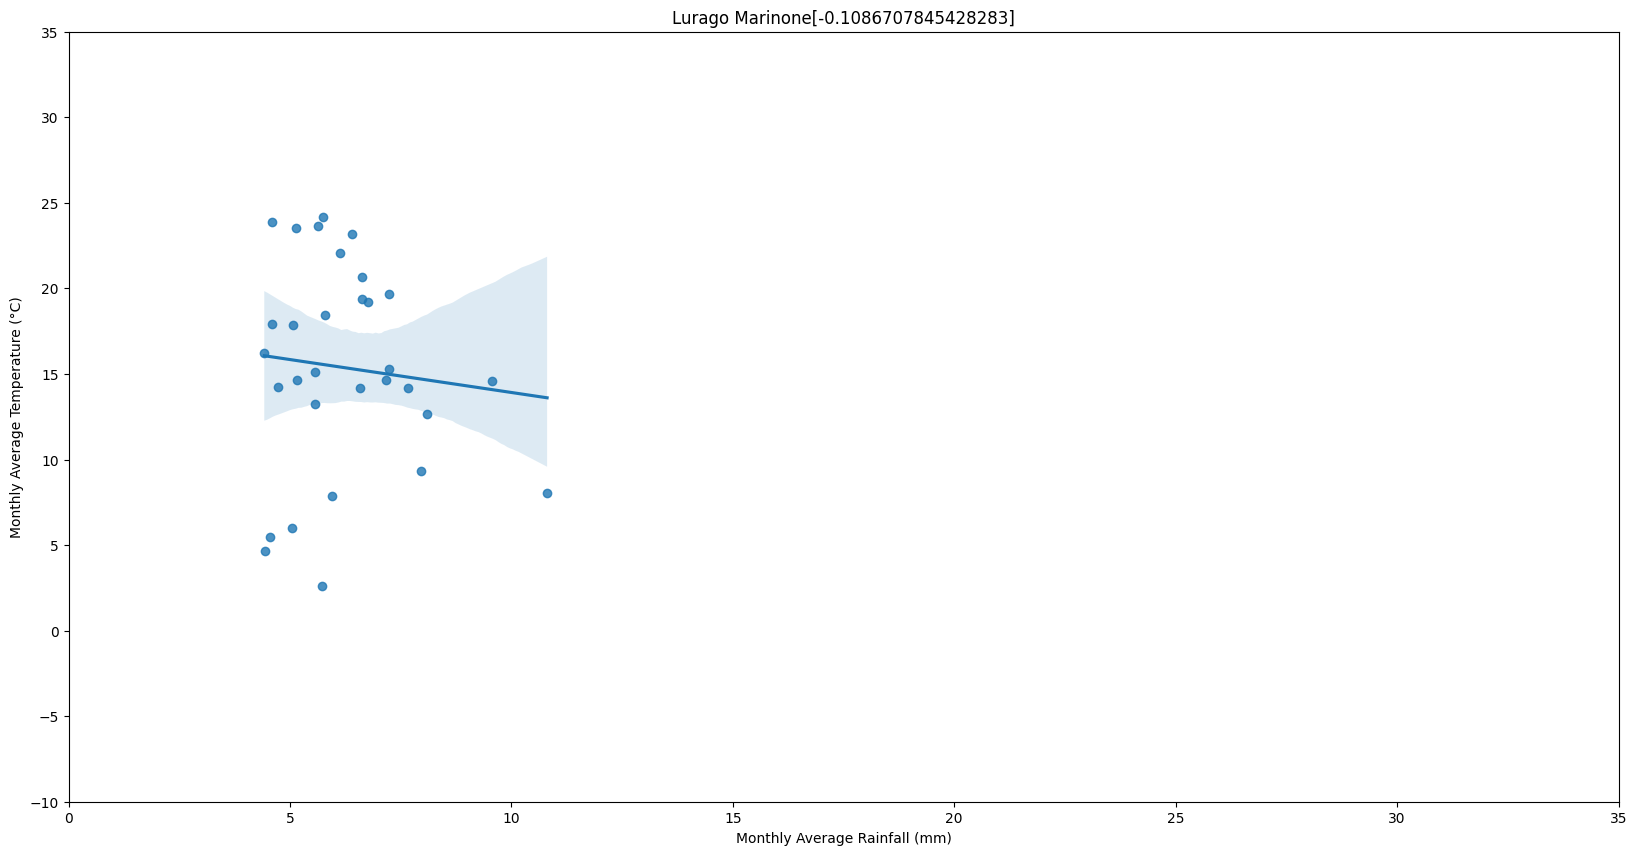

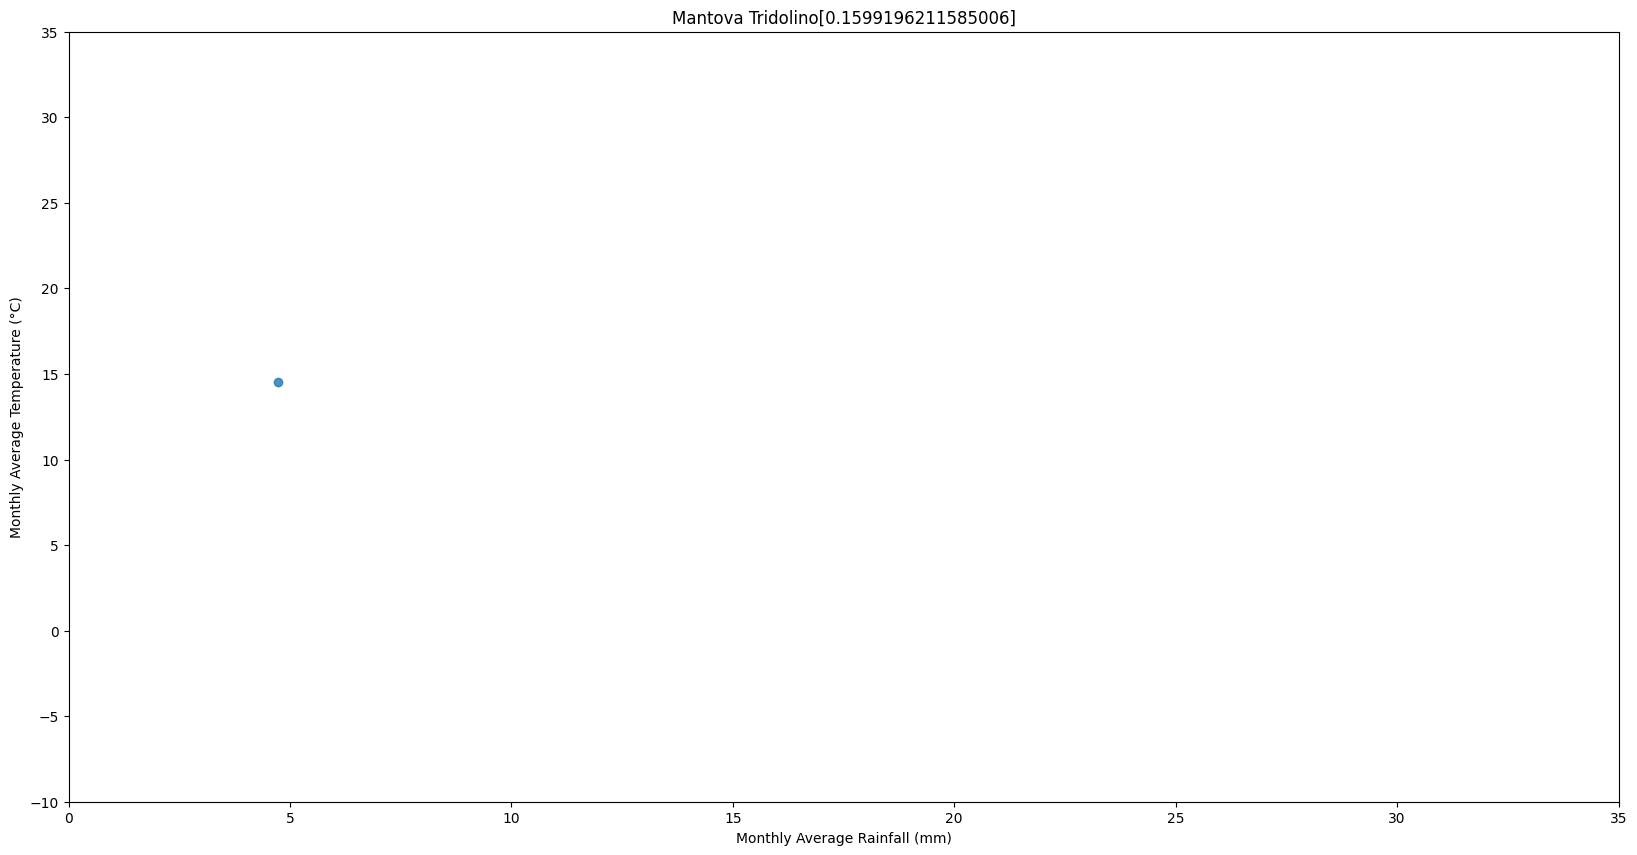

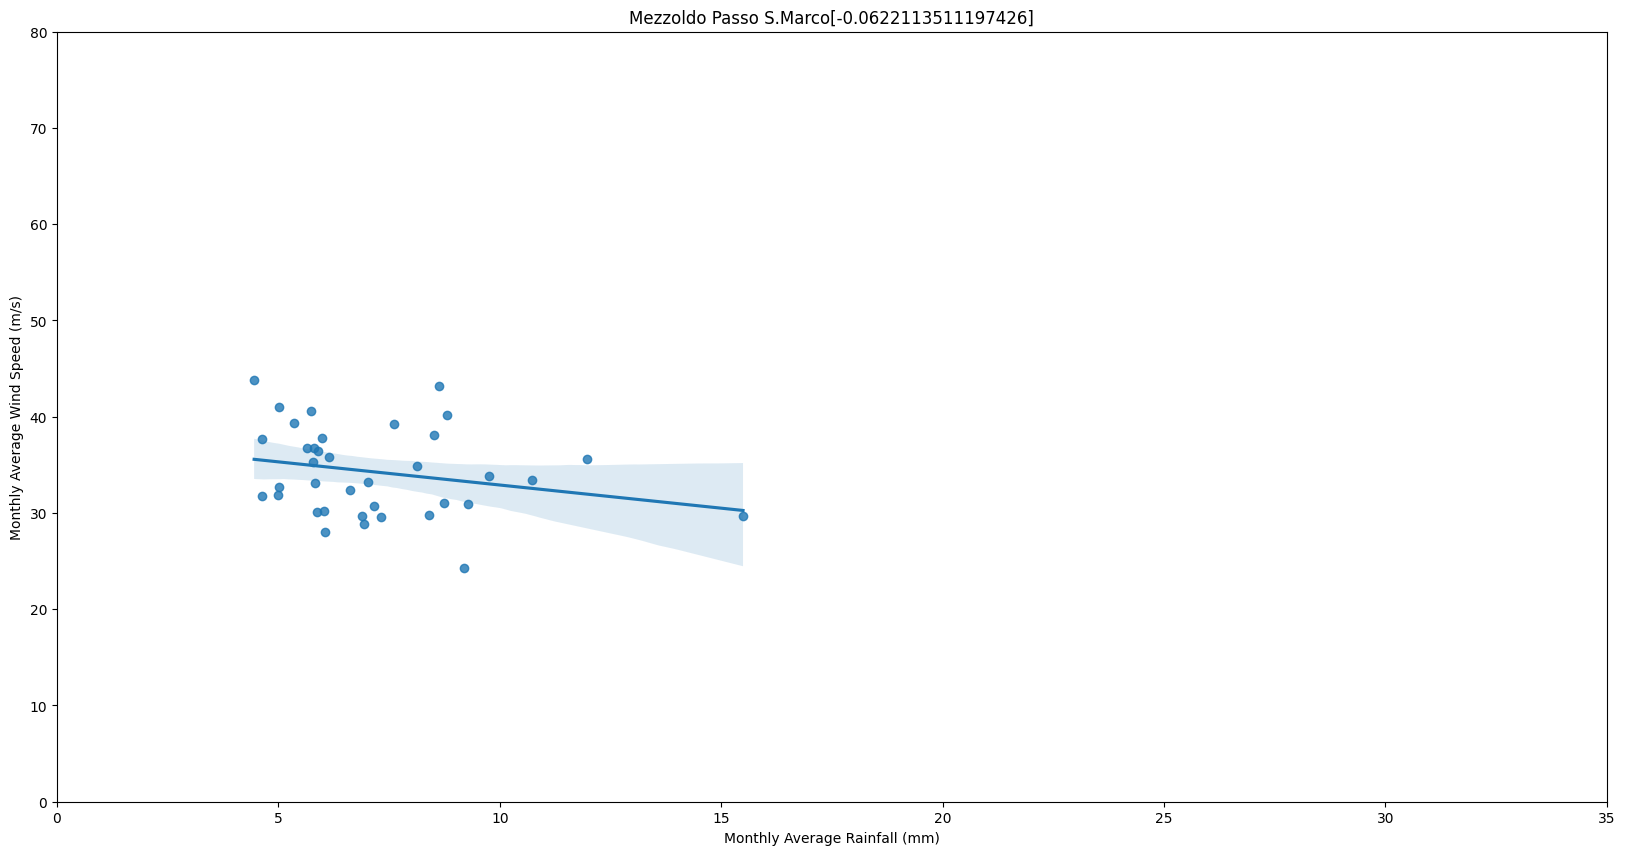

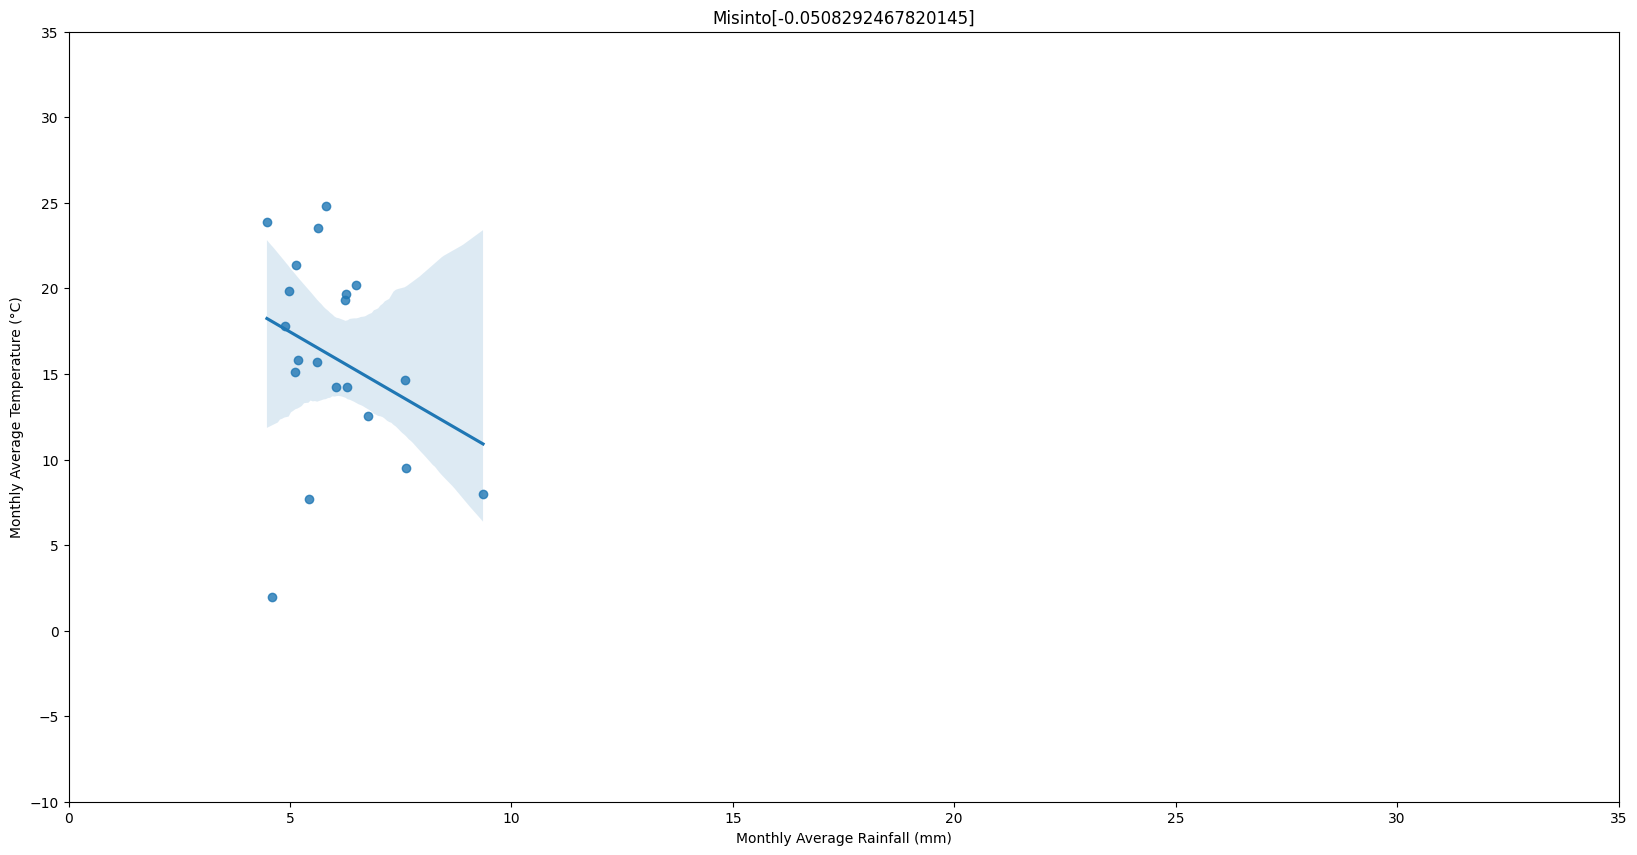

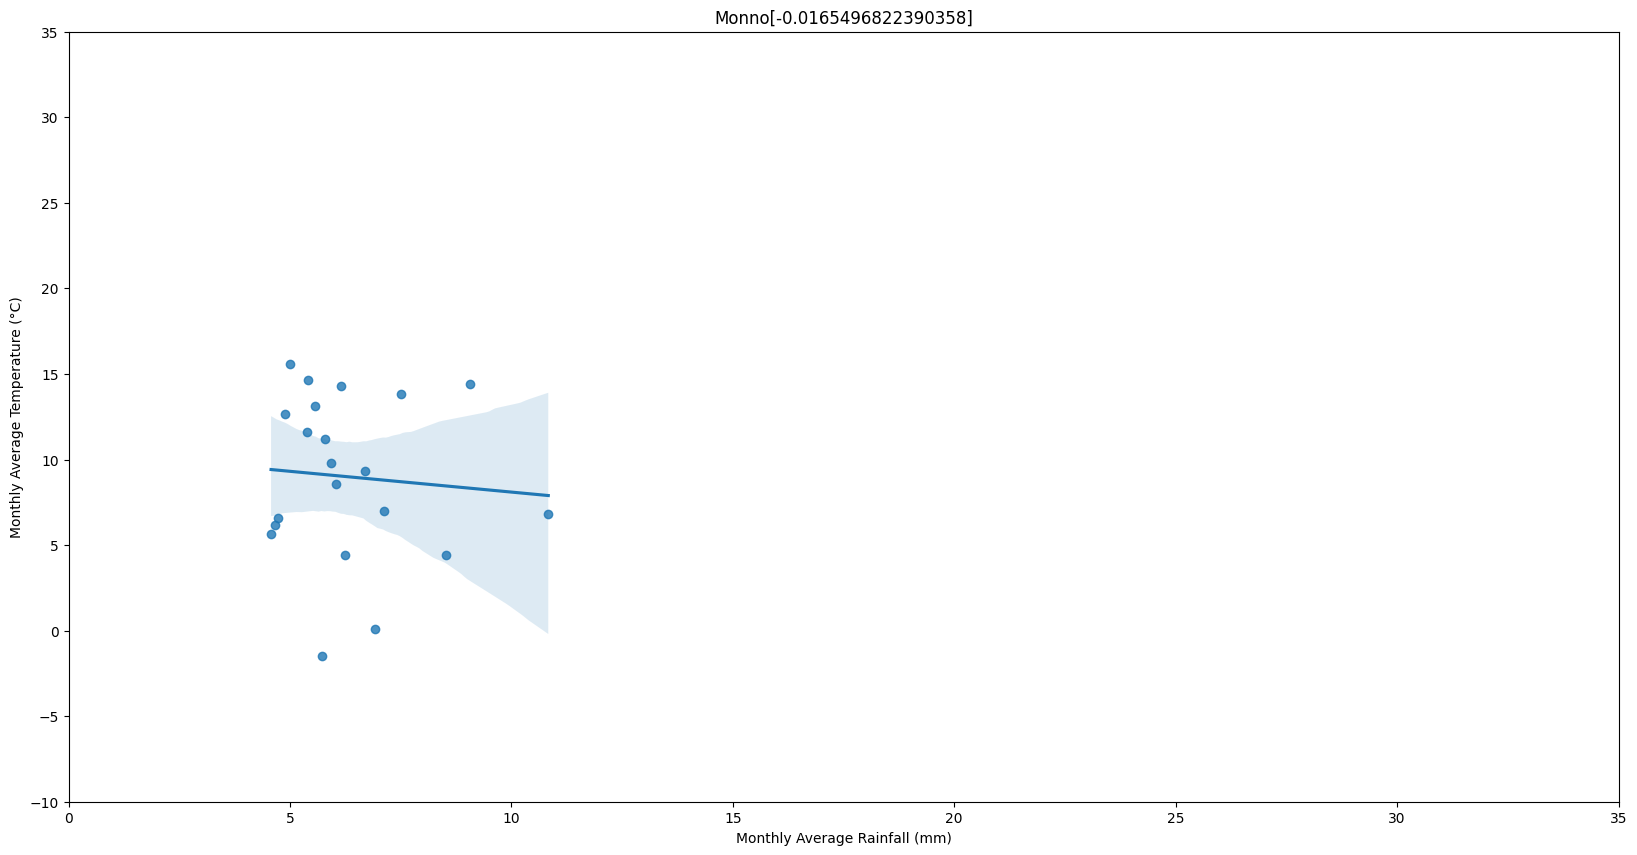

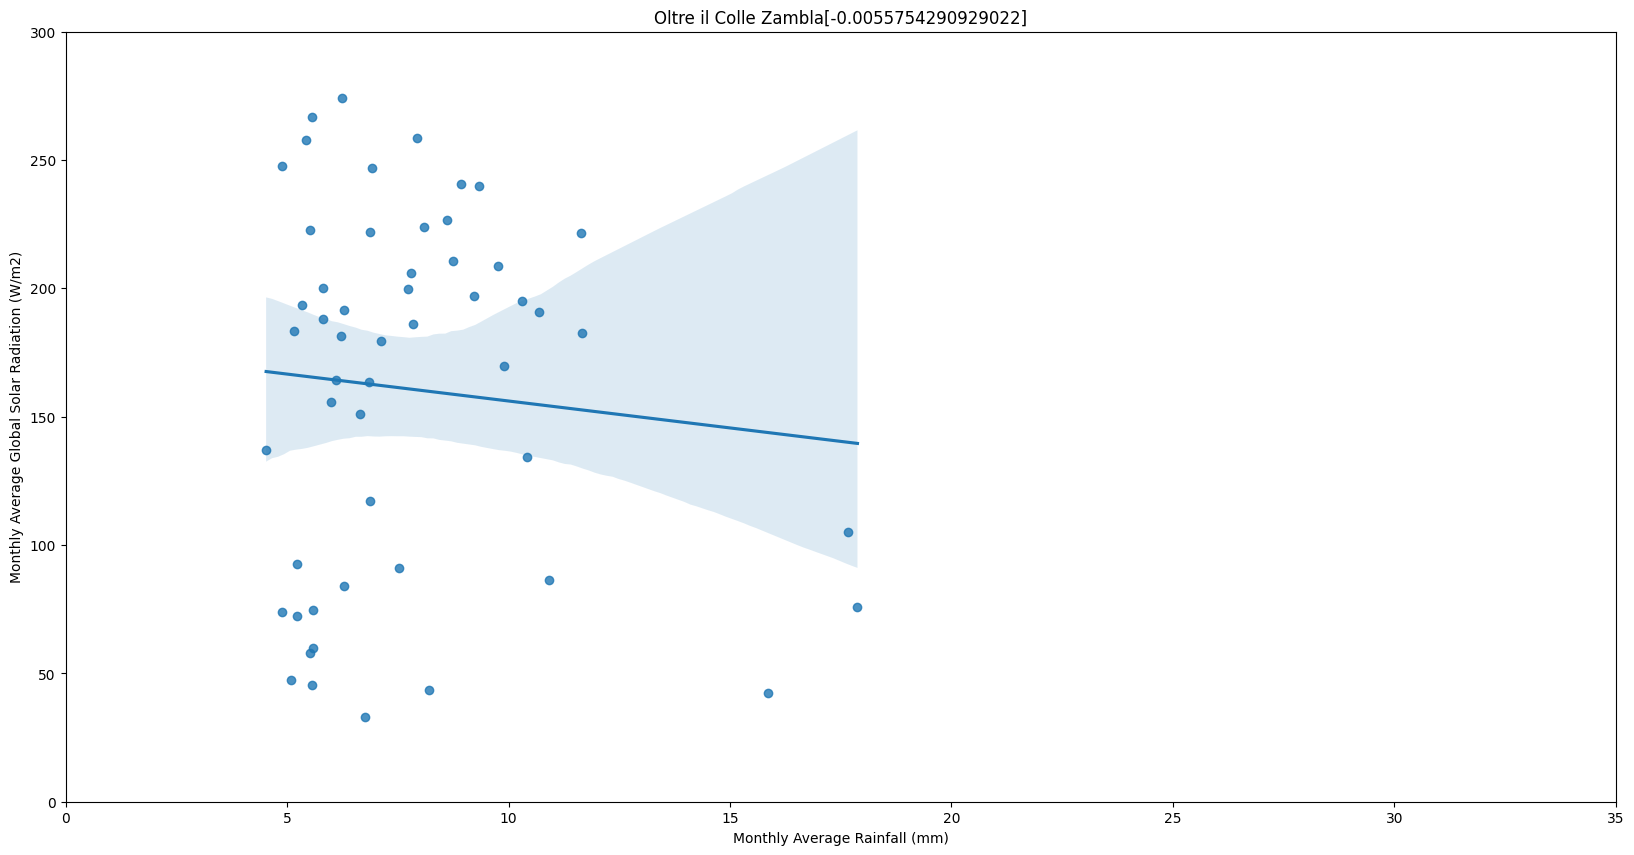

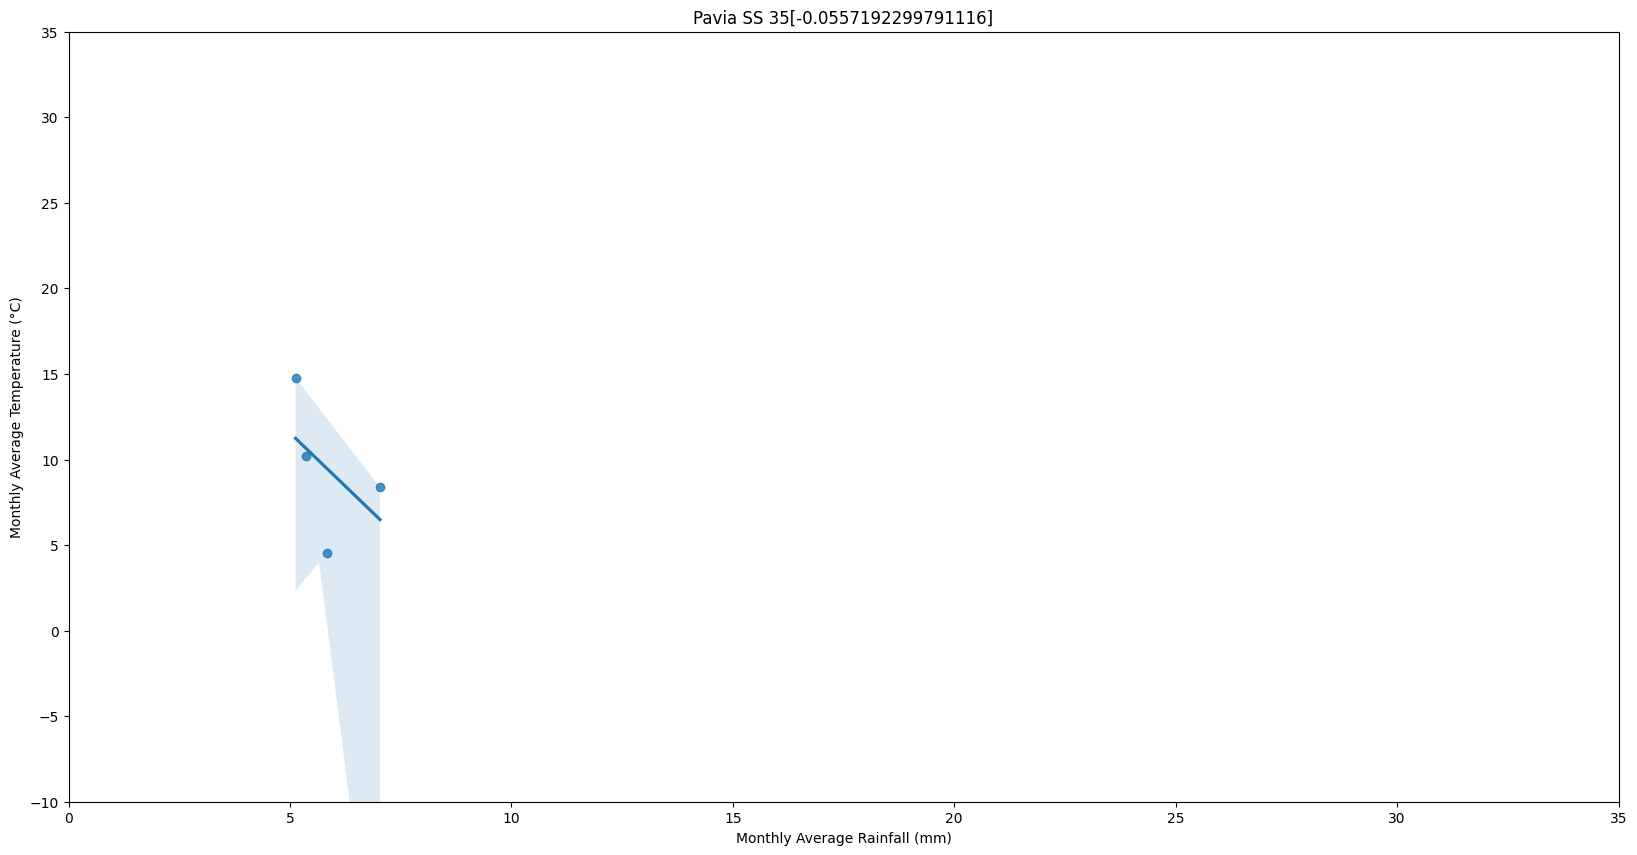

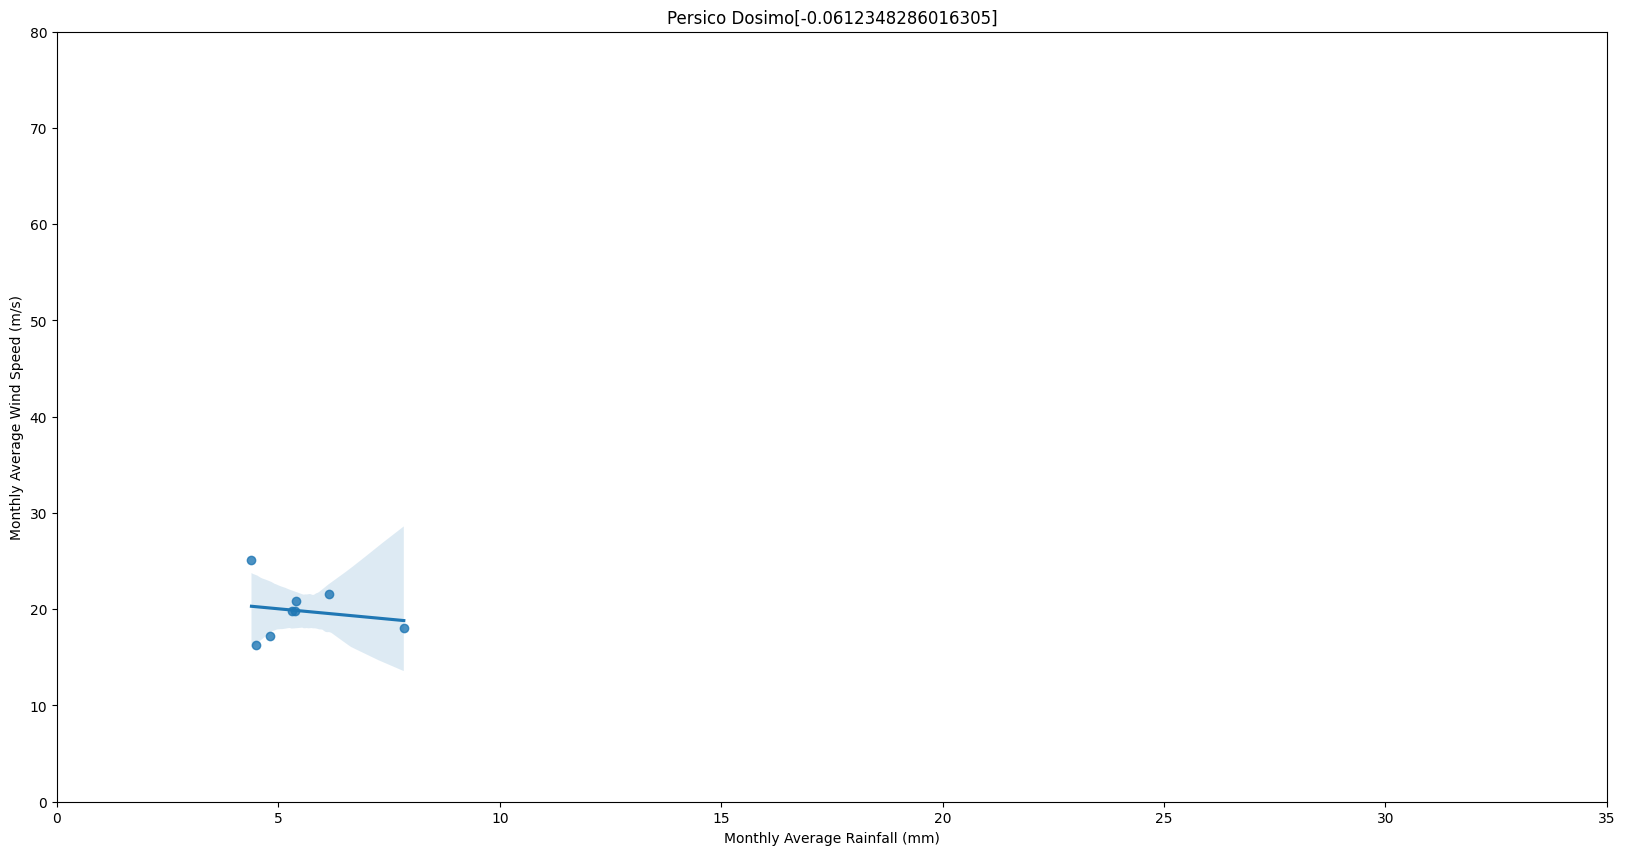

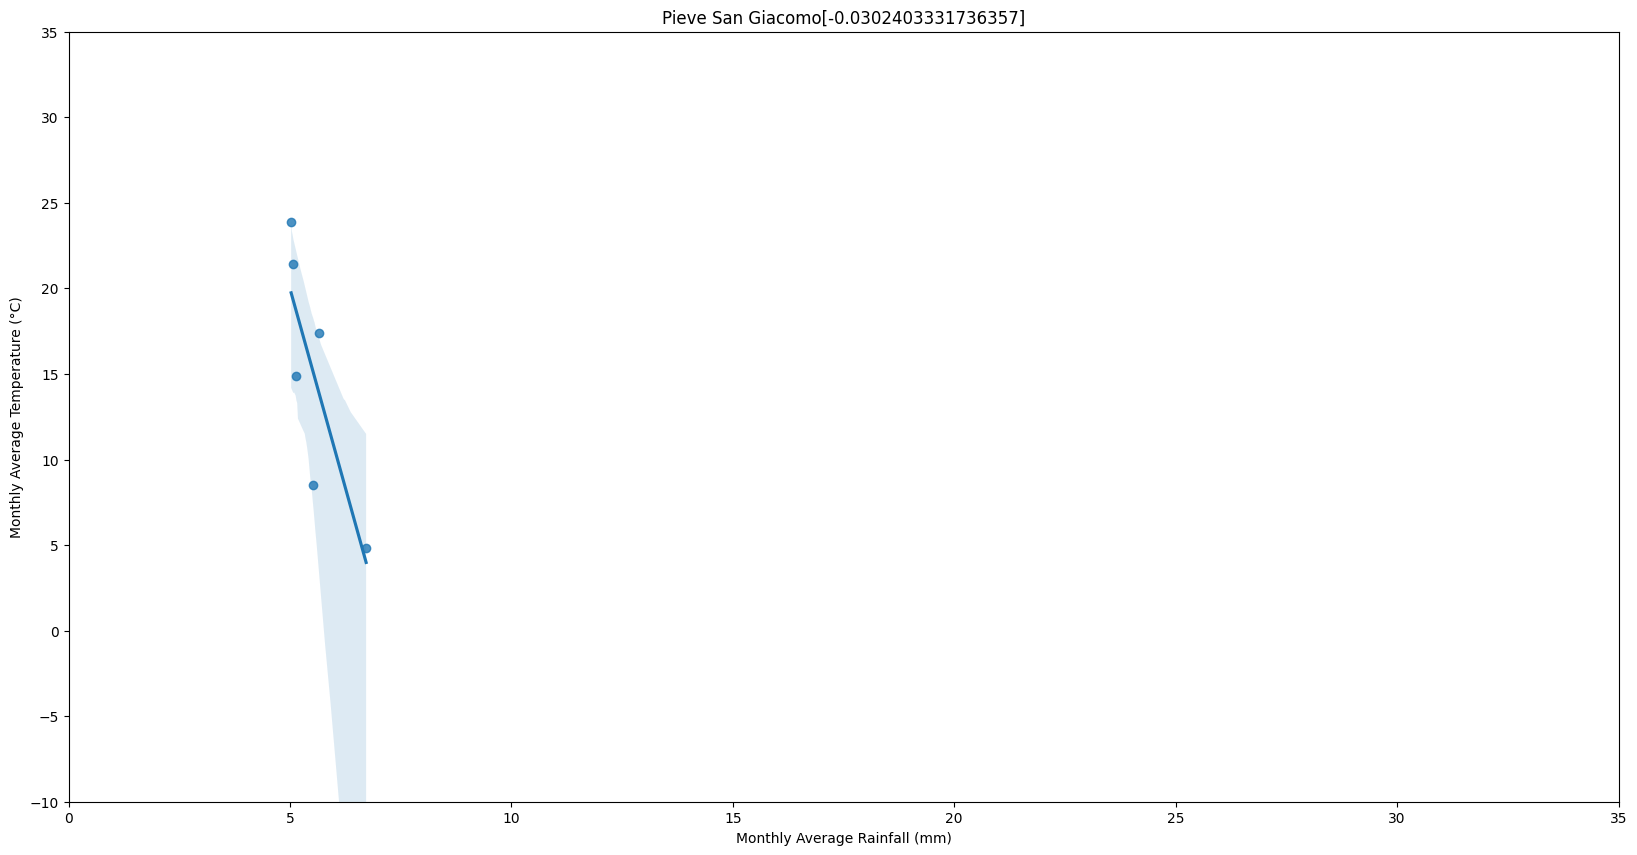

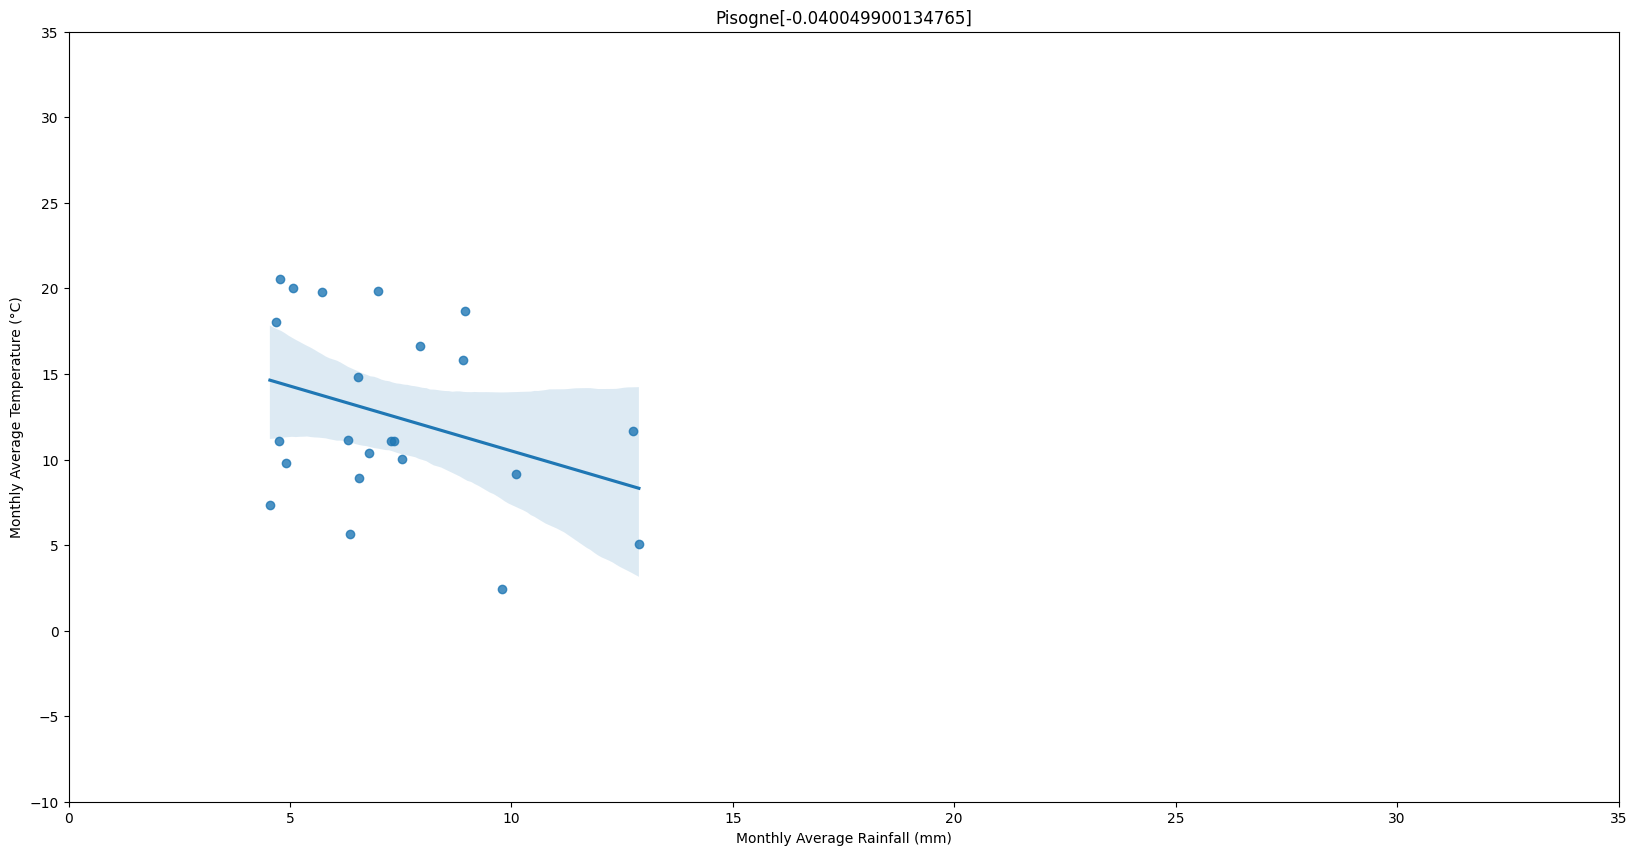

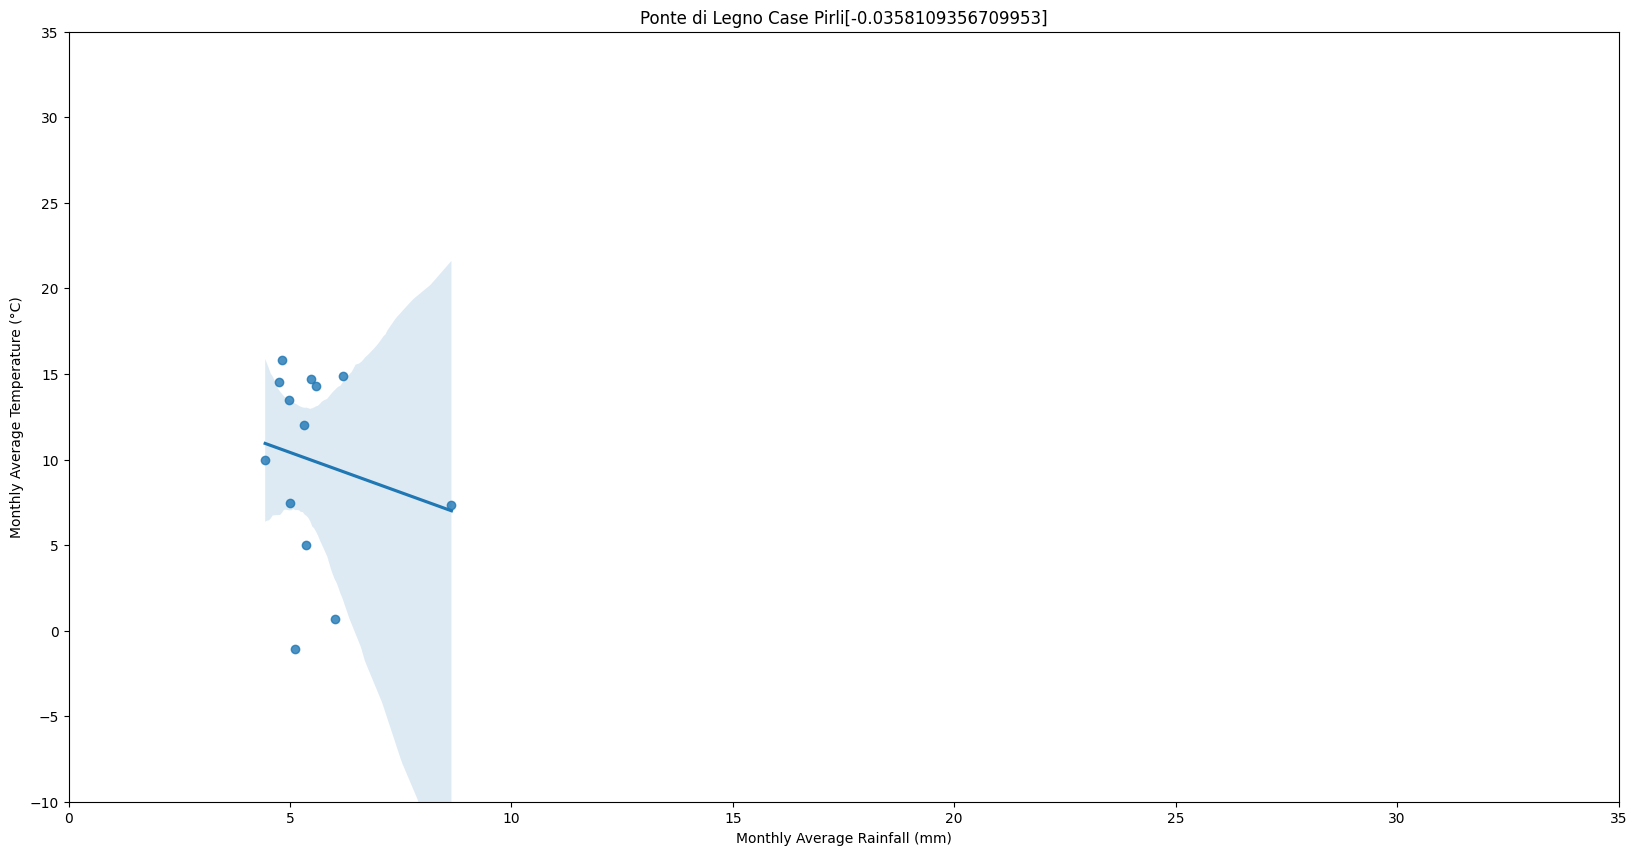

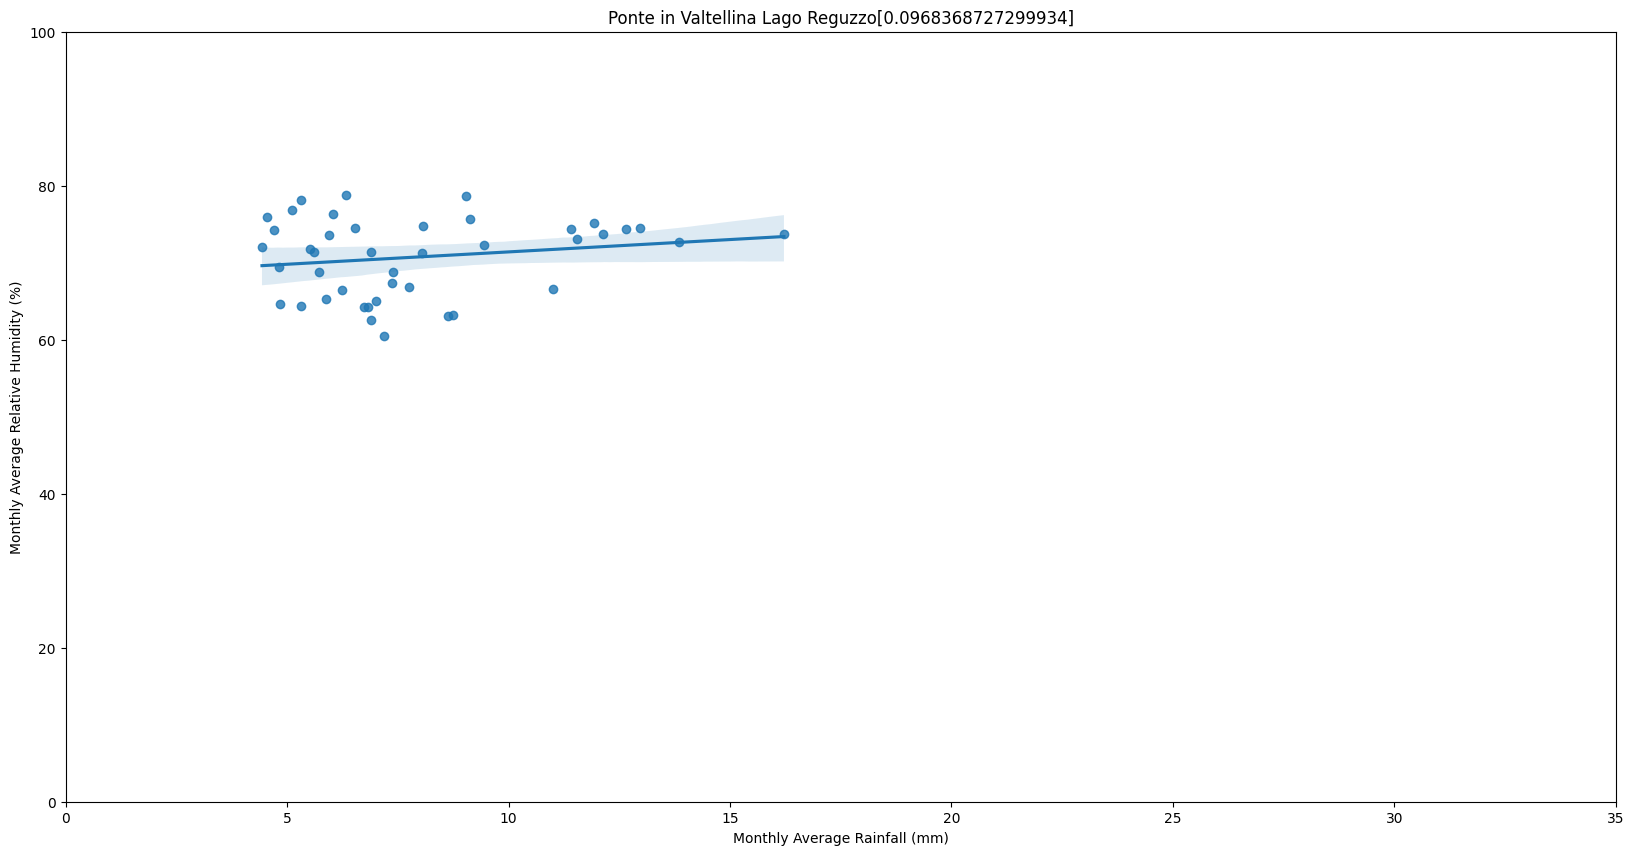

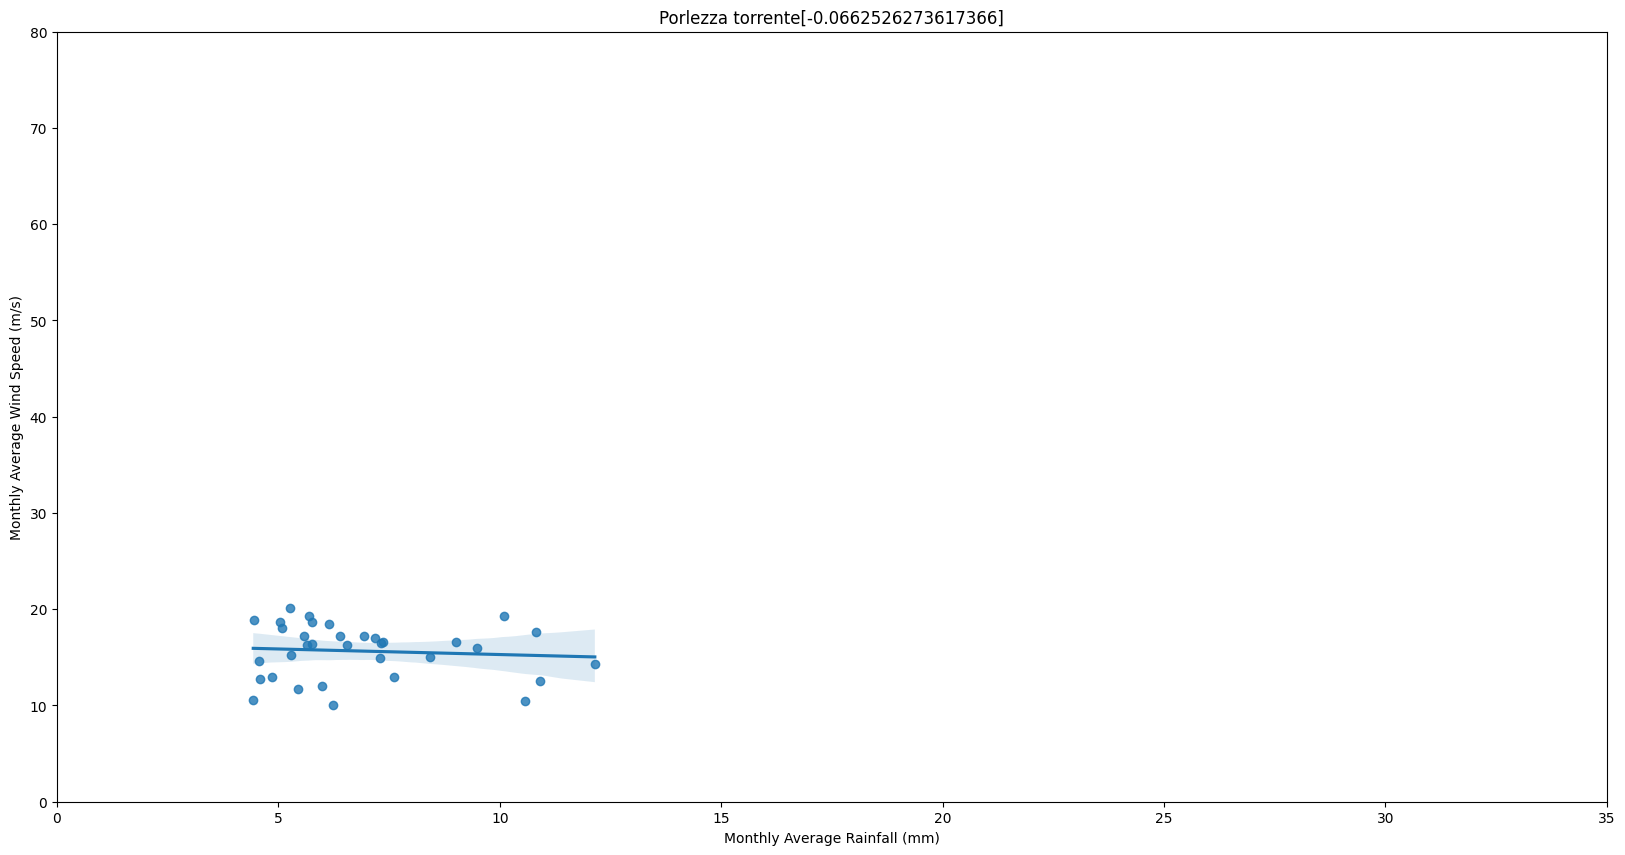

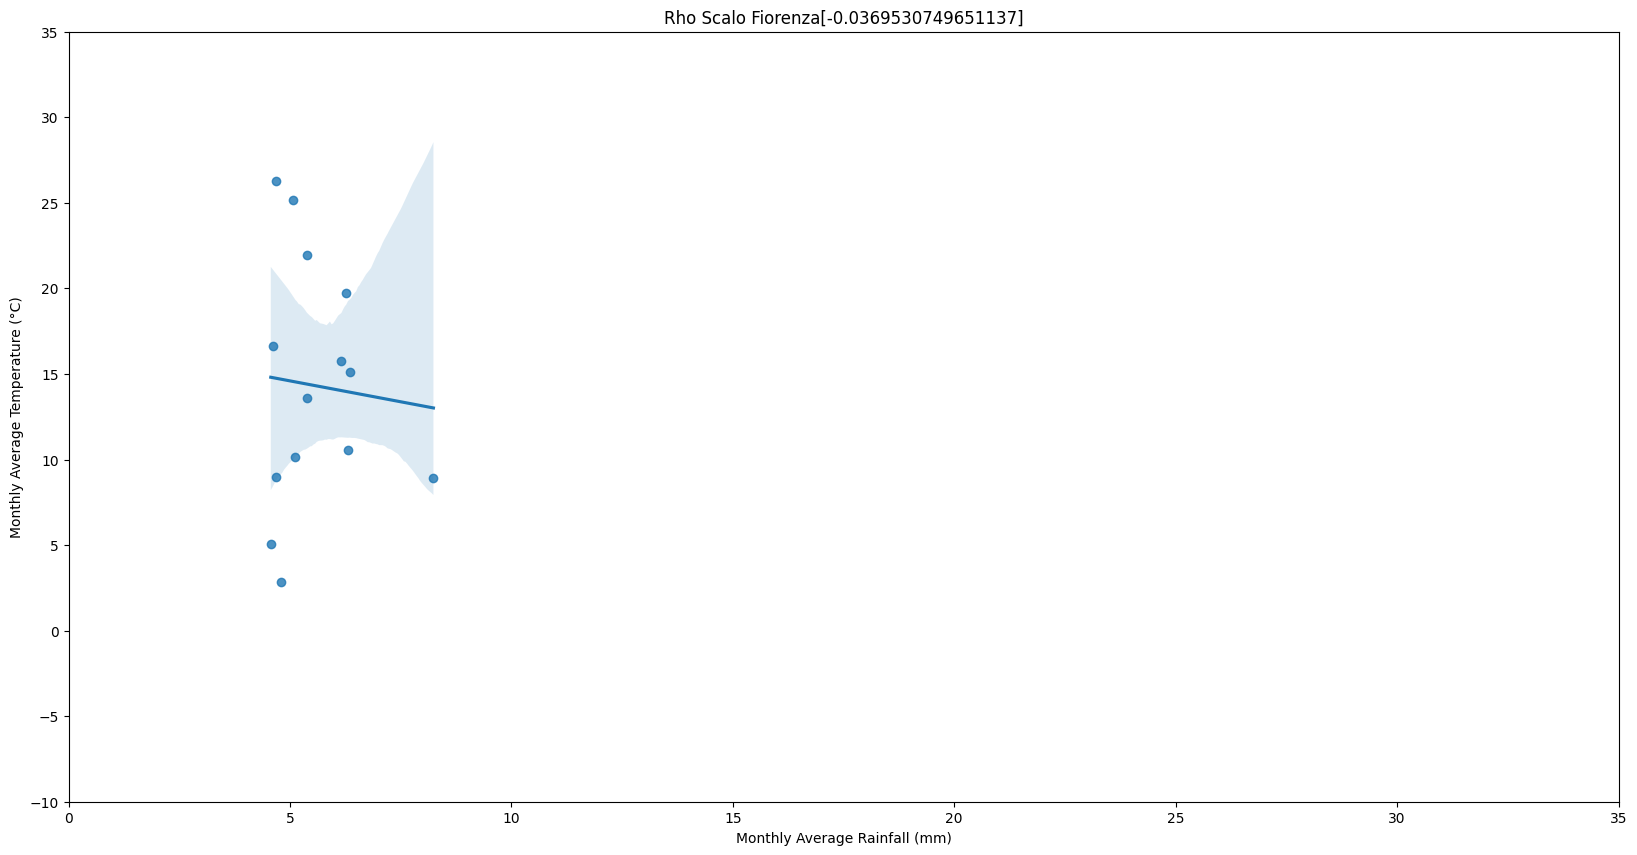

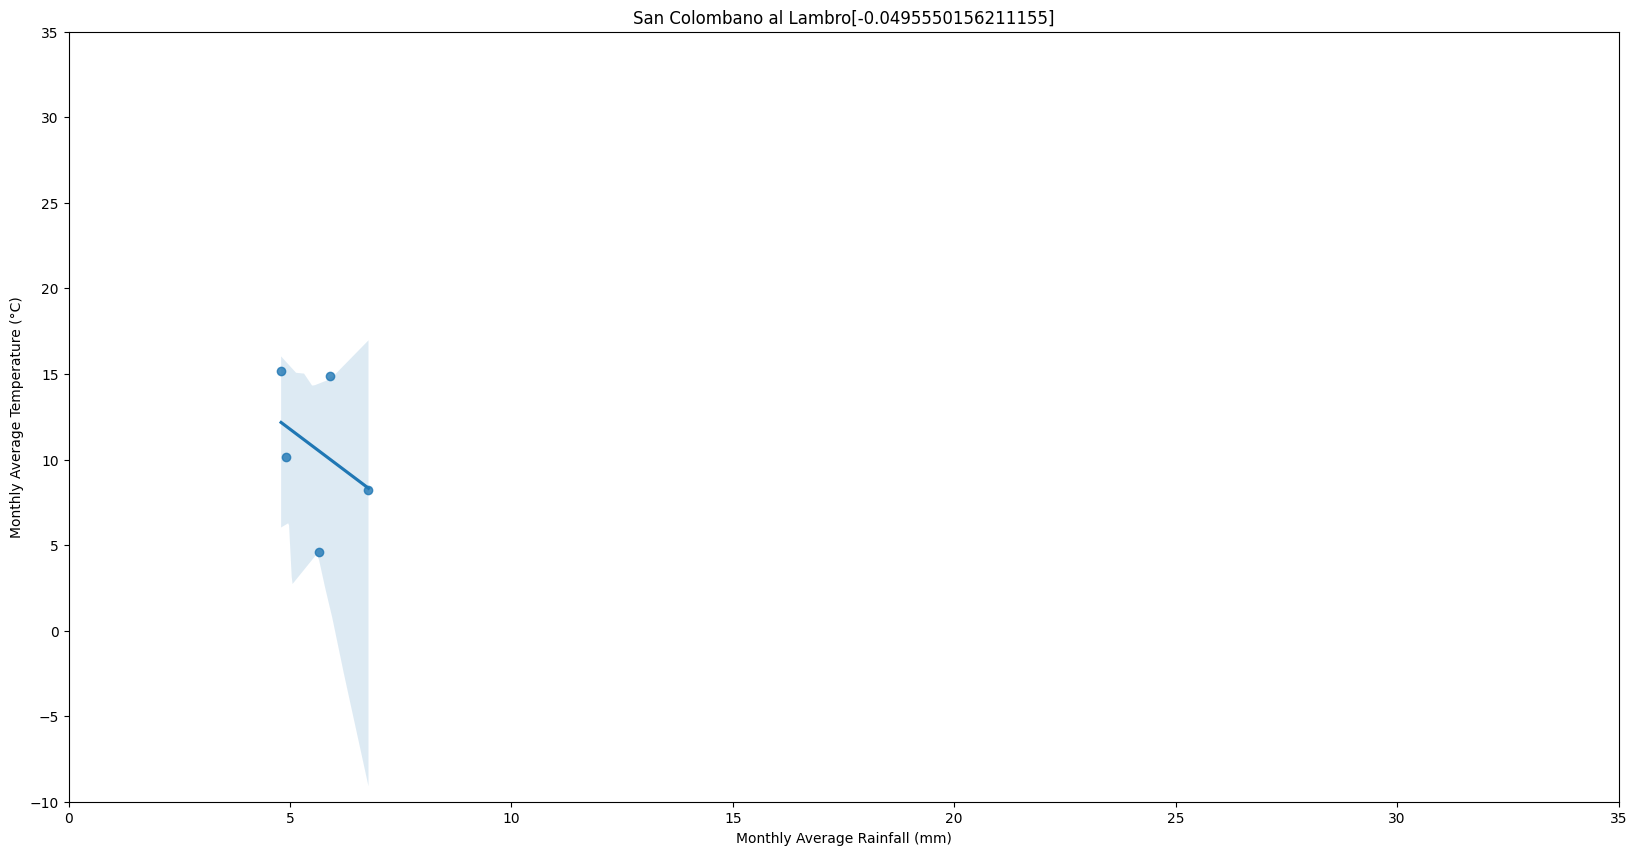

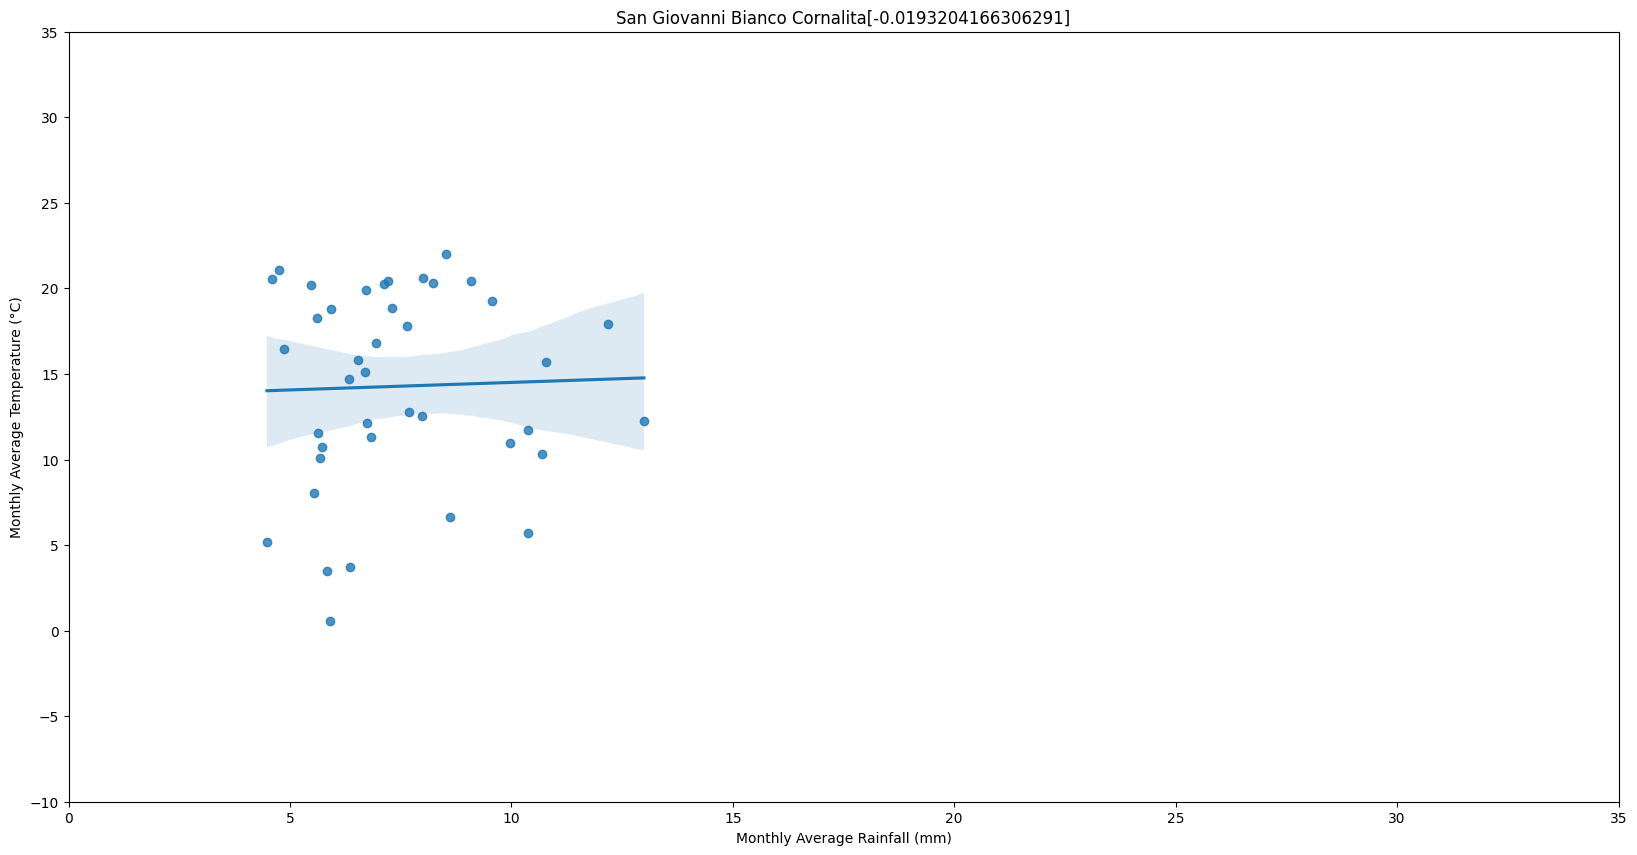

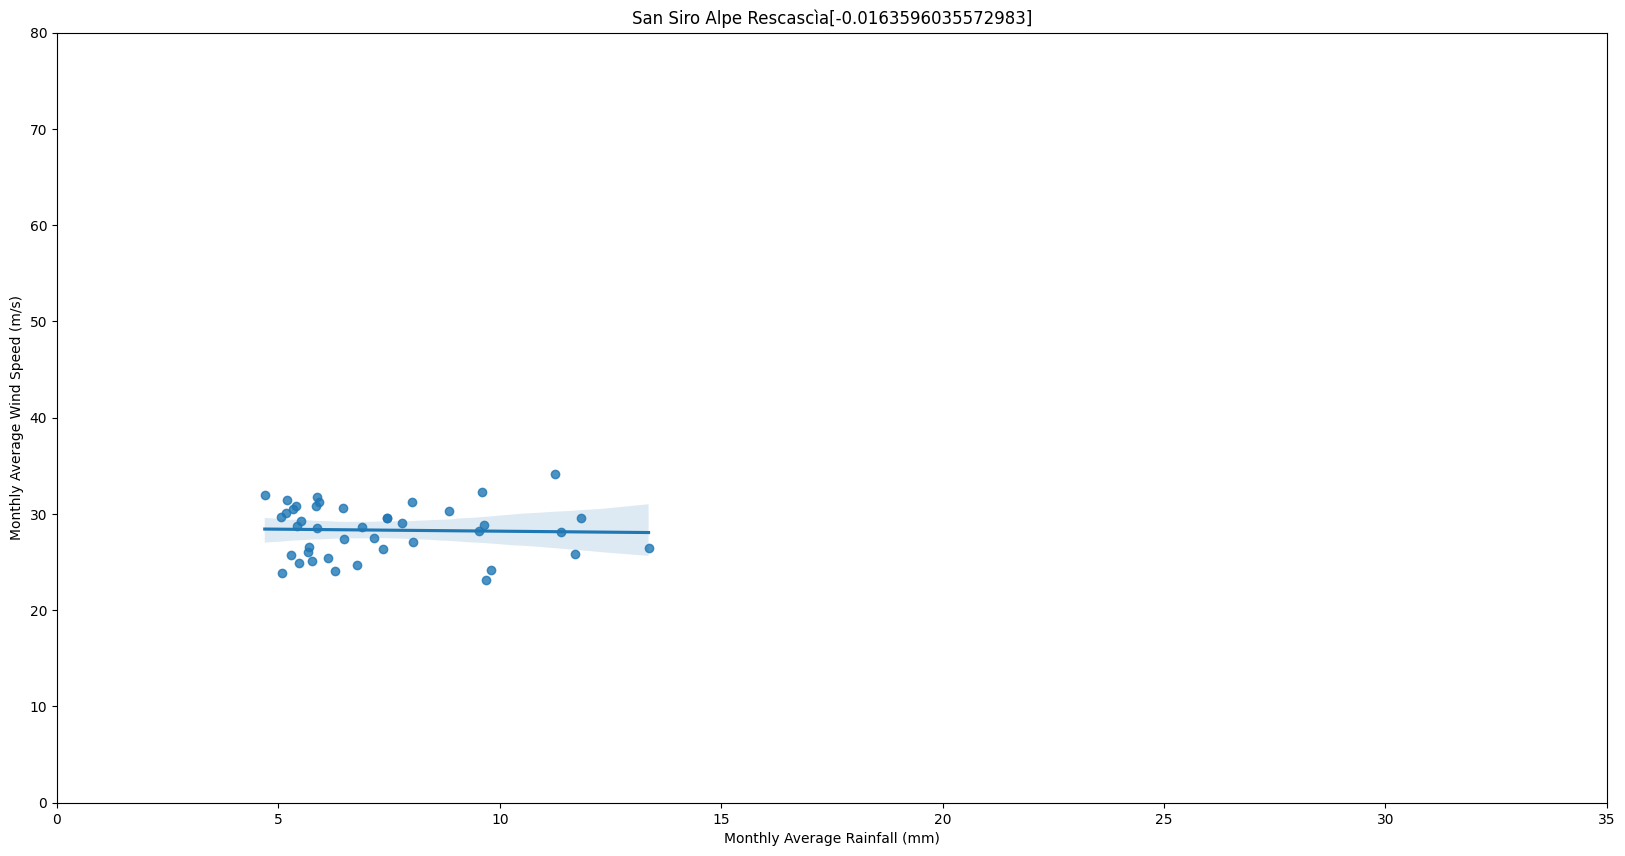

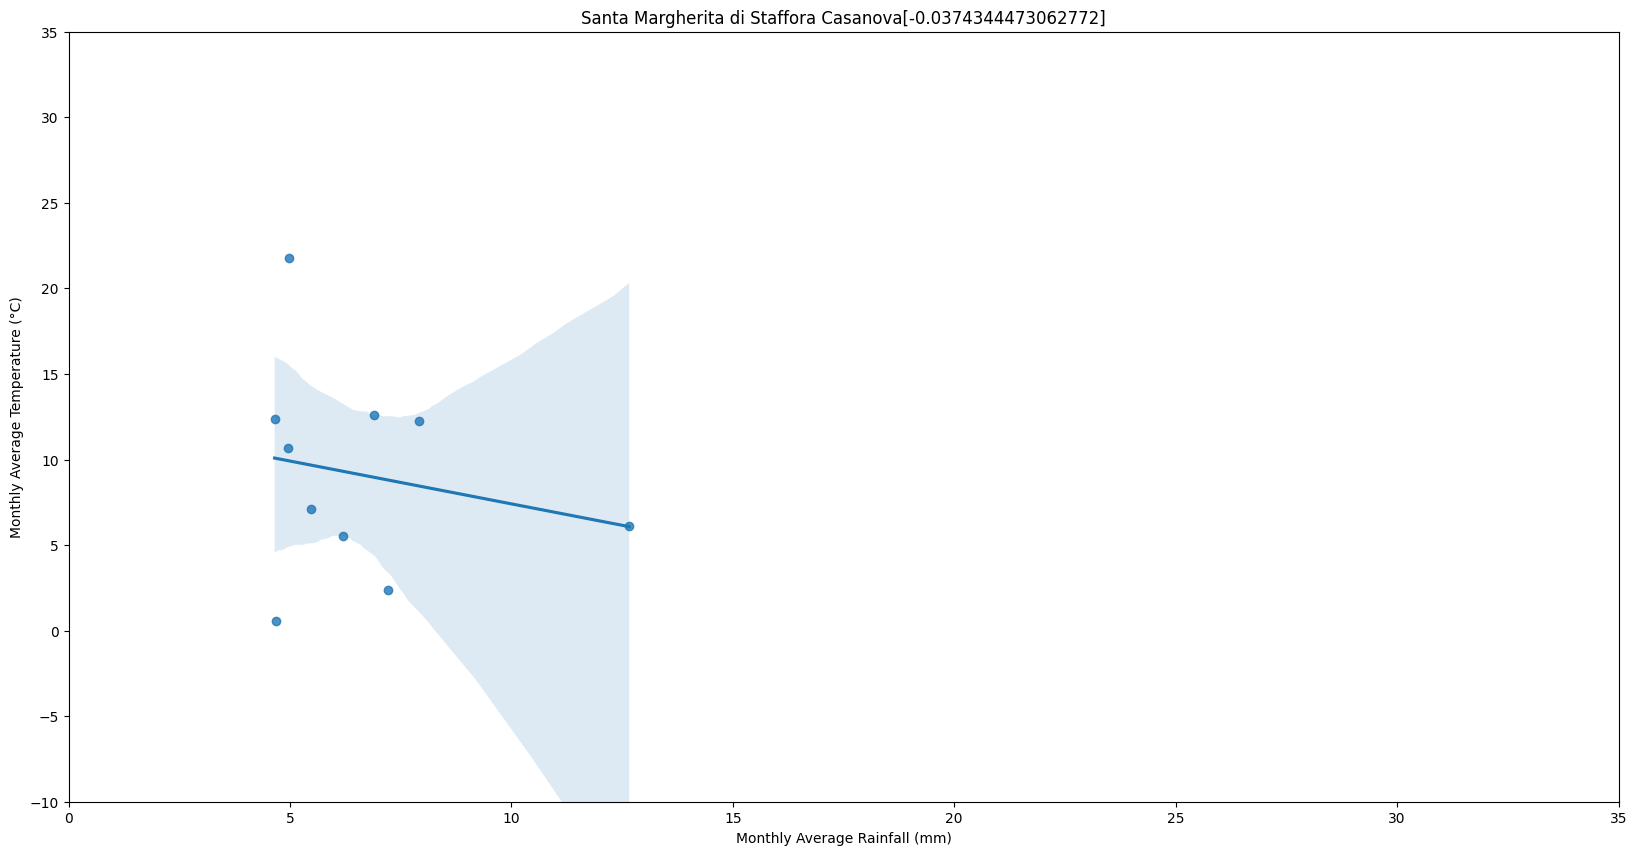

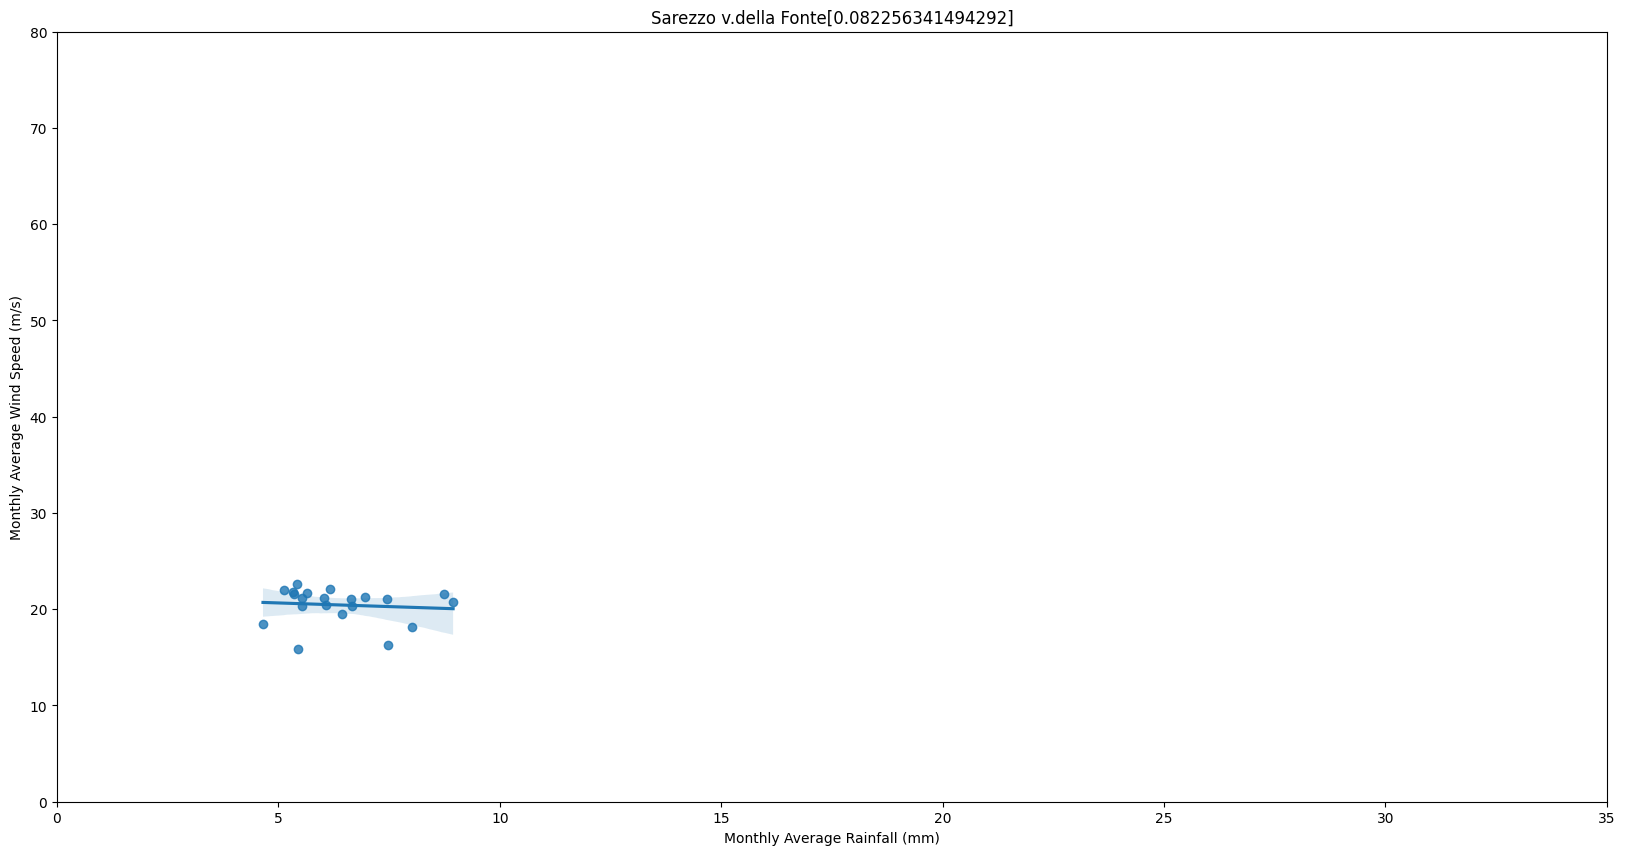

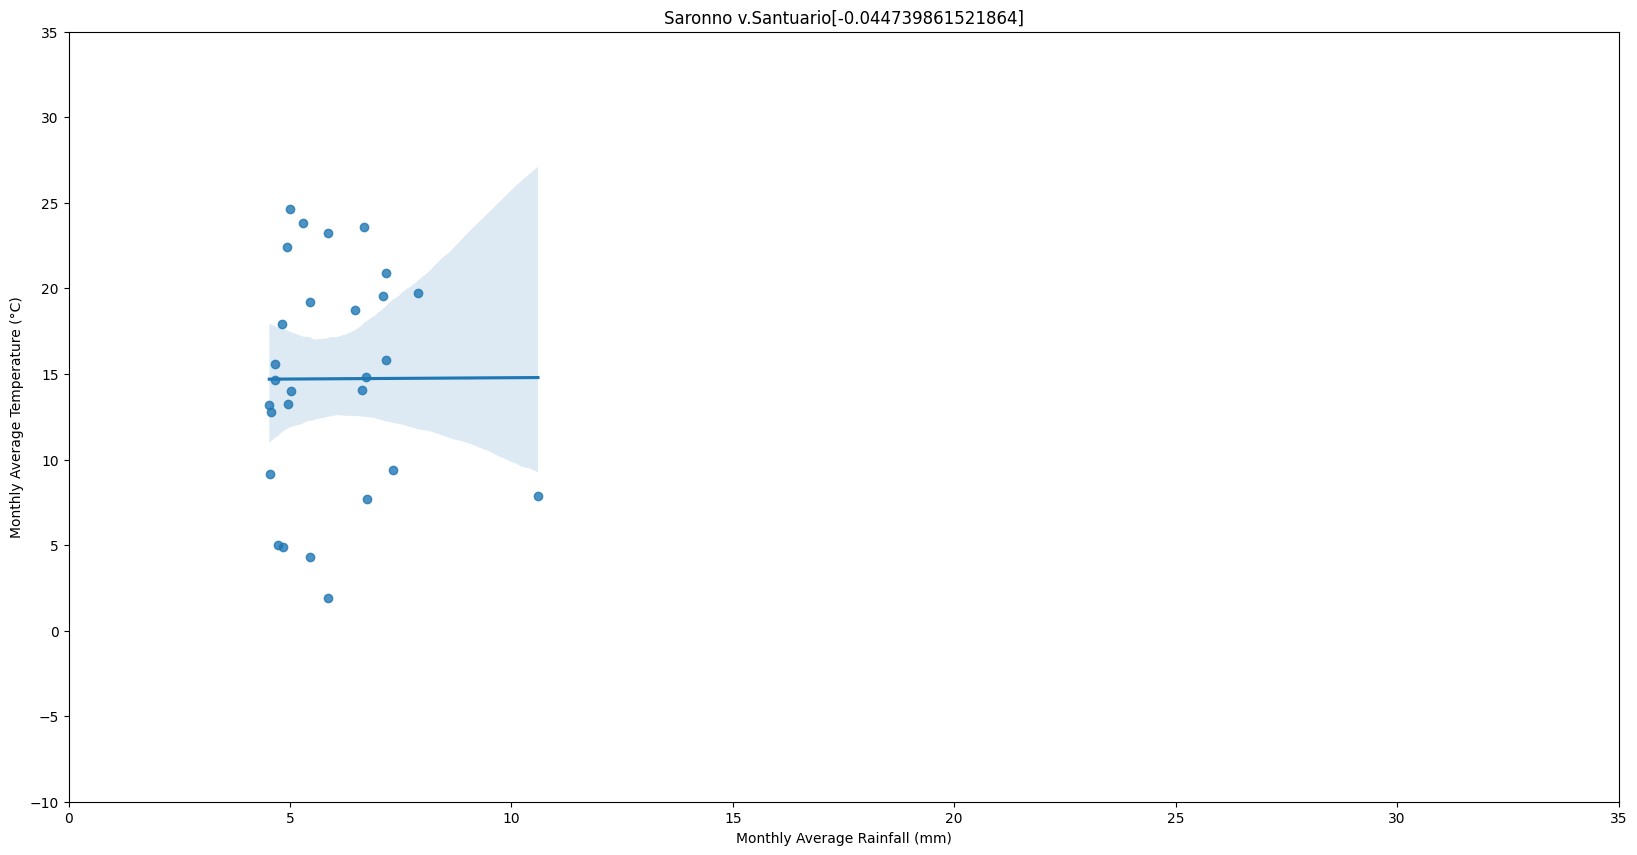

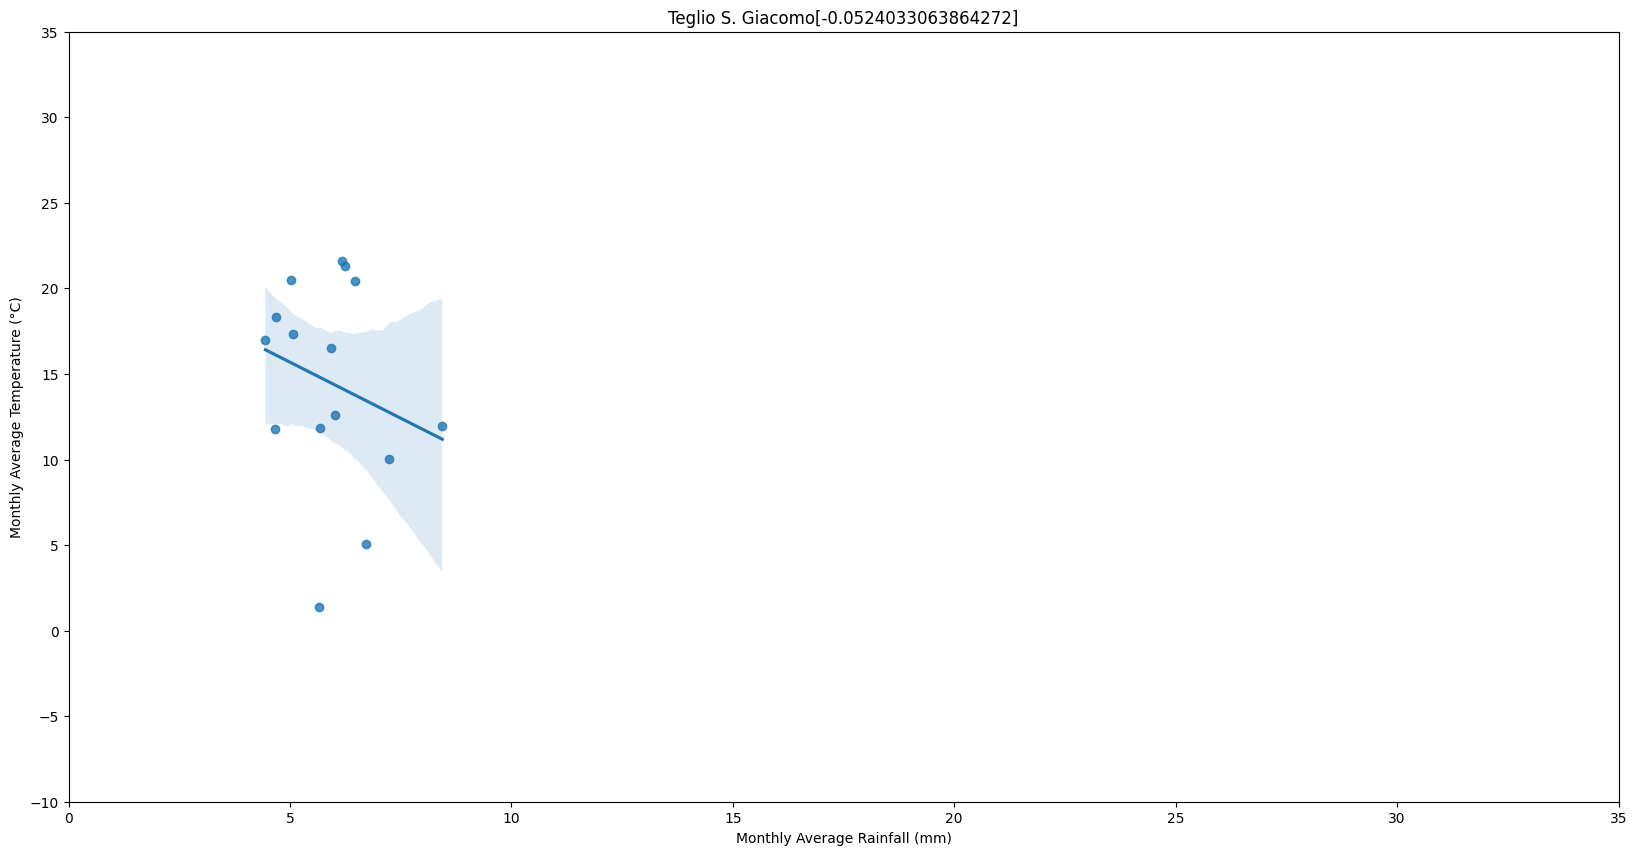

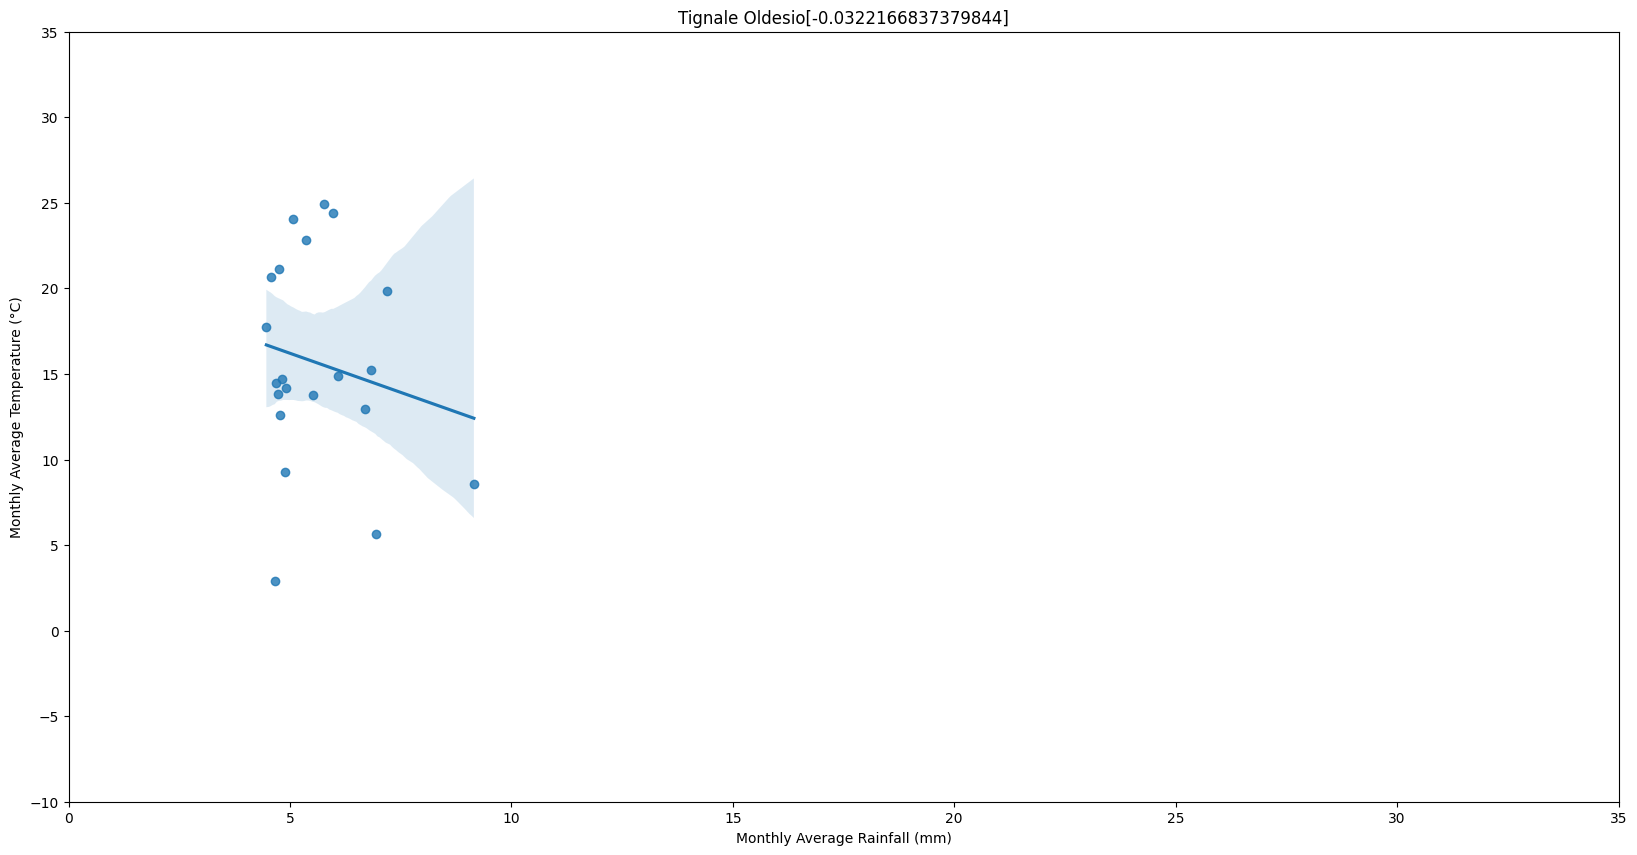

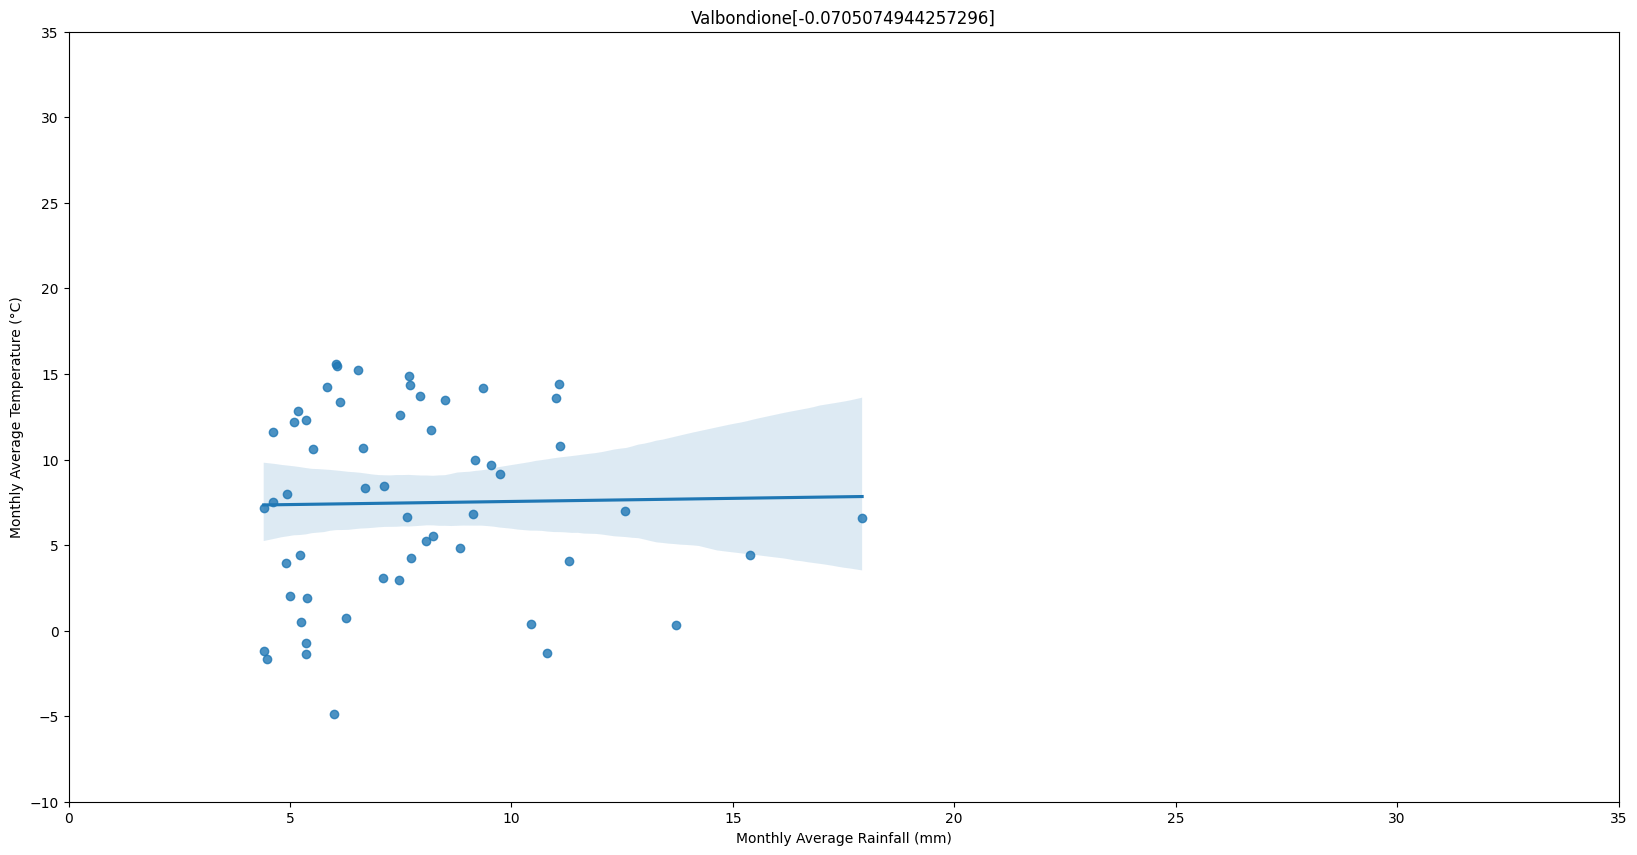

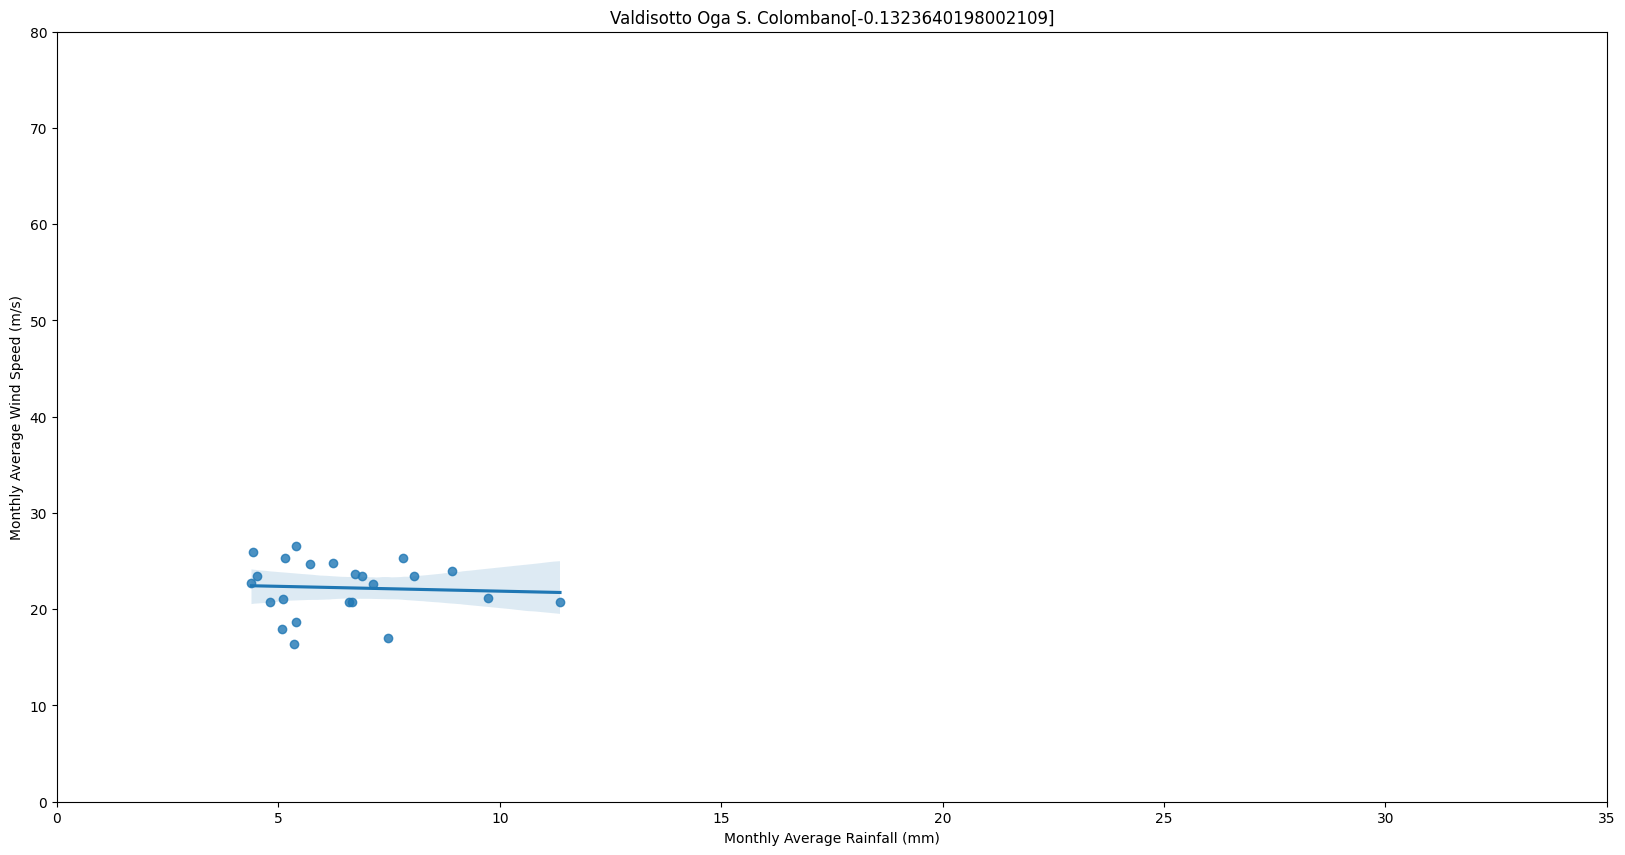

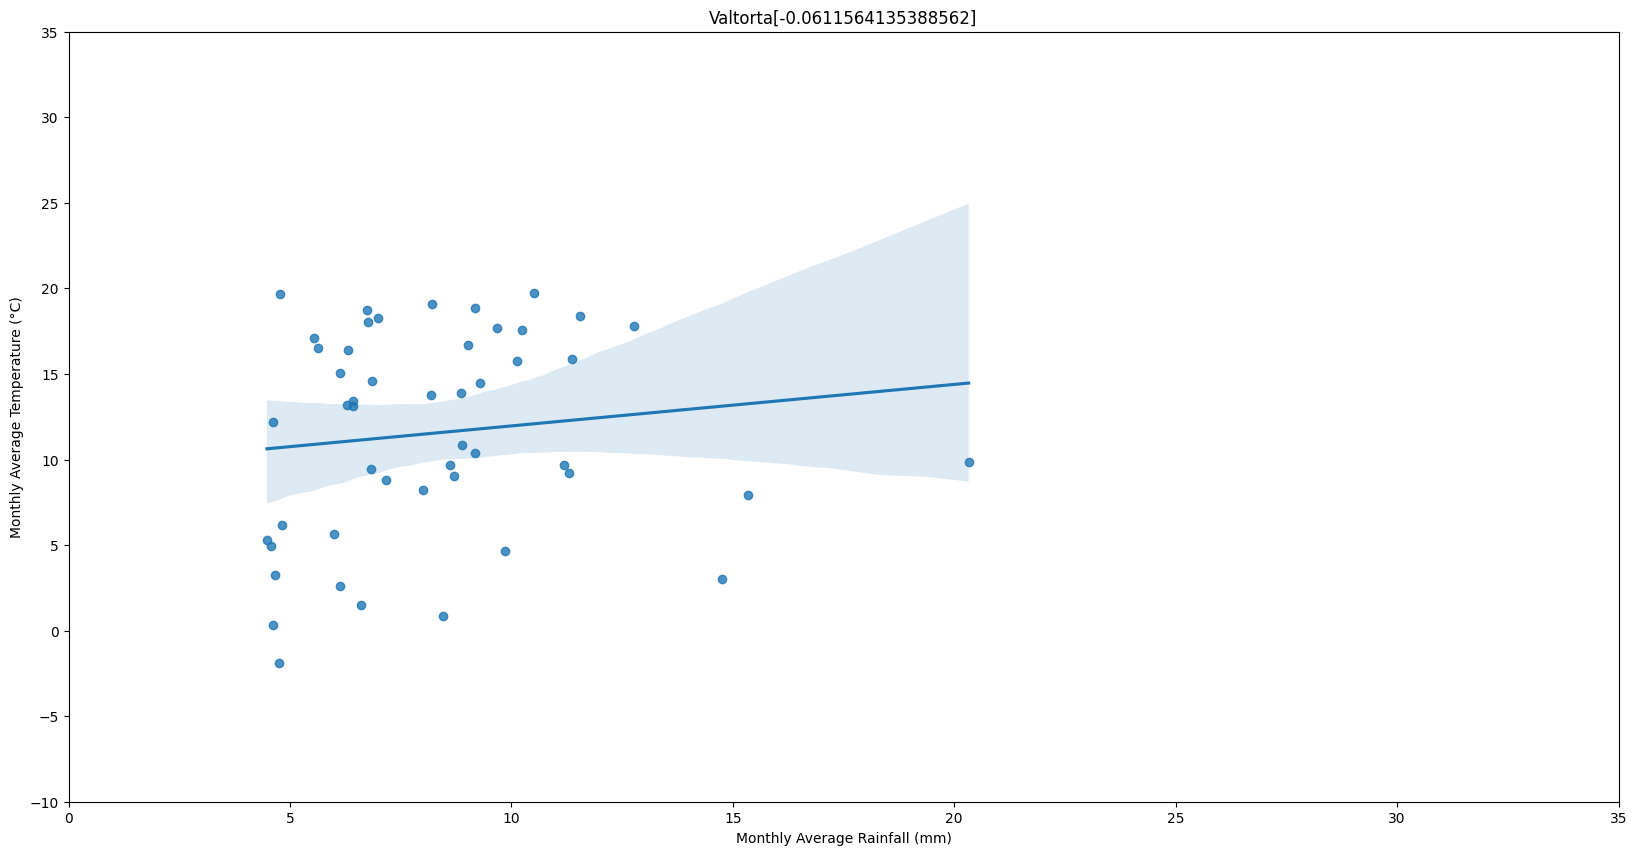

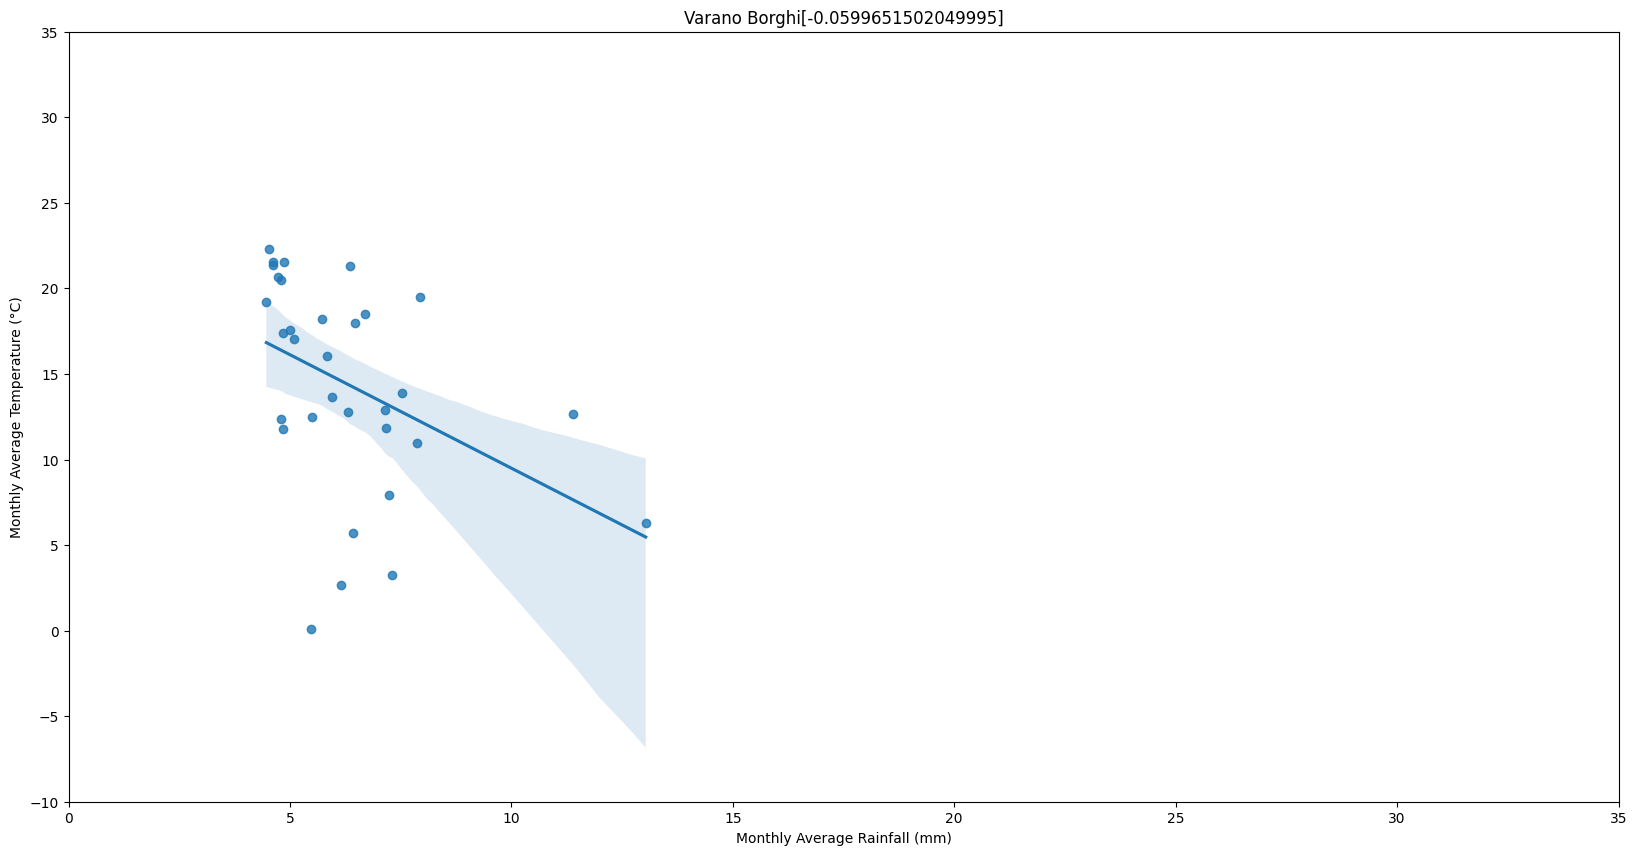

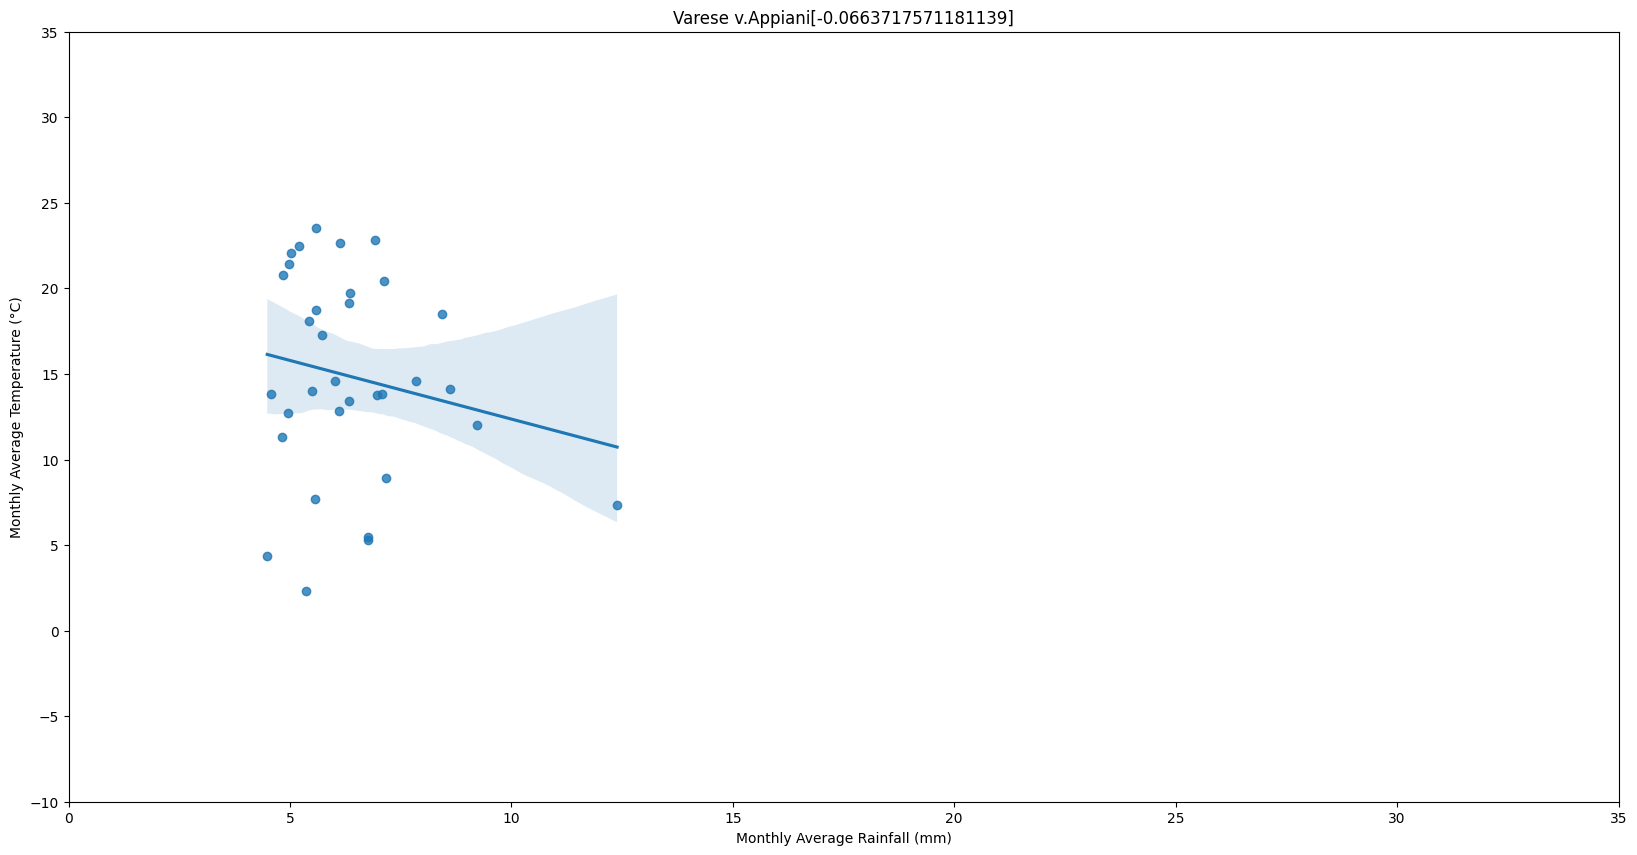

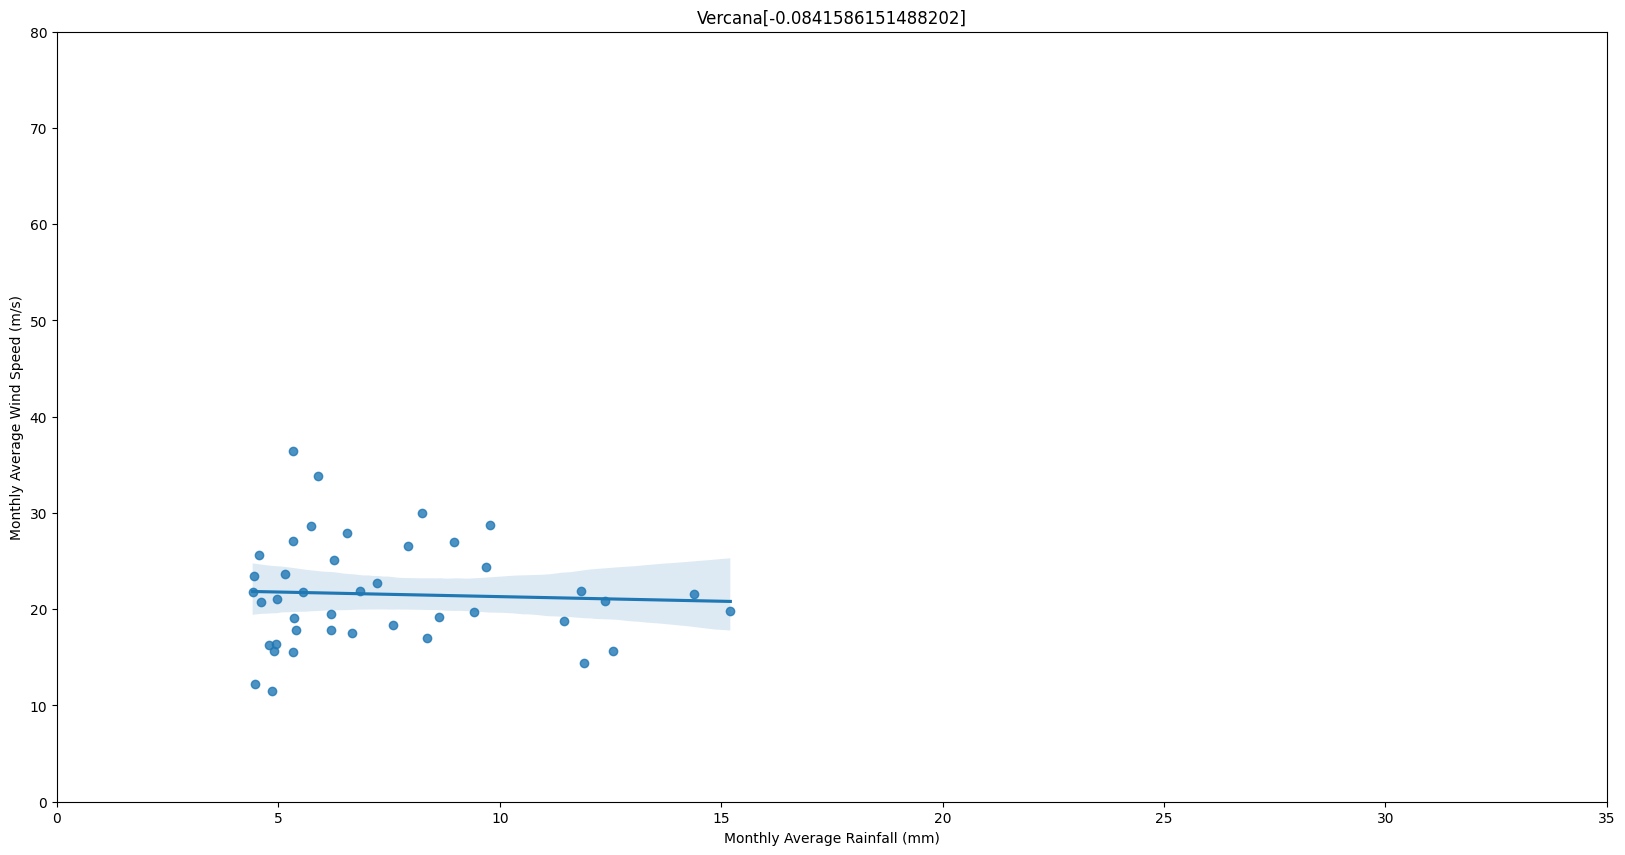

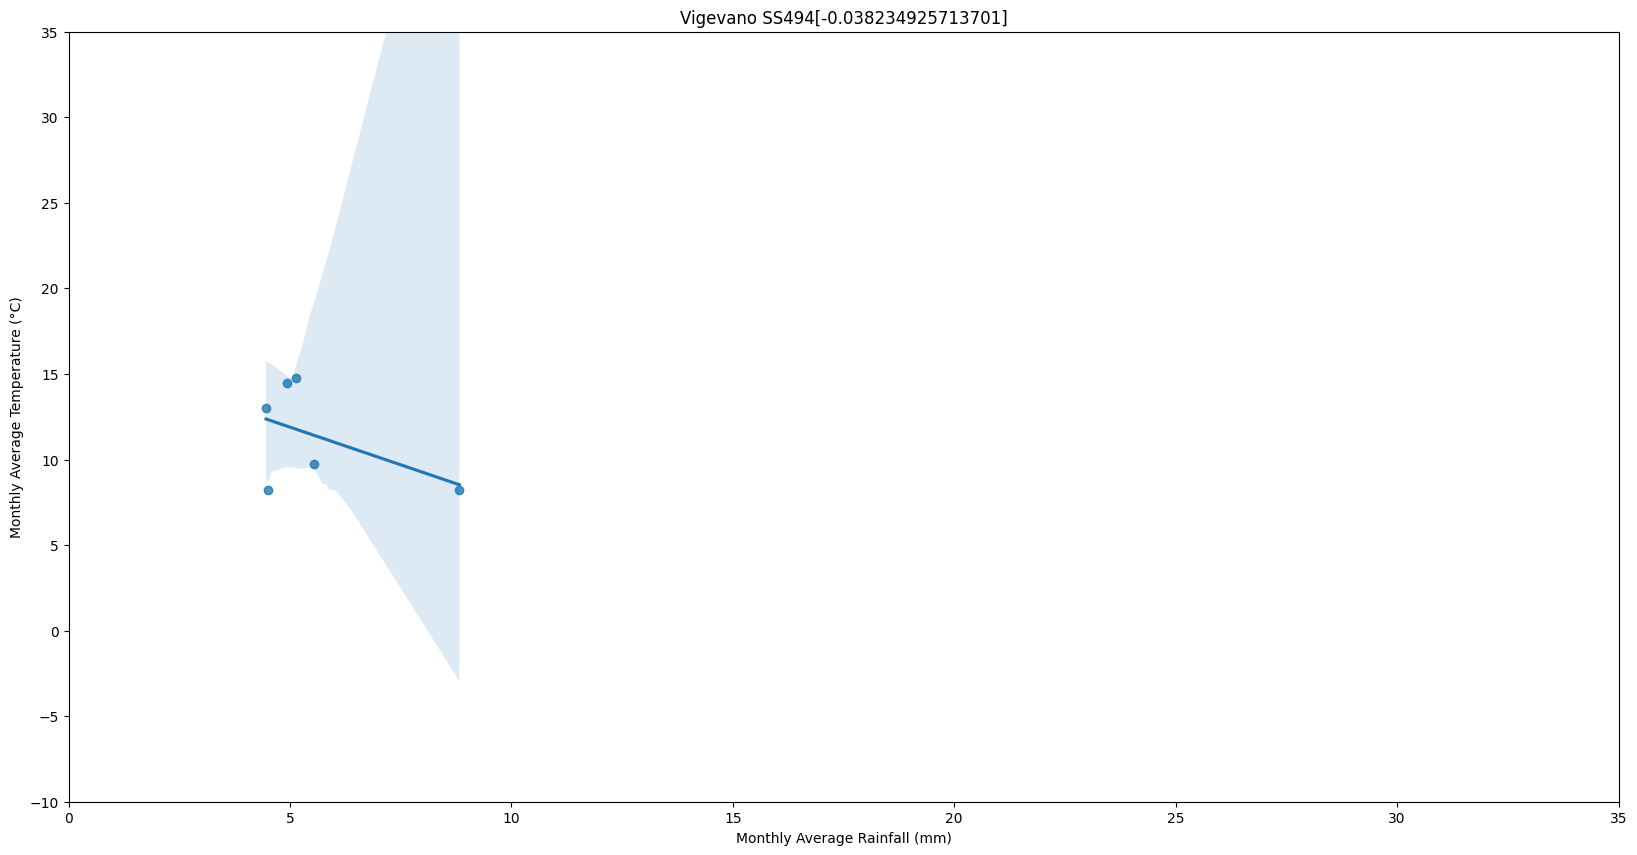

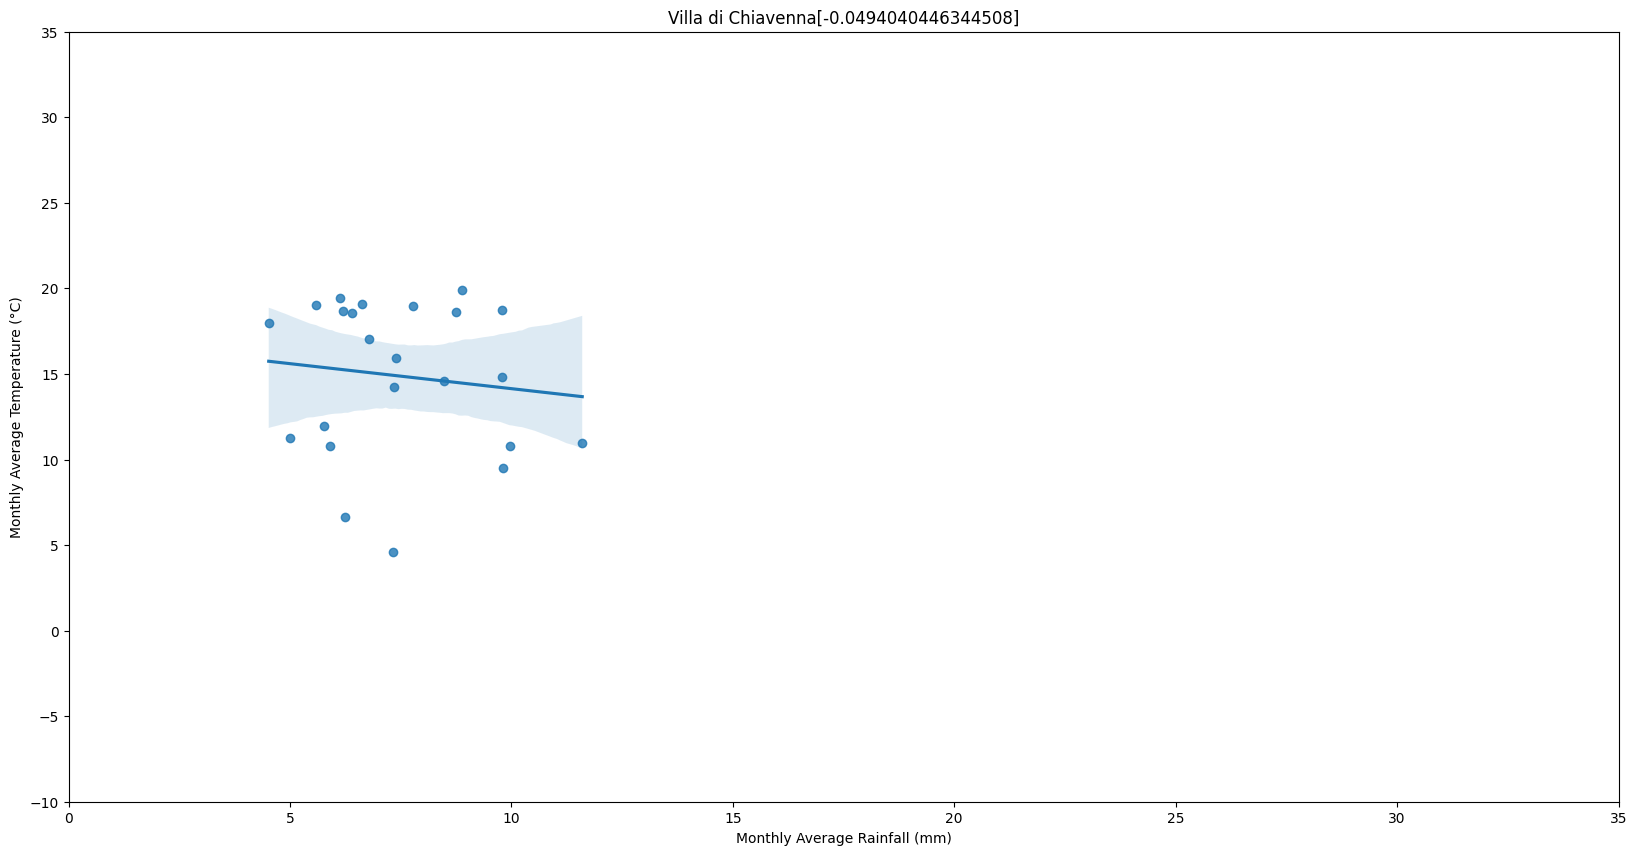

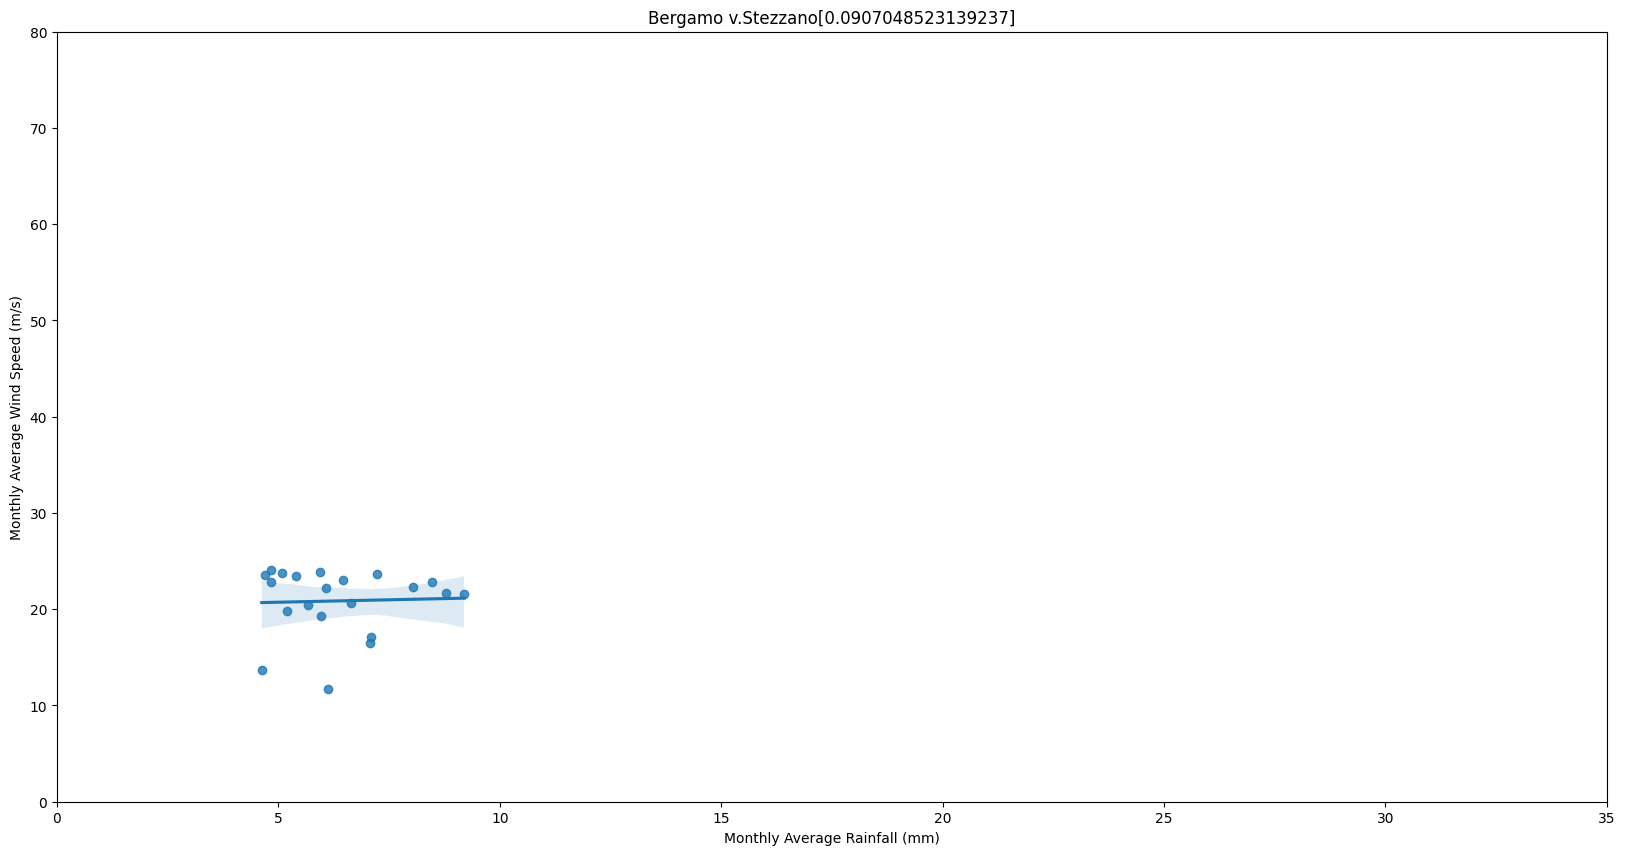

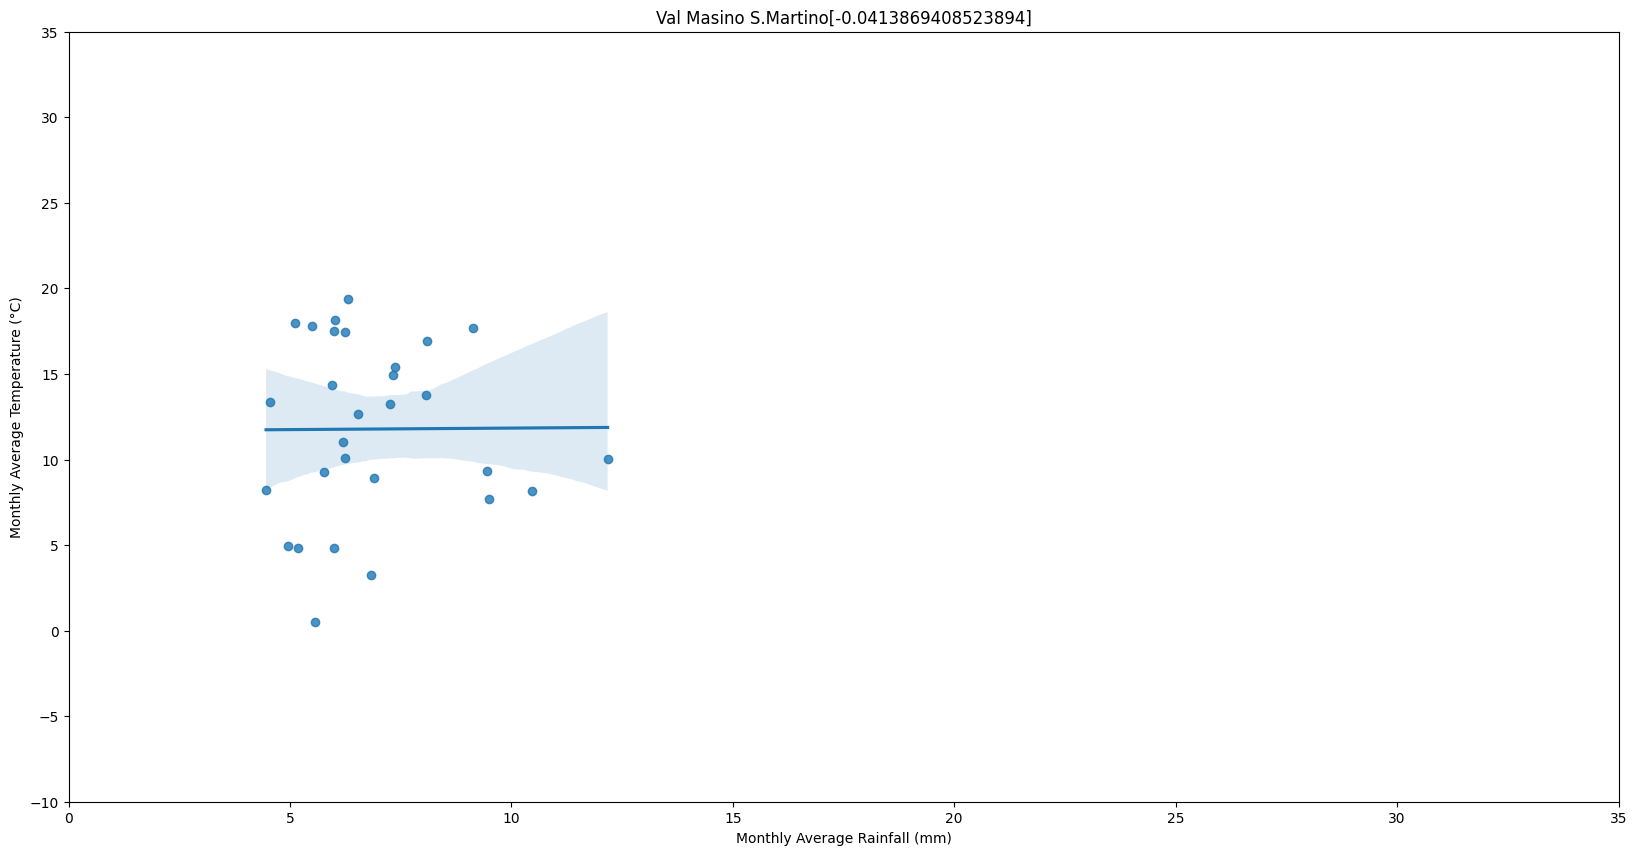

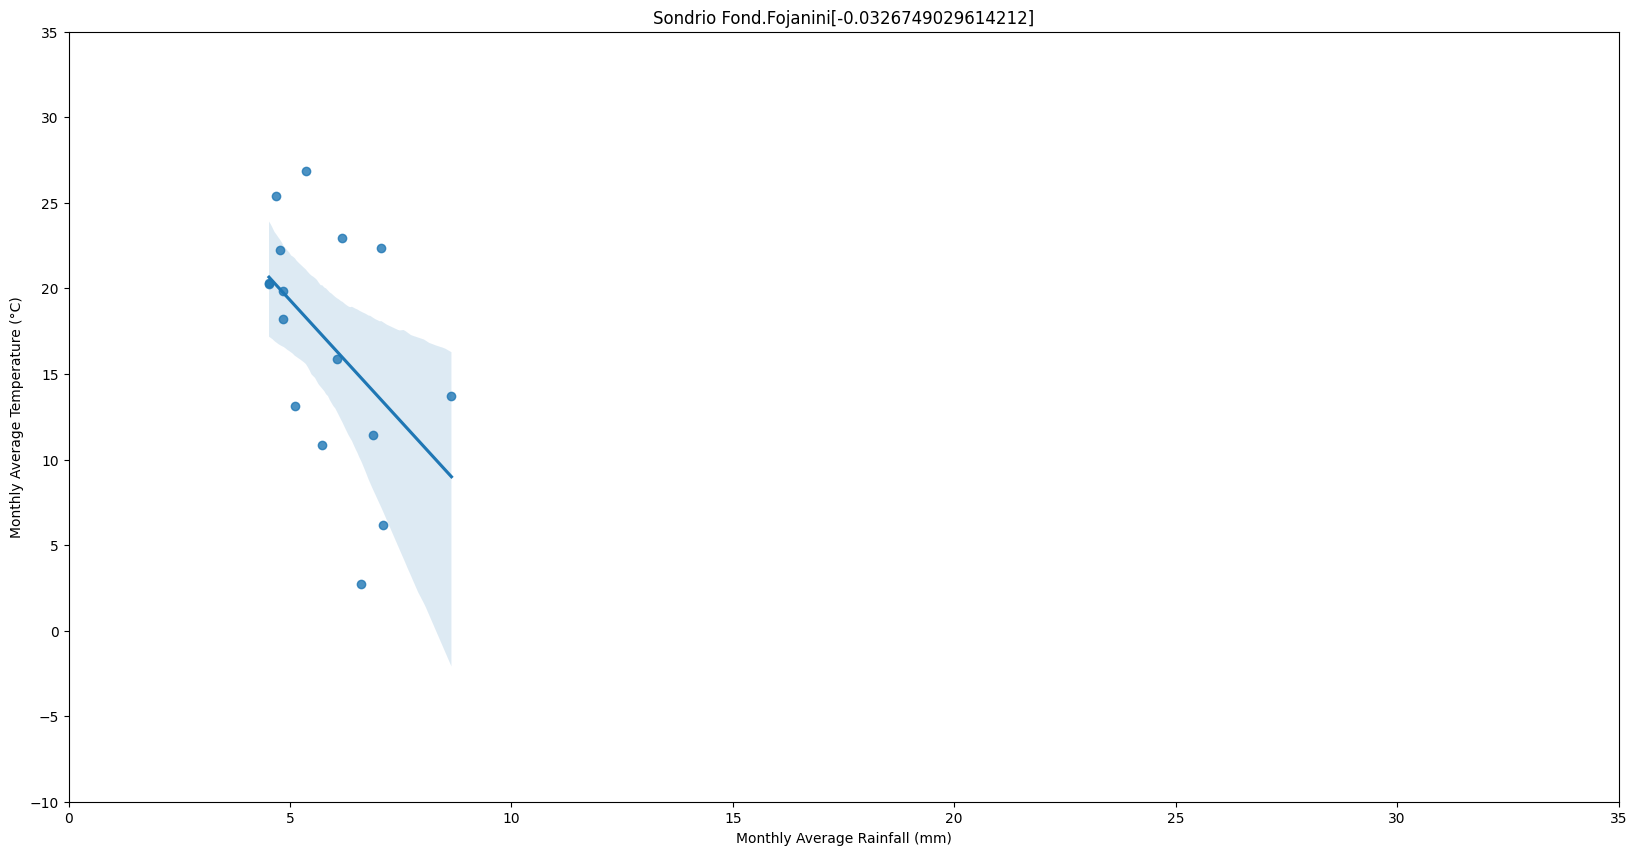

In [ ]:
for i in range(0,160):
  if coov.iloc[i,5]==1 or  coov.iloc[i,6]==1 or  coov.iloc[i,7]==1 or  coov.iloc[i,8]==1 or  coov.iloc[i,9]==1 or coov.iloc[i,10]==1:
    column = sel_monthly_df.columns[i]
    plt.figure(figsize=(20, 10))
    #sns.set(style="whitegrid")  # Set the style of the plot
    all_values_df1 = sel_monthly_df[column].values.flatten()
    sns.regplot(x= sel_monthly_df[column][all_values_df1 > 4.39], y = monthly_df_t[column][all_values_df1 > 4.39], fit_reg = True)
    plt.xlabel('Monthly Average Rainfall (mm)')
    plt.ylabel('Monthly Average Temperature (°C)')
    plt.title(column + str(coef.iloc[i,3:4].values))
    plt.xlim(0, 35)
    plt.ylim(-10, 35)
    plt.show()
  elif coov.iloc[i,11]==1 or  coov.iloc[i,12]==1 or  coov.iloc[i,13]==1 or  coov.iloc[i,14]==1:
    column = sel_monthly_df.columns[i]
    plt.figure(figsize=(20, 10))
    all_values_df1 = sel_monthly_df[column].values.flatten()
    sns.regplot(x= sel_monthly_df[column][all_values_df1 > 4.39], y = monthly_df_v[column][all_values_df1 > 4.39], fit_reg = True)
    plt.xlabel('Monthly Average Rainfall (mm)')
    plt.ylabel('Monthly Average Wind Speed (m/s)')
    plt.title(column + str(coef.iloc[i,3:4].values))
    plt.xlim(0, 35)
    plt.ylim(0, 80)
    plt.show()
  elif coov.iloc[i,15]==1 or  coov.iloc[i,16]==1:
    column = sel_monthly_df.columns[i]
    plt.figure(figsize=(20, 10))
    all_values_df1 = sel_monthly_df[column].values.flatten()
    sns.regplot(x= sel_monthly_df[column][all_values_df1 > 4.39], y = monthly_df_r[column][all_values_df1 > 4.39], fit_reg = True)
    plt.xlabel('Monthly Average Rainfall (mm)')
    plt.ylabel('Monthly Average Global Solar Radiation (W/m2)')
    plt.title(column + str(coef.iloc[i,3:4].values))
    plt.xlim(0, 35)
    plt.ylim(0, 300)
    plt.show()
  elif coov.iloc[i,16]==1 or  coov.iloc[i,17]==1 or coov.iloc[i,18]==1 or  coov.iloc[i,19]==1:
    column = sel_monthly_df.columns[i]
    plt.figure(figsize=(20, 10))
    all_values_df1 = sel_monthly_df[column].values.flatten()
    sns.regplot(x= sel_monthly_df[column][all_values_df1 > 4.39], y = monthly_df_u[column][all_values_df1 > 4.39], fit_reg = True)
    plt.xlabel('Monthly Average Rainfall (mm)')
    plt.ylabel('Monthly Average Relative Humidity (%)')
    plt.title(column + str(coef.iloc[i,3:4].values))
    plt.xlim(0, 35)
    plt.ylim(0, 100)
    plt.show()
  else:
    continue

### SPATIAL DISTRIBUTION OF THE COVARIATE

In [ ]:
import folium
import numpy as np
# Assuming you have a DataFrame named 'df' with columns 'latitude', 'longitude', and '0'

# create a map centered on a specific location
m = folium.Map(location=[loc.at[0, "latitude"], loc.at[0, "longitude"]], zoom_start=12, tiles='Stamen Terrain')

# add markers to the map
for i in range(0,160) :
  #a = np.isnan(merged.at[i,1])
 #if a == True
  if merged.at[i,1] == "aut_est" or merged.at[i,1] == "aut_inv" or merged.at[i,1] == "aut_prim" or merged.at[i,1] == "aut":
    marker_color = 'green'  # Set the marker color based on your condition
  elif merged.at[i,1] == 'temp':
     marker_color = 'blue'
  elif merged.at[i,1] == "vento":
    marker_color = 'orange'  # Set a different color if the condition is not met
  elif merged.at[i,1] == "umid":
    marker_color = 'pink'
  elif merged.at[i,1] == "rad":
    marker_color = 'red'
  else:
    continue

        # Create a custom icon for the marker with the specified color
  icon = folium.Icon(color=marker_color)

  folium.Marker(location=[loc.at[i, "latitude"], loc.at[i, "longitude"]], popup=merged.iloc[i,2:4], icon=icon ).add_to(m)
    #except:
       # print(i)

# Display the map
m

#  SPATIAL ANALYSIS OF THE MES ESTIMATES
I analyze the empirical distribution of the estimated MES and then their spatial distribution around the region of Lombardy (Italy)

## MES calculated with Hill Estimator - First approach

###Empirical Distribution

In [ ]:
from google.colab import files
up = files.upload()
import io
MES_H_1  = pd.read_csv(io.BytesIO(up['MES_Hill1_weighted.csv']))

In [ ]:
plt.hist(MES_H_1, bins=20, edgecolor='black')  #empirical distribution of MES
plt.show()

###Spatial Distribution

In [ ]:
import folium

# create map of 160 stations with different colors based on value of the MES

# create a map centered on a specific location
m = folium.Map(location=[filtered_loc.at[0, "latitude"], filtered_loc.at[0, "longitude"]], zoom_start=12, tiles='Stamen Terrain')

# add markers to the map
for i in range(0,160):
    try:
        if MES_H_1[i]<15 :
            marker_color = 'green'  # Set the marker color based on your condition
        elif MES_H_1[i]<25:
            marker_color = 'orange'  # Set a different color if the condition is not met
        else:
            marker_color = 'red'

        # Create a custom icon for the marker with the specified color
        icon = folium.Icon(color=marker_color)

        folium.Marker(
            location=[filtered_loc.at[i, "latitude"], filtered_loc.at[i, "longitude"]],
            popup= filtered_loc.at[i, "0"],
            icon=icon ).add_to(m)
    except:
        print(i)

# Display the map
m

## MES calculated with Hill Estimator - Second approach

###Empirical Distribution

In [ ]:
from google.colab import files
up = files.upload()
import io
MES_H_2  = pd.read_csv(io.BytesIO(up['MES_Hill2_weighted.csv']))

In [ ]:
plt.hist(MES_H_2, bins=20, edgecolor='black')  #empirical distribution of MES
plt.show()

###Spatial Distribution

In [ ]:
import folium

# create map of 160 stations with different colors based on value of the MES

# create a map centered on a specific location
m = folium.Map(location=[filtered_loc.at[0, "latitude"], filtered_loc.at[0, "longitude"]], zoom_start=12, tiles='Stamen Terrain')

# add markers to the map
for i in range(0,125):
    try:
        if MES_H_2[i]<15 :
            marker_color = 'green'  # Set the marker color based on your condition
        elif MES_H_2[i]<25:
            marker_color = 'orange'  # Set a different color if the condition is not met
        else:
            marker_color = 'red'

        # Create a custom icon for the marker with the specified color
        icon = folium.Icon(color=marker_color)

        folium.Marker(
            location=[filtered_loc.at[i, "latitude"], filtered_loc.at[i, "longitude"]],
            popup= filtered_loc.at[i, "0"],
            icon=icon ).add_to(m)
    except:
        print(i)

# Display the map
m

## MES calculated with coovariate introduction - First approach

###Empirical Distribution

In [ ]:
from google.colab import files
up = files.upload()
import io
MES_C_1  = pd.read_csv(io.BytesIO(up['MES_Covl_weighted.csv']))

In [ ]:
plt.hist(MES_C_1, bins=20, edgecolor='black')  #empirical distribution of MES
plt.show()

###Spatial Distribution

In [ ]:
import folium

# create map of 160 stations with different colors based on value of the MES

# create a map centered on a specific location
m = folium.Map(location=[filtered_loc_125.at[0, "latitude"], filtered_loc_125.at[0, "longitude"]], zoom_start=12, tiles='Stamen Terrain')

# add markers to the map
for i in range(0,125):
    try:
        if MES_C_1[i]<15 :
            marker_color = 'green'  # Set the marker color based on your condition
        elif MES_C_1[i]<25:
            marker_color = 'orange'  # Set a different color if the condition is not met
        else:
            marker_color = 'red'

        # Create a custom icon for the marker with the specified color
        icon = folium.Icon(color=marker_color)

        folium.Marker(
            location=[filtered_loc_125.at[i, "latitude"], filtered_loc_125.at[i, "longitude"]],
            popup= filtered_loc_125.at[i, "0"],
            icon=icon).add_to(m)
    except:
        print(i)

# Display the map
m

## MES calculated with coovariate introduction - Second approach

###Empirical Distribution

In [ ]:
from google.colab import files
up = files.upload()
import io
MES_C_2  = pd.read_csv(io.BytesIO(up['MES_Cov2_weighted.csv']))

In [ ]:
plt.hist(MES_C_2, bins=20, edgecolor='black')  #empirical distribution of MES
plt.show()

In [ ]:
import folium

# create map of 160 stations with different colors based on value of the MES

# create a map centered on a specific location
m = folium.Map(location=[filtered_loc_125.at[0, "latitude"], filtered_loc_125.at[0, "longitude"]], zoom_start=12, tiles='Stamen Terrain')

# add markers to the map
for i in range(0,125):
    try:
        if MES_C_2[i]<15 :
            marker_color = 'green'  # Set the marker color based on your condition
        elif MES_C_2[i]<25:
            marker_color = 'orange'  # Set a different color if the condition is not met
        else:
            marker_color = 'red'

        # Create a custom icon for the marker with the specified color
        icon = folium.Icon(color=marker_color)

        folium.Marker(
            location=[filtered_loc_125.at[i, "latitude"], filtered_loc_125.at[i, "longitude"]],
            popup= filtered_loc_125.at[i, "0"],
            icon=icon).add_to(m)
    except:
        print(i)

# Display the map
m

# WEIGHTS DERIVATION
For the weighted estimation of the MES I fit a model of the spatial correlation between each pair of weather stations. However, after the fitting the weights calculation requires the distance between each pair of sites. These distances are calculated here. Moreover, the empirical correlation between the stations is plotted to have a comparison for the estimated model.

## DISTANCE DERIVATION - 160 STATIONS

In [ ]:
!pip install haversine

In [ ]:
import haversine as hs
from haversine import Unit

In [ ]:
data = np.empty((160,  160))
data[:] = np.nan

dist = pd.DataFrame(data)

In [ ]:
for i in range(0,160):      #pairwise distance between the 160 distance
  for j in range(0,160):
      loc1 = (df.at[i,"latitude"],df.at[i,"longitude"])
      loc2 = (df.at[j,"latitude"],df.at[j,"longitude"])
      dist.at[j,i] = hs.haversine(loc1,loc2,unit=Unit.KILOMETERS)

In [ ]:
from google.colab import files
dist.to_csv('dist_159_R.csv', index=None, header=True)
files.download('dist_159_R.csv')

## SCALED RAINFALL DATA
The correlation model requires the data to be Gaussian distributed. Therefore, we scaled them to have mean 0 and variance 1.

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(sel_monthly_df)
scaled = pd.DataFrame(scaled, columns=list(sel_monthly_df.columns))

## CORRELATION PLOT

In [ ]:
corr_matrix = sel_monthly_df.corr()

In [ ]:
x = dist.iloc[:,1:].values.flatten()
y = corr_matrix.iloc[:,:].values.flatten()


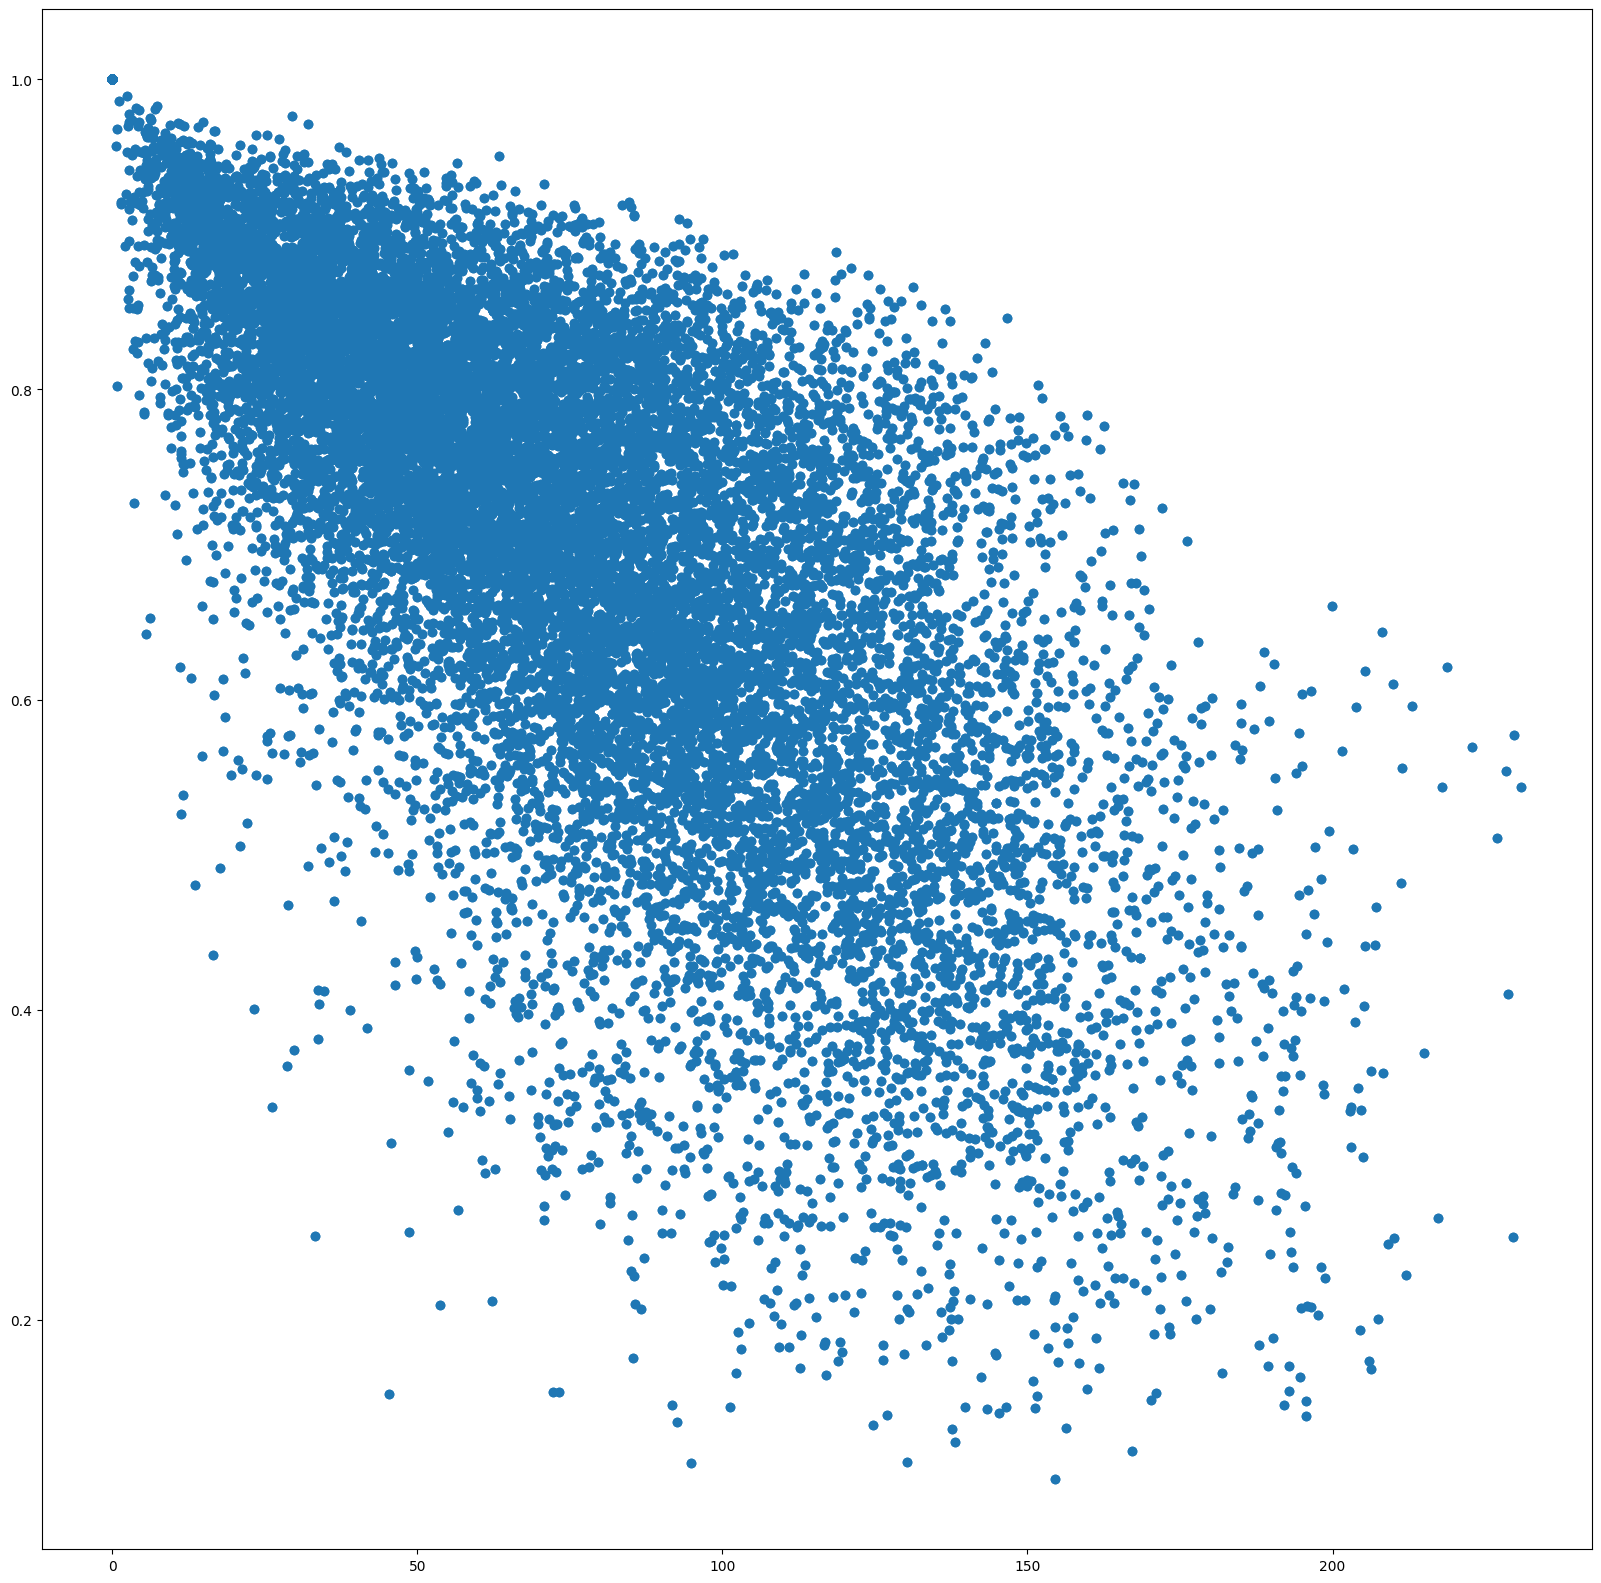

In [ ]:
fig = plt.figure(figsize=(20, 20))
plt.scatter(x, y)
plt.show()